# Connect to the Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# The save data fro the trainig set as here

In [ ]:
# ls gdrive/MyDrive/'Colab Notebooks'/Data_Bases_zinc_and_Qm9/train.txt

# OUR MOLECULAR GLUE DATA

In [2]:
file_paths_SMILES = {
    "VHL": {
        "High_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/VHL_amyloidBeta42_complex/Vitas/Highest_Binding_affinity_Compounds/CSV_SMILES/VHL_highest_BA_ADMETPass_repeat-exported_Dockinscore.xlsx",
                          "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/VHL_amyloidBeta42_complex/Chemble/Highest_Binding_affinity_Compounds/CSV_SMILES/VHL_AfterADMET_higestBA_Chemble-exported_DockingScore.xlsx"],
        "Low_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/VHL_amyloidBeta42_complex/Vitas/LOwest_Binding_affinity_Compounds/CSV_SMILES/VHL_lowest_BA_ADMETPass_repeat-exported_DockingScore.xlsx",
                         "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/VHL_amyloidBeta42_complex/Chemble/LOwest_Binding_affinity_Compounds/CSV_SMILES/VHL_AfterADMET_Lowest_BA_Chemble-exported_DockingScore.xlsx"],
        "No_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/VHL_amyloidBeta42_complex/Vitas/NO_Binding_affinity_Compounds/CSV_SMILES/VHL_No_BA_ADMETPass_repeat-exported_docking_score.xlsx"]

    },
    "CRBN": {
        "High_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Vitas/Highest_Binding_affinity_Compounds/CSV_SMILES/CRBN_highest_BA_ADMETPass_repeat-exported_docking_score.xlsx",
                          "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Chemble/Highest_Binding_affinity_Compounds/CSV_SMILES/CRBN_highest_BA_ADMETPass_NOrepeat-exported-exported_DockingScore.xlsx"],
        "Low_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Vitas/LOwest_Binding_affinity_Compounds/CSV_SMILES/CRBN_lowest_BA_ADMETPass_repeat-exported_DockingScore.xlsx",
                         "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Chemble/LOwest_Binding_affinity_Compounds/CSV_SMILES/CRBN_lowest_BA_ADMETPass_NOrepeat-exported-exported_DockingScore.xlsx"],
        "No_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Vitas/NO_Binding_affinity_Compounds/CSV_SMILES/CRBN_NO_BA_ADMETPass_repeat-exported_DockinScore.xlsx",
                        "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/CRBN_amyloidBeta42_complex/Chemble/NO_Binding_affinity_Compounds/CSV_SMILES/CRBN_NO_BA_ADMETPass_NOrepeat-exported-exported_DockingScore.xlsx"]
    },
    "MDM2": {
        "High_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Vitas/Highest_Binding_affinity_Compounds/CSV_SMILES/MDM2_highest_BA_ADMETPass_repeat-exported_dockingScore.xlsx",
                          "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Chemble/Highest_Binding_affinity_Compounds/CSV_SMILES/MDM2_Highest_BA_ADMETPass_NOrepeat-exported-exported_DockingScore.xlsx"],
        "Low_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Vitas/LOwest_Binding_affinity_Compounds/CSV_SMILES/MDM2_lowest_BA_ADMETPass_repeat-exported_docking_score.xlsx",
                         "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Chemble/LOwest_Binding_affinity_Compounds/CSV_SMILES/MDM2_Lowest_BA_ADMETPass_NOrepeat-exported-exported_DockingScore.xlsx"],
        "No_Affinity": ["gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Vitas/NO_Binding_affinity_Compounds/CSV_SMILES/MDM2_NO_BA_ADMETPass_repeat-exported_dockingScore.xlsx",
                        "gdrive/MyDrive/MAYO_2024_DATA/AmyloidBeta_2025/Data/MDM2_amyloidBeta42_complex/Chemble/NO_Binding_affinity_Compounds/CSV_SMILES/MDM2_NO_BA_ADMETPass_NOrepeat-exported-exported_Docking_Score.xlsx"]
    }
}

# ***Convert them into Pandas***

In [5]:
import pandas as pd

In [6]:
CRBN_Vitas_HA = file_paths_SMILES["CRBN"]["High_Affinity"][0]
CRBN_Chemble_HA = file_paths_SMILES["CRBN"]["High_Affinity"][1]
VHL_Vitas_HA = file_paths_SMILES["VHL"]["High_Affinity"][0]
VHL_Chemble_HA = file_paths_SMILES["VHL"]["High_Affinity"][1]
MDM2_Vitas_HA = file_paths_SMILES["MDM2"]["High_Affinity"][0]
MDM2_Chemble_HA = file_paths_SMILES["MDM2"]["High_Affinity"][1]
CRBN_Vitas_LA = file_paths_SMILES["CRBN"]["Low_Affinity"][0]
CRBN_Chemble_LA = file_paths_SMILES["CRBN"]["Low_Affinity"][1]
VHL_Vitas_LA = file_paths_SMILES["VHL"]["Low_Affinity"][0]
VHL_Chemble_LA = file_paths_SMILES["VHL"]["Low_Affinity"][1]
MDM2_Vitas_LA = file_paths_SMILES["MDM2"]["Low_Affinity"][0]
MDM2_Chemble_LA = file_paths_SMILES["MDM2"]["Low_Affinity"][1]

In [7]:
CRBN_Vitas_HA_pd = pd.read_excel(CRBN_Vitas_HA)
CRBN_Chemble_HA_pd = pd.read_excel(CRBN_Chemble_HA)
VHL_Vitas_HA_pd = pd.read_excel(VHL_Vitas_HA)
VHL_Chemble_HA_pd = pd.read_excel(VHL_Chemble_HA)
MDM2_Chemble_HA_pd = pd.read_excel(MDM2_Chemble_HA)
MDM2_Vitas_HA_pd = pd.read_excel(MDM2_Vitas_HA)
CRBN_Vitas_LA_pd = pd.read_excel(CRBN_Vitas_LA)
CRBN_Chemble_LA_pd = pd.read_excel(CRBN_Chemble_LA)
VHL_Vitas_LA_pd = pd.read_excel(VHL_Vitas_LA)
VHL_Chemble_LA_pd = pd.read_excel(VHL_Chemble_LA)
MDM2_Chemble_LA_pd = pd.read_excel(MDM2_Chemble_LA)
MDM2_Vitas_LA_pd = pd.read_excel(MDM2_Vitas_LA)

In [8]:
MDM2_Vitas_HA_pd

SMILES  \
0                  BrCCN/C=C1\C(C)=NN(C1=O)c2ccc(Cl)cc2   
1             BrC[C@@]1(C)CN=C(S1)N2CCN(CC2)c(cc3)ccc3C   
2     Brc1c(Br)cc(OC)c(O)c1/C=N/c(c(O)cc2)cc2[C@@H](...   
3     Brc1c(Br)cc(OC)c(O)c1/C=N/c(c(O)cc2)cc2[C@H](C...   
4                 Brc1c(Br)cc(OC)c(O)c1/C=N/c2ccc(F)cc2   
...                                                 ...   
6591             s1cncc1NC(=O)/C(O)=C\C(=O)c2ccc(Cl)cc2   
6592          s1cncc1NC(=O)/C([O-])=C/C(=O)c2ccc(Cl)cc2   
6593             s1cncc1NC(=O)C(=O)/C=C(O)\c2ccc(Cl)cc2   
6594               s1cncc1NC(=O)C(=O)CC(=O)c2ccc(Cl)cc2   
6595             s1cncc1NC(=O)C(=O)\C=C(O)\c2ccc(Cl)cc2   

                                           NAME  r_glide_XP_Gscore  
0      ligprep_Vitas_Compounds_15417.maegz:3629          -5.558391  
1     ligprep_Vitas_Compounds_15417.maegz:14106          -5.064216  
2      ligprep_Vitas_Compounds_15417.maegz:8154          -5.425364  
3      ligprep_Vitas_Compounds_15417.maegz:8154          -5.565944  
4      ligprep_Vitas_Compounds_15417.maegz:8156          -5.743889  
...                                         ...                ...  
6591   ligprep_Vitas_Compounds_15417.maegz:9885          -5.105478  
6592   ligprep_Vitas_Compounds_15417.maegz:9885          -5.715549  
6593   ligprep_Vitas_Compounds_15417.maegz:9885          -5.589096  
6594   ligprep_Vitas_Compounds_15417.maegz:9885          -5.300245  
6595   ligprep_Vitas_Compounds_15417.maegz:9885          -5.447103  

[6596 rows x 3 columns]

In [9]:
MDM2_Vitas_LA_pd = MDM2_Vitas_LA_pd.rename(columns={"m": "SMILES"})

In [10]:
# List of all dataframes with their corresponding labels
df_list_CRBN = [
    (CRBN_Vitas_HA_pd, "CRBN"),
    (CRBN_Chemble_HA_pd, "CRBN"),
    (CRBN_Vitas_LA_pd, "CRBN"),
    (CRBN_Chemble_LA_pd, "CRBN"),
#     (MDM2_Chemble_HA_pd, "MDM2"),
#     (MDM2_Vitas_HA_pd, "MDM2")
]

# Initialize an empty list to store rows
data_rows_CRBN = []

# Iterate over each dataframe and extract the SMILES along with labels
for df, label in df_list_CRBN:
    for smiles in df["SMILES"]:  # Assuming the SMILES column exists in each dataframe
        data_rows_CRBN.append([smiles, "affinity", label])

# Create the final dataframe
final_df_CRBN = pd.DataFrame(data_rows_CRBN, columns=["SMILES", "Label", "Target"])

In [11]:
# List of all dataframes with their corresponding labels
df_list_VHL = [
    (VHL_Vitas_HA_pd, "VHL"),
    (VHL_Chemble_HA_pd, "VHL"),
    (VHL_Vitas_LA_pd, "VHL"),
    (VHL_Chemble_LA_pd, "VHL"),
#     (MDM2_Chemble_HA_pd, "MDM2"),
#     (MDM2_Vitas_HA_pd, "MDM2")
]

# Initialize an empty list to store rows
data_rows_VHL = []

# Iterate over each dataframe and extract the SMILES along with labels
for df, label in df_list_VHL:
    for smiles in df["SMILES"]:  # Assuming the SMILES column exists in each dataframe
        data_rows_VHL.append([smiles, "affinity", label])

# Create the final dataframe
final_df_VHL = pd.DataFrame(data_rows_VHL, columns=["SMILES", "Label", "Target"])

In [12]:
# List of all dataframes with their corresponding labels
df_list_MDM2 = [
    (MDM2_Vitas_HA_pd, "MDM2"),
    (MDM2_Chemble_HA_pd, "MDM2"),
    (MDM2_Vitas_LA_pd, "MDM2"),
    (MDM2_Chemble_LA_pd, "MDM2"),
#     (MDM2_Chemble_HA_pd, "MDM2"),
#     (MDM2_Vitas_HA_pd, "MDM2")
]

# Initialize an empty list to store rows
data_rows_MDM2 = []

# Iterate over each dataframe and extract the SMILES along with labels
for df, label in df_list_MDM2:
    for smiles in df["SMILES"]:  # Assuming the SMILES column exists in each dataframe
        data_rows_MDM2.append([smiles, "affinity", label])

# Create the final dataframe
final_df_MDM2 = pd.DataFrame(data_rows_MDM2, columns=["SMILES", "Label", "Target"])

In [13]:
MDM2_Vitas_HA_pd

SMILES  \
0                  BrCCN/C=C1\C(C)=NN(C1=O)c2ccc(Cl)cc2   
1             BrC[C@@]1(C)CN=C(S1)N2CCN(CC2)c(cc3)ccc3C   
2     Brc1c(Br)cc(OC)c(O)c1/C=N/c(c(O)cc2)cc2[C@@H](...   
3     Brc1c(Br)cc(OC)c(O)c1/C=N/c(c(O)cc2)cc2[C@H](C...   
4                 Brc1c(Br)cc(OC)c(O)c1/C=N/c2ccc(F)cc2   
...                                                 ...   
6591             s1cncc1NC(=O)/C(O)=C\C(=O)c2ccc(Cl)cc2   
6592          s1cncc1NC(=O)/C([O-])=C/C(=O)c2ccc(Cl)cc2   
6593             s1cncc1NC(=O)C(=O)/C=C(O)\c2ccc(Cl)cc2   
6594               s1cncc1NC(=O)C(=O)CC(=O)c2ccc(Cl)cc2   
6595             s1cncc1NC(=O)C(=O)\C=C(O)\c2ccc(Cl)cc2   

                                           NAME  r_glide_XP_Gscore  
0      ligprep_Vitas_Compounds_15417.maegz:3629          -5.558391  
1     ligprep_Vitas_Compounds_15417.maegz:14106          -5.064216  
2      ligprep_Vitas_Compounds_15417.maegz:8154          -5.425364  
3      ligprep_Vitas_Compounds_15417.maegz:8154          -5.565944  
4      ligprep_Vitas_Compounds_15417.maegz:8156          -5.743889  
...                                         ...                ...  
6591   ligprep_Vitas_Compounds_15417.maegz:9885          -5.105478  
6592   ligprep_Vitas_Compounds_15417.maegz:9885          -5.715549  
6593   ligprep_Vitas_Compounds_15417.maegz:9885          -5.589096  
6594   ligprep_Vitas_Compounds_15417.maegz:9885          -5.300245  
6595   ligprep_Vitas_Compounds_15417.maegz:9885          -5.447103  

[6596 rows x 3 columns]

# Remove Stochiomnetry

In [14]:
def remove_stereochemistry(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        Chem.RemoveStereochemistry(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    return None

# Apply the function to remove stereochemistry
MDM2_Vitas_HA_pd["SMILES"] = MDM2_Vitas_HA_pd["SMILES"].apply(remove_stereochemistry)

# Drop duplicate structures based on 2D structures
df_unique_2D_HA_MDM2 = MDM2_Vitas_HA_pd.drop_duplicates(subset=["SMILES"])

[18:42:59] Conflicting single bond directions around double bond at index 11.
[18:42:59]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [17]:
df_unique_2D_HA_MDM2

SMILES  \
0                    CC1=NN(c2ccc(Cl)cc2)C(=O)C1=CNCCBr   
1                 Cc1ccc(N2CCN(C3=NCC(C)(CBr)S3)CC2)cc1   
2          CCCC(C)c1ccc(O)c(N=Cc2c(O)c(OC)cc(Br)c2Br)c1   
4                   COc1cc(Br)c(Br)c(C=Nc2ccc(F)cc2)c1O   
5     CCCC(C)c1ccc(O)c([NH+]=Cc2c([O-])c(OC)cc(Br)c2...   
...                                                 ...   
6589                                Oc1ccccc1C=Nc1nccs1   
6590               O=C(Nc1cncs1)C(O)=CC(=O)c1ccc(Cl)cc1   
6592            O=C(Nc1cncs1)C([O-])=CC(=O)c1ccc(Cl)cc1   
6593               O=C(C=C(O)c1ccc(Cl)cc1)C(=O)Nc1cncs1   
6594               O=C(CC(=O)c1ccc(Cl)cc1)C(=O)Nc1cncs1   

                                           NAME  r_glide_XP_Gscore  
0      ligprep_Vitas_Compounds_15417.maegz:3629          -5.558391  
1     ligprep_Vitas_Compounds_15417.maegz:14106          -5.064216  
2      ligprep_Vitas_Compounds_15417.maegz:8154          -5.425364  
4      ligprep_Vitas_Compounds_15417.maegz:8156          -5.743889  
5      ligprep_Vitas_Compounds_15417.maegz:8154          -9.019562  
...                                         ...                ...  
6589   ligprep_Vitas_Compounds_15417.maegz:9963          -5.428983  
6590   ligprep_Vitas_Compounds_15417.maegz:9885          -6.455077  
6592   ligprep_Vitas_Compounds_15417.maegz:9885          -5.715549  
6593   ligprep_Vitas_Compounds_15417.maegz:9885          -5.589096  
6594   ligprep_Vitas_Compounds_15417.maegz:9885          -5.300245  

[5124 rows x 3 columns]

# Remove Molecules with high-valence atom

In [ ]:
import tqdm

In [ ]:
valid_smiles = []

for smiles in tqdm.tqdm(df_unique_2D_HA_VHL['SMILES']):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        continue  # Skip invalid SMILES
    for atom in mol.GetAtoms():
        if atom.GetDegree() > 6:
            print(f"Rejecting high-valence molecule {smiles}")
            break
    else:
        valid_smiles.append(smiles)

# Save valid SMILES to a new DataFrame
df_valid_VHL_high = pd.DataFrame({'smiles': valid_smiles})

100%|██████████| 1928/1928 [00:00<00:00, 3381.47it/s]


In [ ]:
df_valid_VHL_high

smiles
0                 Oc1nn2c(C(F)(F)F)cc(-c3ccccc3)nc2c1Br
1     Cc1cc(Br)c(NCC(=O)NN=Cc2ccc([N+](=O)[O-])cc2)c...
2         Cc1cc(Br)c(OCC(=O)NN=Cc2ccc(O)c(O)c2O)c(Br)c1
3                      CCc1ccc(OCC(=O)Nc2ccc(Br)cn2)cc1
4               Cc1[nH]c2cc(N=Cc3c(O)cccc3Br)ccc2[nH+]1
...                                                 ...
1923                     O=C(Nc1nccs1)c1ccccc1-c1ccccc1
1924    O=C(Nc1nccs1)c1ccc(Oc2cccc(C(=O)Nc3nccs3)c2)cc1
1925       O=C(C[NH+]1CC[NH+](Cc2ccccc2)CC1)[N-]c1nccs1
1926               O=C(C=C(O)c1ccc(Cl)cc1)C(=O)Nc1cncs1
1927               O=C(CC(=O)c1ccc(Cl)cc1)C(=O)Nc1cncs1

[1928 rows x 1 columns]

# ***Convert the Smile from PandaDataFrame To List***

In [19]:
cleaned_smiles_list_VHL_high = df_unique_2D_HA_MDM2['SMILES'].tolist()

In [ ]:
cleaned_smiles_list_CRBN = final_df_CRBN['SMILES'].tolist()

In [ ]:
cleaned_smiles_list_VHL = final_df_VHL['SMILES'].tolist()

In [ ]:
cleaned_smiles_list_MDM2 = final_df_MDM2['SMILES'].tolist()

In [ ]:
cleaned_smiles_list_VHL_high

['Oc1nn2c(C(F)(F)F)cc(-c3ccccc3)nc2c1Br',
 'Cc1cc(Br)c(NCC(=O)NN=Cc2ccc([N+](=O)[O-])cc2)c(Br)c1',
 'Cc1cc(Br)c(OCC(=O)NN=Cc2ccc(O)c(O)c2O)c(Br)c1',
 'CCc1ccc(OCC(=O)Nc2ccc(Br)cn2)cc1',
 'Cc1[nH]c2cc(N=Cc3c(O)cccc3Br)ccc2[nH+]1',
 'CCOC(=O)c1ccc(N2C(=O)CC(NNC(=O)C3CC3)C2=O)cc1',
 'O=C(NCC(O)c1ccccc1)C(=O)NC1CC1',
 'Oc1ccccc1C1NOC2(O)C3CCN(CC3)C12',
 'COc1cc(OC)c(C=NNC(=O)C2CC23CCC3)cc1Br',
 'O=C(NC(Cc1ccccc1)C(=O)NN=C1CCCC1)c1ccccc1',
 'O=C(NCc1ccncc1)C(=O)NC1CCCC1',
 'COc1cccc(-n2c(=O)[nH]c([O-])c(C[NH2+]C=CC3=CCCCC3)c2=O)c1',
 'N#CC1=C2SC3CCCCC3(OCC(=O)c3ccccc3)N2C(=O)C(C#N)C12CCCCC2',
 'COc1cc(NC(=O)C2CCCCC2)c2ncccc2c1',
 'O=C(CCC1CCCCC1)Nc1ccc(Cc2cc[nH+]cc2)cc1',
 'OC(COC1CCCCC1)CN1CC[NH+](CC(O)COC2CCCCC2)CC1',
 'OC(COC1CCCCC1)C[NH+]1CC[NH+](CC(O)COC2CCCCC2)CC1',
 'Cc1cccc(N=C2C(=O)N(C[NH+](C)C3CCCCC3)c3ccccc32)c1',
 'C[NH+](Cc1cc(Br)c(O)c2ncccc12)C1CCCCC1',
 'COc1ccc(OCCSc2[nH+]c3ccccc3n2CC(=O)N2CCCCC2)cc1',
 'CC(=O)C1(N2CCCCC2)CCN(C2CC(=O)N(Cc3ccc(Cl)cc3)C2=O)CC1',
 'NC(=O)C1(N2C

In [ ]:
# len(cleaned_smiles_list_CRBN[5:55])

50

In [ ]:
cleaned_smiles_list_CRBN_after5_55 = cleaned_smiles_list_CRBN[5:1000]

In [20]:
data = cleaned_smiles_list_VHL_high

In [23]:
len(data)

5124

In [ ]:
data

['Oc1nn2c(C(F)(F)F)cc(-c3ccccc3)nc2c1Br',
 'Cc1cc(Br)c(NCC(=O)NN=Cc2ccc([N+](=O)[O-])cc2)c(Br)c1',
 'Cc1cc(Br)c(OCC(=O)NN=Cc2ccc(O)c(O)c2O)c(Br)c1',
 'CCc1ccc(OCC(=O)Nc2ccc(Br)cn2)cc1',
 'Cc1[nH]c2cc(N=Cc3c(O)cccc3Br)ccc2[nH+]1',
 'CCOC(=O)c1ccc(N2C(=O)CC(NNC(=O)C3CC3)C2=O)cc1',
 'O=C(NCC(O)c1ccccc1)C(=O)NC1CC1',
 'Oc1ccccc1C1NOC2(O)C3CCN(CC3)C12',
 'COc1cc(OC)c(C=NNC(=O)C2CC23CCC3)cc1Br',
 'O=C(NC(Cc1ccccc1)C(=O)NN=C1CCCC1)c1ccccc1',
 'O=C(NCc1ccncc1)C(=O)NC1CCCC1',
 'COc1cccc(-n2c(=O)[nH]c([O-])c(C[NH2+]C=CC3=CCCCC3)c2=O)c1',
 'N#CC1=C2SC3CCCCC3(OCC(=O)c3ccccc3)N2C(=O)C(C#N)C12CCCCC2',
 'COc1cc(NC(=O)C2CCCCC2)c2ncccc2c1',
 'O=C(CCC1CCCCC1)Nc1ccc(Cc2cc[nH+]cc2)cc1',
 'OC(COC1CCCCC1)CN1CC[NH+](CC(O)COC2CCCCC2)CC1',
 'OC(COC1CCCCC1)C[NH+]1CC[NH+](CC(O)COC2CCCCC2)CC1',
 'Cc1cccc(N=C2C(=O)N(C[NH+](C)C3CCCCC3)c3ccccc32)c1',
 'C[NH+](Cc1cc(Br)c(O)c2ncccc12)C1CCCCC1',
 'COc1ccc(OCCSc2[nH+]c3ccccc3n2CC(=O)N2CCCCC2)cc1',
 'CC(=O)C1(N2CCCCC2)CCN(C2CC(=O)N(Cc3ccc(Cl)cc3)C2=O)CC1',
 'NC(=O)C1(N2C

In [ ]:
data_VHL_unique  = list(set(data))

In [ ]:
len(data_VHL_unique)

1928

In [ ]:
data_VHL_unique

['c1cc(O)ccc1[C@@H](N2)C(C(=O)CC(C)(C)C3)=C3c(c2c45)ccc4nccc5',
 'CCCOc(cc1)c(OC)cc1C[NH+]2CCCCC2',
 'CCc1ccc(cc1)S(=O)(=O)Nc2ccncc2',
 'c1ccccc1CN[C@@H](C2)C[C@@H]([C@@H]([N+]([O-])=O)C2(C)C)c3ccccc3',
 'c1ccc(OC)cc1/C=C2\\C(=O)N(C(=O)S2)CNc3cc(Cl)ccc3',
 'C[C@H](O)[C@@H](C(=O)O1)[C@@H]([C@@]12C)C[C@H](N(C)C2)c3ccccc3',
 'c1ccccc1C(=NCCN2)C(=C23)[C@@H](c4c(Cl)cccc4)N(C3=O)c5ccccc5',
 'c1ccccc1N(C)/C([O-])=C/C(=C)[N-]NC(=O)COc2ccc(cc2)OC',
 'COc(cc1)ccc1NN(C2=O)C(=O)c(c23)cccc3',
 'c1cccc(CO)c1C(=O)N\\N=C2\\CCCCCN2',
 'c1ccccc1C(\\C)=N\\NC(=O)COc(cc2)ccc2C(C)C',
 'C[C@@H](O)[C@@H](C(=O)O1)[C@H]([C@]12C)C[C@H](N(C)C2)c3ccccc3',
 'c1cc(Cl)ccc1/C([O-])=C2\\C(=O)C(=O)N(c3ccc(cc3)OC)[C@@H]2c4cc(OC)c(O)cc4',
 'C1CN(C)CCCN1C(=O)/C(=C\\c2cccs2)NC(=O)c3cc(C)c(C)cc3',
 'CCOc1c(O)ccc(c1)[C@@H](C2=C3CCCC2=O)Nc4ccc(c5c34)nccc5',
 'c1cc(Cl)ccc1\\N=c(\\n2CCO)scc2-c3ccc(F)cc3',
 'c1ccccc1C(=O)N2CCN(CC2)c(cc3)c([N+]([O-])=O)cc3C=C4C(=O)N(C)C(=O)N(C)C4=O',
 'CCOC(=O)c(c1)ccc2n(c(c3c12)C(=O)CCC3)CC[NH+](

# Get the Train data JTVAE use for their code (Zinc Data)

In [18]:
with open('gdrive/MyDrive/Colab Notebooks/Data_Bases_zinc_and_Qm9/train.txt') as f:
    data_zinc = [line.strip("\r\n ").split()[0] for line in f]

In [ ]:
data_zinc

['CCC(NC(=O)c1scnc1C1CC1)C(=O)N1CCOCC1',
 'O=C1OCCC1Sc1nnc(-c2c[nH]c3ccccc23)n1C1CC1',
 'CCN(C)S(=O)(=O)N1CCC(Nc2cccc(OC)c2)CC1',
 'CC(=O)Nc1cccc(NC(C)c2ccccn2)c1',
 'Cc1cc(-c2nc3sc(C4CC4)nn3c2C#N)ccc1Cl',
 'CCOCCCNC(=O)c1cc(OC)ccc1Br',
 'Cc1nc(-c2ccncc2)[nH]c(=O)c1CC(=O)NC1CCCC1',
 'C#CCN(CC#C)C(=O)c1cc2ccccc2cc1OC(F)F',
 'CCOc1ccc(CN2c3ccccc3NCC2C)cc1N',
 'NC(=O)C1CCC(CNc2cc(-c3ccccc3)nc3ccnn23)CC1',
 'Cc1csc(Sc2cc(C)nc3ncnn23)n1',
 'COCCN1CCN(C(=O)CCc2nc(C(C)(C)C)no2)CC1=O',
 'CCN(CC(C)C#N)C(=O)CN1CCN(C(=O)CC(F)(F)F)CC1',
 'Cc1ccc(C(=O)Nc2ccc(S(N)(=O)=O)cc2F)cc1C',
 'O=C(c1cccs1)N1CCc2[nH]nc(-c3cccc(F)c3)c2C1',
 'O=C(C1CC1)N1CCc2ccc(NS(=O)(=O)c3ccccc3)cc21',
 'O=C(CCNC(=O)c1ccccc1)Nc1cc(Cl)cc(Cl)c1',
 'CCN1CC(c2nc3ccccc3n2CC(=O)OC(C)C)CC1=O',
 'CCC(NC(=O)COc1ccccc1O)c1ccc(OC)cc1',
 'C=CCn1c(SCCc2c(C)noc2C)n[nH]c1=O',
 'CNC(=O)c1cc(NC(=O)N2C[C@H]3CCC[NH+]3C[C@H]2C)ccc1F',
 'CCCc1ccc([C@@H]([NH3+])C(OC)OC)cc1',
 '[NH3+]C[C@H](c1cc(Cl)cs1)N1CC[C@@H]2CCCC[C@@H]2C1',
 'CC(C)CN(CC(C)C)C(=

In [24]:
len(data_zinc)

50

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 65.6 MB/s eta 0:00:00


# Get the similar data from Molecular glue based on the Zinc databases

In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem import Draw
from PIL import Image,  ImageDraw, ImageFont
import pandas as pd

In [35]:
# Convert SMILES to RDKit molecules
data_mols = [Chem.MolFromSmiles(smi) for smi in data]
data_zinc_mols = [Chem.MolFromSmiles(smi) for smi in data_zinc]

# Generate Morgan fingerprints
data_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data_mols if mol]
data_zinc_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data_zinc_mols if mol]

# Compute Tanimoto similarity and store results
similarity_results = []
threshold = 0.35 # Similarity threshold

for i, fp1 in enumerate(data_fps):
    for j, fp2 in enumerate(data_zinc_fps):
        sim = DataStructs.TanimotoSimilarity(fp1, fp2)
        if sim > threshold:  # Store only if similarity is above threshold
            similarity_results.append({
                "SMILES (data)": data[i],
                "SMILES (data_zinc)": data_zinc[j],
                "Tanimoto Similarity": round(sim, 3)
            })

# Convert to DataFrame and display
df_similarity = pd.DataFrame(similarity_results)


Streaming output truncated to the last 5000 lines.
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:47:12] DEPRECATION WARNING: please use MorganGenerator
[18:4

In [36]:
df_similarity

SMILES (data)  \
0     O=S(=O)(Nc1ccc(O)c(C[NH+]2CCCCC2)c1)c1ccccc1   
1         CC(=O)Nc1ccc(C(=O)Nc2ccccc2)c(NC(C)=O)c1   
2      CCCCN(CC)c1ccc([N+](=O)[O-])cc1C=NNc1ccccc1   
3                        CCCc1nc2ccccc2n1CC(=O)OCC   
4         CCOC(=O)C(CC(C)C)NC(=O)c1ccc(OCC(C)C)cc1   
..                                             ...   
92   O=C(NCCN1CC[NH+](Cc2ccccc2)CC1)C(=O)NCc1ccco1   
93   O=C(NCC[NH+]1CCN(Cc2ccccc2)CC1)C(=O)NCc1ccco1   
94              O=C(NCC[NH+]1CCOCC1)C(=O)NCc1ccco1   
95              Cc1ccc(NC(=O)C(=O)NCc2ccco2)c(C)c1   
96  COc1cc(C(=O)Nc2ccc(C(=O)c3cccs3)cc2)cc(OC)c1OC   

                                   SMILES (data_zinc)  Tanimoto Similarity  
0         O=C(C1CC1)N1CCc2ccc(NS(=O)(=O)c3ccccc3)cc21                0.371  
1                      CC(=O)Nc1cccc(NC(C)c2ccccn2)c1                0.380  
2          COc1cc([N+](=O)[O-])cc(/C=N/Nc2ccccc2C)c1O                0.357  
3              CCN1CC(c2nc3ccccc3n2CC(=O)OC(C)C)CC1=O                0.391  
4                     CCOc1ccc(C(=O)Nc2ccc(F)cc2F)cc1                0.357  
..                                                ...                  ...  
92          CC(C)[C@H](NC(=O)Nc1ccccc1)C(=O)NCc1ccco1                0.359  
93          CC(C)[C@H](NC(=O)Nc1ccccc1)C(=O)NCc1ccco1                0.354  
94          CC(C)[C@H](NC(=O)Nc1ccccc1)C(=O)NCc1ccco1                0.356  
95          CC(C)[C@H](NC(=O)Nc1ccccc1)C(=O)NCc1ccco1                0.404  
96  COc1cc(C(=O)N[C@H]2C[C@H]2c2cccc(Cl)c2)cc(OC)c1OC                0.365  

[97 rows x 3 columns]

In [37]:
data_VHL = df_similarity['SMILES (data)'].tolist()

In [38]:
len(data_VHL)

97

In [39]:
data_VHL

['O=S(=O)(Nc1ccc(O)c(C[NH+]2CCCCC2)c1)c1ccccc1',
 'CC(=O)Nc1ccc(C(=O)Nc2ccccc2)c(NC(C)=O)c1',
 'CCCCN(CC)c1ccc([N+](=O)[O-])cc1C=NNc1ccccc1',
 'CCCc1nc2ccccc2n1CC(=O)OCC',
 'CCOC(=O)C(CC(C)C)NC(=O)c1ccc(OCC(C)C)cc1',
 'COC(=O)CCCC(=O)Nc1ccc(C(=O)NCc2ccccc2)cc1',
 'CCOc1ccc(C(C)([NH3+])CC(=O)OC)cc1',
 'COc1cc(C=NNc2nc3nonc3nc2Nc2ccccc2F)c([N+](=O)[O-])cc1O',
 'COc1cc(C(=O)NC2CC2c2ccccc2)c(Br)c(OC)c1OC',
 'COc1cc(C=NNc2nc3nonc3nc2Nc2ccccc2F)c([N+](=O)[O-])cc1[O-]',
 'COc1ccc(Nc2nc(NN=Cc3cc(OC)ccc3OC)nc(C)c2[N+](=O)[O-])cc1',
 'CC[NH+](CC)c1ccc(NC(=O)c2ccc(OC)cc2)cc1C',
 'COc1ccc(C(=O)Nc2cc(Cl)ccc2OCc2cccc(OC)c2)cc1',
 'CCC[NH+](CCC)CCCNC(=O)C(=O)Nc1ccc(OC)cc1',
 'COc1ccc(OCC(=O)NCCOc2ccccc2)cc1',
 'COc1cc2c(OC)cccc2cc1C(=O)N1CCN(c2ccccc2)CC1',
 'CS(=O)(=O)N1CCc2cc(NS(=O)(=O)c3ccc(F)cc3)ccc21',
 'COc1cc(C(=O)NCC[NH+](C)C)cc(OC)c1OC',
 'Cc1ccc(O)c(-c2cc(-c3ccccc3Cl)no2)c1',
 'Cc1cc(=O)n2nc(CCS(=O)(=O)c3ccc4ccccc4c3)sc2n1',
 'Cc1cccc(NC(=O)C(=O)NCCc2ccccc2Cl)c1',
 'COc1cc(C=Nc2cccc(C)c2)cc(

In [40]:
output_path_csv_VHL_data = 'gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Data_Used_in_JTAVE_To_Train_to_generate_Compounds/MDM2/MDM2_HA_similar_data.csv'

In [41]:
df_smiles_VHL_for_train = pd.DataFrame({
    "Molecule_ID": [f"SMILES_{i+1}" for i in range(len(data_VHL))],
    "SMILES": data_VHL
})

# 4. Save as CSV to Google Drive

df_smiles_VHL_for_train.to_csv(output_path_csv_VHL_data, index=False)


# SIMILAR COMPOUNDS ONLY to ZINC

In [ ]:
len(data)

1928

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import pandas as pd

# Convert SMILES to Mol objects
data_mols = [Chem.MolFromSmiles(smi) for smi in data]
data_zinc_mols = [Chem.MolFromSmiles(smi) for smi in data_zinc]

# Generate Morgan fingerprints
data_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) if mol else None for mol in data_mols]
data_zinc_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) if mol else None for mol in data_zinc_mols]

# Initialize list to store SMILES from `data` that are similar to any in `data_zinc`
similar_data_smiles = set()
threshold = 0.25

for i, fp1 in enumerate(data_fps):
    if fp1 is None:
        continue
    for fp2 in data_zinc_fps:
        if fp2 is None:
            continue
        sim = DataStructs.TanimotoSimilarity(fp1, fp2)
        if sim > threshold:
            similar_data_smiles.add(data[i])  # Store only the data SMILES (not zinc ones)
            break  # No need to keep checking once a similar one is found

# Create a DataFrame of similar SMILES from `data`
df_similar_data = pd.DataFrame({'SMILES': list(similar_data_smiles)})

# Optionally save to file
# df_similar_data.to_csv("filtered_similar_data.csv", index=False)

# print(df_similar_data.head())


[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerator
[06:29:25] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
df_similar_data

SMILES
0      O=C(C=C(O)c1ccc(Cl)cc1)C(=O)Nc1cccc(C(F)(F)F)c1
1           COc1ccc(NC(=O)c2cccc(OCc3cccc(Cl)c3)c2)cc1
2             Cc1sc2nc(-c3ccc(N(C)C)cc3)[nH]c(=O)c2c1C
3    COc1ccc(NC(=O)CSc2nc3ccc([N+](=O)[O-])cc3[nH]2...
4                CC(CCc1ccco1)=NNC(=O)CNc1cccc2ccccc12
..                                                 ...
480           COc1ccc(C=Nc2ccc(NC(C)=O)c(Cl)c2)c(OC)c1
481  O=C(CC1c2ccccc2Oc2ccccc21)Nc1ccccc1C(=O)Nc1ccccn1
482  CC(=O)C1=C(O)C(=O)N(c2nc3ccccc3s2)C1c1ccc([N+]...
483  Cc1ccc(-c2cc(C(F)(F)F)n3nc(C(=O)NCCC[NH+]4CCOC...
484       O=C(Nc1ccccc1)C(=Cc1ccco1)NC(=O)c1ccc(Br)cc1

[485 rows x 1 columns]

In [ ]:
data_VHL = df_similar_data['SMILES'].tolist()

In [ ]:
len(data_VHL)

485

In [ ]:
data_VHL

['O=C(C=C(O)c1ccc(Cl)cc1)C(=O)Nc1cccc(C(F)(F)F)c1',
 'COc1ccc(NC(=O)c2cccc(OCc3cccc(Cl)c3)c2)cc1',
 'Cc1sc2nc(-c3ccc(N(C)C)cc3)[nH]c(=O)c2c1C',
 'COc1ccc(NC(=O)CSc2nc3ccc([N+](=O)[O-])cc3[nH]2)c(OC)c1',
 'CC(CCc1ccco1)=NNC(=O)CNc1cccc2ccccc12',
 'Cc1cc(C=Nc2cccc3ccccc23)c(O)c([N+](=O)[O-])c1',
 'O=C(CC(NC(=O)c1ccccc1)c1ccccc1)OCC(=O)c1ccc(Br)cc1',
 'COC(=O)CCC(=O)c1ccc(CCc2ccc(C(=O)CCC(=O)OC)cc2)cc1',
 'Cc1ccc(OCC(=O)NN=Cc2ccc(O)c([O-])c2)c([N+](=O)[O-])c1',
 'COc1ccc(C(=O)NN=Cc2cccc(OC)c2O)cc1Br',
 'COc1cc(C=NNC(=O)C(O)c2ccccc2)ccc1OC(=O)c1ccccc1',
 'Cc1cc(O)cc(O)c1C=NNC(=O)CNC(=O)c1ccco1',
 'COc1ccc(-c2[nH+]c3ccccn3c2N=Cc2cccc([N+](=O)[O-])c2)cc1',
 'Cc1ccc(-c2cc(C(F)(F)F)n3nc(C(N)=O)cc3n2)cc1',
 'COc1cc(OC)cc(N2C(=O)CC([NH+]3CCC(NC(=O)c4ccc(F)cc4)CC3)C2=O)c1',
 'O=C(CCc1[nH]c2ccccc2[nH+]1)Nc1ccccc1Cl',
 'O=C(CCC(=O)NN=Cc1ccccc1[O-])NCc1ccccc1',
 'CC[NH+]1CCCC1CNC(=O)c1ccccc1Br',
 'CC[NH+](CC)c1ccc(NC(=O)c2ccccc2OC)cc1C',
 'O=C(c1cccc(F)c1F)N1CCN(c2ccc(F)cc2[N+](=O)[O-])CC1',
 'COC(=

In [ ]:
from IPython.display import display

for i, smiles in enumerate(data_CRBN_unique):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size=(300, 300))
        display(img)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from IPython.display import display

# Assuming data_CRBN contains your raw SMILES
unique_molecules = set()  # Store unique fingerprints
data_CRBN_unique_1 = []  # List to store unique molecular structures

for smiles in data_CRBN_unique:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)  # Generate fingerprint

        # Convert fingerprint to a hashable type (tuple)
        fp_tuple = tuple(fingerprint.ToBitString())

        if fp_tuple not in unique_molecules:
            unique_molecules.add(fp_tuple)
            data_CRBN_unique_1.append(smiles)  # Store the original SMILES

# Display unique molecules
for i, smiles in enumerate(data_CRBN_unique_1):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size=(300, 300))
        display(img)


Output hidden; open in https://colab.research.google.com to view.

[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerator
[14:59:24] DEPRECATION WARNING: please use MorganGenerat

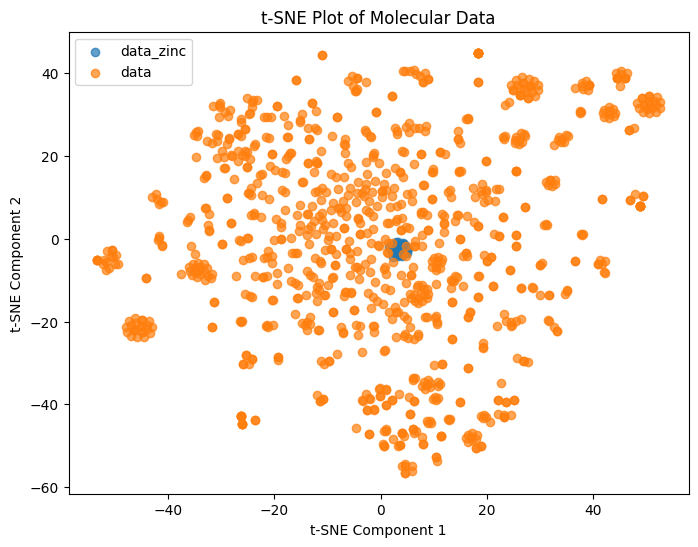

In [ ]:
# prompt: Can you plot the t-sne plot for data and data_zinc

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming you have already calculated fingerprints or embeddings for 'data' and 'data_zinc'
# Replace 'fingerprints' with your actual feature vectors

# Example:  If you're using RDKit fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_fingerprints(smiles_list):
    fingerprints = []
    for smiles in smiles_list:
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) # Example fingerprint
                fingerprints.append(fp)
            else:
                print(f"Invalid SMILES: {smiles}")
                fingerprints.append(np.zeros(2048)) # or handle differently
        except Exception as e:
            print(f"Error processing SMILES {smiles}: {e}")
            fingerprints.append(np.zeros(2048)) # or handle differently
    return np.array(fingerprints)

fingerprints_data = generate_fingerprints(data)
# fingerprints_zinc = generate_fingerprints(data_zinc[:len(data)]) # Match the size of 'data'
fingerprints_zinc = generate_fingerprints(data_zinc)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(fingerprints_data)
zinc_tsne = tsne.fit_transform(fingerprints_zinc)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(zinc_tsne[:, 0], zinc_tsne[:, 1], label='data_zinc', alpha=0.7)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], label='data', alpha=0.7)

plt.title('t-SNE Plot of Molecular Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerator
[16:51:19] DEPRECATION WARNING: please use MorganGenerat

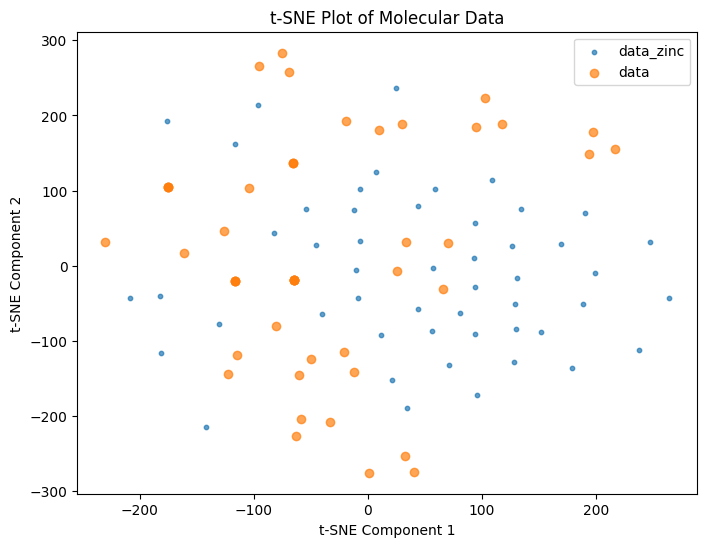

In [ ]:
# prompt: why there is only one dot for data_zinc in the above t-sne plot

import os
from google.colab import drive
import pandas as pd
import rdkit
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# ... (Your existing code for loading data)

# ... (Your existing code to generate data and data_zinc lists)

# Get the Train data JTVAE use for their code (Zinc Data)
with open('gdrive/MyDrive/Colab Notebooks/Data_Bases_zinc_and_Qm9/train.txt') as f:
    data_zinc = [line.strip("\r\n ").split()[0] for line in f]

# Generate fingerprints
fingerprints_data = generate_fingerprints(data)
# Use the full data_zinc for comparison - crucial change
fingerprints_zinc = generate_fingerprints(data_zinc)


# Combine the fingerprints for a single t-SNE fit
combined_fingerprints = np.concatenate((fingerprints_data, fingerprints_zinc), axis=0)

# Perform t-SNE on the combined data
tsne = TSNE(n_components=2, random_state=42, perplexity=30) # Adjust perplexity if necessary
combined_tsne = tsne.fit_transform(combined_fingerprints)


# Split the t-SNE results back into the original datasets
data_tsne = combined_tsne[:len(data)]
zinc_tsne = combined_tsne[len(data):]



# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(zinc_tsne[:, 0], zinc_tsne[:, 1], label='data_zinc', alpha=0.7, s=10) # Reduce point size
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], label='data', alpha=0.7)
plt.title('t-SNE Plot of Molecular Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


# preprocess.py

In [3]:
!pip install rdkit
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import torch
import torch.nn as nn
import math, random, sys
from optparse import OptionParser
import pickle
import rdkit
import json
import rdkit.Chem as Chem
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from collections import defaultdict
import copy
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import numpy as np
from collections import deque
import os, random
import torch.nn.functional as F
import pdb

In [ ]:
# for smiles in data:
#     # print(smiles)
#     mol = Chem.MolFromSmiles(smiles)
#     # print(mol)
#     # print(Chem.Kekulize(mol))
#     for atom in mol.GetAtoms():
#       print(Chem.Atom(atom.GetSymbol()))
#     #     print(atom.SetAtomMapNum(0))

In [ ]:

benzynes_i = ['C1=CC=CC=C1', 'C1=CC=NC=C1', 'C1=CC=NN=C1', 'C1=CN=CC=N1', 'C1=CN=CN=C1', 'C1=CN=NC=N1', 'C1=CN=NN=C1', 'C1=NC=NC=N1', 'C1=NN=CN=N1']
penzynes_i = ['C1=C[NH]C=C1', 'C1=C[NH]C=N1', 'C1=C[NH]N=C1', 'C1=C[NH]N=N1', 'C1=COC=C1', 'C1=COC=N1', 'C1=CON=C1', 'C1=CSC=C1', 'C1=CSC=N1', 'C1=CSN=C1', 'C1=CSN=N1', 'C1=NN=C[NH]1', 'C1=NN=CO1', 'C1=NN=CS1', 'C1=N[NH]C=N1', 'C1=N[NH]N=C1', 'C1=N[NH]N=N1', 'C1=NN=N[NH]1', 'C1=NN=NS1', 'C1=NOC=N1', 'C1=NON=C1', 'C1=NSC=N1', 'C1=NSN=C1']


In [ ]:
Monocyclic Aromatics:

Benzene: SMILES: c1ccccc1
Pyridine: SMILES: c1ccncc1
Pyrimidine: SMILES: c1cncnc1
Pyrazine: SMILES: c1cnccn1
Furan: SMILES: c1ccoc1
Thiophene: SMILES: c1ccsc1
Imidazole: SMILES: c1cnc[nH]1
Indole: SMILES: c1ccc2c(c1)[nH]c3ccccc23

Polycyclic Aromatics:

Naphthalene: SMILES: c1ccc2ccccc2c1
Anthracene: SMILES: c1ccc2cc3ccccc3cc2c1
Phenanthrene: SMILES: c1ccc2c(c1)ccc3c2cccc3
Pyrene: SMILES: c1ccc2c(c1)ccc3c2ccc4c3cccc4

Heterocyclic and Fused Systems:

Quinoline: SMILES: c1ccc2ncccc2c1
Isoquinoline: SMILES: c1ccc2ccnc(c2)c1
Benzofuran: SMILES: c1ccc2occc2c1
Benzothiophene: SMILES: c1ccc2sccc2c1


In [42]:
# List of benzene-based aromatic substructures
benzynes_i = [
    'C1=CC=CC=C1',
    'C1=CC=NC=C1',
    'C1=CC=NN=C1',
    'C1=CN=CC=N1',
    'C1=CN=CN=C1',
    'C1=CN=NC=N1',
    'C1=CN=NN=C1',
    'C1=NC=NC=N1',
    'C1=NN=CN=N1'
]

# List of pentazine-based (or related) aromatic substructures
penzynes_i = [
    'C1=C[NH]C=C1',
    'C1=C[NH]C=N1',
    'C1=C[NH]N=C1',
    'C1=C[NH]N=N1',
    'C1=COC=C1',
    'C1=COC=N1',
    'C1=CON=C1',
    'C1=CSC=C1',
    'C1=CSC=N1',
    'C1=CSN=C1',
    'C1=CSN=N1',
    'C1=NN=C[NH]1',
    'C1=NN=CO1',
    'C1=NN=CS1',
    'C1=N[NH]C=N1',
    'C1=N[NH]N=C1',
    'C1=N[NH]N=N1',
    'C1=NN=N[NH]1',
    'C1=NN=NS1',
    'C1=NOC=N1',
    'C1=NON=C1',
    'C1=NSC=N1',
    'C1=NSN=C1'
]

In [43]:
MST_MAX_WEiGHT_10 = 100
MAX_NCAND_10 = 2000


# **Explaintation of set_atommap Function Start**

In [ ]:
# def set_atommap(mol, num=0):
for smil in data:
  mol = Chem.MolFromSmiles(smil)
  for atom in mol.GetAtoms():
    # print(atom)
    print(atom.SetAtomMapNum(0))


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

In [ ]:
data[0]

'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC'

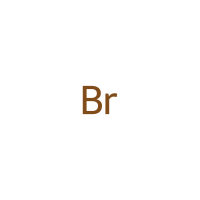

In [ ]:
mol = Chem.MolFromSmiles(data[0])
atom = mol.GetAtomWithIdx(0)

# atom = mol.GetAtoms()

single_atom_mol = Chem.RWMol()
single_atom_mol.AddAtom(atom)
img = Draw.MolToImage(single_atom_mol, size=(200,200))
display(img)
print(atom)

# **Explaintation of set_atommap Function End**

# **Explaination of  get_mol(smiles) Function Start**

In [ ]:
for smiles in data:
    # print(smiles)
    mol = Chem.MolFromSmiles(smiles)
    Chem.Kekulize(mol)
    print(mol)
    #if mol is None:
        # return None
    # x = Chem.Kekulize(mol)
    # print(x)

In [ ]:
mol =[]
for smiles in data:
  mol_1 = Chem.MolFromSmiles(smiles)
  if mol_1 is None:
    print(None)
  Chem.Kekulize(mol_1)
  mol.append(mol_1)
  # print(mol)

In [ ]:
len(mol)

50

In [ ]:
smiles = []
for i in mol:
  smiles.append(Chem.MolToSmiles(i, kekuleSmiles=True))
# print(Chem.MolToSmiles(mol, kekuleSmiles=True))

In [ ]:
smiles

['CCC[C@@H](C)C1=CC(/[NH+]=C/C2=C([O-])C(OC)=CC(Br)=C2Br)=C(O)C=C1',
 'CC1=CC(Br)=C(OCC(=O)N/N=C/C2=C(O)C(O)=C(O)C=C2)C(Br)=C1',
 'O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1',
 'CC1=[NH+]C2=C(C=C(/N=C/C3=C(O)C=CC=C3Br)C=C2)N1',
 'CC1=[NH+]C2=C(C=C(/N=C/C3=C([O-])C=CC=C3Br)C=C2)N1',
 'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
 'C#CC[N@H+](CC(=O)C1=CC=CC=C1)C(C)(C)C',
 'O=C1NC2=C(C=CC=C2)[C@@]1(C1=CN[C@H]2C=CC=C[C@H]12)C1=CNC2=C1C=CC=C2',
 'O=C1NC2=C(C=CC=C2)[C@@]1(C1=CN[C@@H]2C=CC=C[C@@H]12)C1=CNC2=C1C=CC=C2',
 'O=C1NC2=C(C=CC=C2)[C@]1(C1=CN[C@@H]2C=CC=C[C@@H]12)C1=CNC2=C1C=CC=C2',
 'CCC[N@H+](CC1CC1)[C@@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
 'CCC[N@H+](CC1CC1)[C@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
 'CCC[N@@H+](CC1CC1)[C@@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
 'CCC[N@@H+](CC1CC1)[C@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
 'OC1=C([C@@H]2NO[C@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
 'OC1=C([C@H]2NO[C@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
 'OC1=C([C@H]2NO[C@@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
 'COC1=C(O)C=C(C[NH2+]C2CCCC2)C

In [ ]:
for smi in data:
    print("Processing SMILES:", smi)
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Invalid SMILES")
        continue
    # For example, let's copy the first atom in each molecule inline
    atom = mol.GetAtomWithIdx(0)
    new_atom = Chem.Atom(atom.GetSymbol())
    new_atom.SetFormalCharge(atom.GetFormalCharge())
    new_atom.SetAtomMapNum(atom.GetAtomMapNum())
    print("Copied atom details:")
    print("  Symbol:", new_atom.GetSymbol())
    print("  Formal Charge:", new_atom.GetFormalCharge())
    print("  Atom Map Number:", new_atom.GetAtomMapNum())
    print("-" * 40)

Processing SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Copied atom details:
  Symbol: Br
  Formal Charge: 0
  Atom Map Number: 0
----------------------------------------
Processing SMILES: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Copied atom details:
  Symbol: Br
  Formal Charge: 0
  Atom Map Number: 0
----------------------------------------
Processing SMILES: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Copied atom details:
  Symbol: Br
  Formal Charge: 0
  Atom Map Number: 0
----------------------------------------
Processing SMILES: Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Copied atom details:
  Symbol: Br
  Formal Charge: 0
  Atom Map Number: 0
----------------------------------------
Processing SMILES: Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Copied atom details:
  Symbol: Br
  Formal Charge: 0
  Atom Map Number: 0
----------------------------------------
Processing SMILES: C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1
Copied atom details:
 

In [ ]:
from rdkit import Chem

# Your list of SMILES strings
smiles_list = [
    'CCC[C@@H](C)C1=CC(/[NH+]=C/C2=C([O-])C(OC)=CC(Br)=C2Br)=C(O)C=C1',
    'CC1=CC(Br)=C(OCC(=O)N/N=C/C2=C(O)C(O)=C(O)C=C2)C(Br)=C1',
    'O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1',
    'CC1=[NH+]C2=C(C=C(/N=C/C3=C(O)C=CC=C3Br)C=C2)N1',
    'CC1=[NH+]C2=C(C=C(/N=C/C3=C([O-])C=CC=C3Br)C=C2)N1',
    'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
    'C#CC[N@H+](CC(=O)C1=CC=CC=C1)C(C)(C)C',
    'O=C1NC2=C(C=CC=C2)[C@@]1(C1=CN[C@H]2C=CC=C[C@H]12)C1=CNC2=C1C=CC=C2',
    'O=C1NC2=C(C=CC=C2)[C@@]1(C1=CN[C@@H]2C=CC=C[C@@H]12)C1=CNC2=C1C=CC=C2',
    'O=C1NC2=C(C=CC=C2)[C@]1(C1=CN[C@@H]2C=CC=C[C@@H]12)C1=CNC2=C1C=CC=C2',
    'CCC[N@H+](CC1CC1)[C@@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
    'CCC[N@H+](CC1CC1)[C@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
    'CCC[N@@H+](CC1CC1)[C@@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
    'CCC[N@@H+](CC1CC1)[C@H]1CC(=O)N(C2=CC=CC=C2)C1=O',
    'OC1=C([C@@H]2NO[C@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
    'OC1=C([C@H]2NO[C@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
    'OC1=C([C@H]2NO[C@@]3(O)C4CCN(CC4)[C@H]23)C=CC=C1',
    'COC1=C(O)C=C(C[NH2+]C2CCCC2)C=C1',
    'C=C1N(C[C@@H]2[NH2+]CCC3=C2C=CC=C3)C(=O)OC12CCCCC2',
    'N#CC1=C2S[C@@H]3CCCC[C@]3(OCC(=O)C3=CC=CC=C3)N2C(=O)[C@@H](C#N)C12CCCCC2',
    'O[C@H](COC1CCCCC1)CN1CC[NH+](C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)CN1CC[NH+](C[C@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)C[N@H+]1CC[N@H+](C[C@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)C[N@H+]1CC[N@@H+](C[C@H](O)COC2CCCCC2)CC1',
    'O[C@@H](COC1CCCCC1)CN1CC[NH+](C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)C[NH+]1CCN(C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@@H](COC1CCCCC1)C[N@H+]1CC[N@H+](C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)C[N@H+]1CC[N@H+](C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@@H](COC1CCCCC1)C[N@H+]1CC[N@@H+](C[C@@H](O)COC2CCCCC2)CC1',
    'O[C@H](COC1CCCCC1)C[N@H+]1CC[N@@H+](C[C@@H](O)COC2CCCCC2)CC1',
    'C[N@H+](CC1=C(O)C=CC2=C1C=CC=C2)C1CCCCC1',
    'O=C(C1=CC=C(/N=C/C2=C(O)C=C(O)C=C2)C=C1)N1CCCCC1',
    'O=C(C1=CC=C(/[NH+]=C/C2=C(O)C=C(O)C=C2)C=C1)N1CCCCC1',
    'O=C(C1=CC=C(/[NH+]=C/C2=C([O-])C=C(O)C=C2)C=C1)N1CCCCC1',
    'CC1=CC=C(C2=NN[C@@]3(S2)C(=O)N(CCN2CCCCC2)C2=CC=CC=C23)C=C1',
    'BrC1=CC=C(CN2C(CN3CCCCC3)=[NH+]C3=C2C=CC=C3)C=C1',
    'BrC1=CC=C(CN2C(CN3CCCCC3)=NC3=C2C=CC=C3)C=C1',
    'COC1=CC=CC(OCCN2C([C@H](C)N3CCCCC3)=[NH+]C3=C2C=CC=C3)=C1',
    'CC(=O)[C@]1(N2CCCCC2)CC[N@@H+]([C@@H]2CC(=O)N(CC3=CC=C(Cl)C=C3)C2=O)CC1',
    'CC(=O)[C@]1(N2CCCCC2)CC[N@H+]([C@H]2CC(=O)N(CC3=CC=C(Cl)C=C3)C2=O)CC1',
    'NC(=O)[C@]1(N2CCCCC2)CC[N@@H+]([C@H]2CC(=O)N(CC(C3=CC=CC=C3)C3=CC=CC=C3)C2=O)CC1',
    'FC(F)(F)COC1=NC(N2CCCCC2)=NC(N2CC[NH+](CC3=CC=CC=C3)CC2)=N1',
    'CC(=O)C1([NH+]2CCCCC2)CCN([C@@H]2CC(=O)N(CC3=CC=C(Cl)C=C3)C2=O)CC1',
    'CC(=O)C1([NH+]2CCCCC2)CCN([C@H]2CC(=O)N(CC3=CC=C(Cl)C=C3)C2=O)CC1',
    'NC(=O)C1([NH+]2CCCCC2)CCN([C@H]2CC(=O)N(CC(C3=CC=CC=C3)C3=CC=CC=C3)C2=O)CC1',
    'O=C(C[NH+]1CCCCC1)N/N=C/C1=CC=CC=C1OCC1=CC=CC=C1',
    'CN(C)C1=CC=C(/C=N/NC(=O)C[NH+]2CCCCC2)C=C1',
    'CCOC(=O)C1=C(NC(=O)C[NH+]2CCCCC2)C(C)=C(C)S1',
    'CCN(CC)C(=O)C1=CC=C(NC(=O)C[NH+]2CCCCC2)C=C1',
    'CCCCS(=O)(=O)[C@H]1CCCC[C@@H]1OC(=O)CC[NH+]1CCCCC1'
]

# Process each SMILES inline, copying the molecule's atoms and bonds
for smi in smiles_list:
    print("Processing SMILES:", smi)
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Invalid SMILES:", smi)
        continue
    # Create an empty editable molecule (RWMol)
    new_mol = Chem.RWMol(Chem.MolFromSmiles(''))

    # Copy atoms
    for atom in mol.GetAtoms():
        new_atom = Chem.Atom(atom.GetSymbol())
        new_atom.SetFormalCharge(atom.GetFormalCharge())
        new_atom.SetAtomMapNum(atom.GetAtomMapNum())
        new_mol.AddAtom(new_atom)

    # Copy bonds
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtomIdx()
        a2 = bond.GetEndAtomIdx()
        bt = bond.GetBondType()
        new_mol.AddBond(a1, a2, bt)

    # Attempt to sanitize the new molecule to ensure it is chemically valid
    try:
        Chem.SanitizeMol(new_mol)
    except Exception as e:
        print("Sanitization error:", e)

    # Convert the new molecule to a SMILES string and print it
    new_smiles = Chem.MolToSmiles(new_mol)
    print("Copied Molecule SMILES:", new_smiles)
    print("-" * 40)


Processing SMILES: CCC[C@@H](C)C1=CC(/[NH+]=C/C2=C([O-])C(OC)=CC(Br)=C2Br)=C(O)C=C1
Copied Molecule SMILES: CCCC(C)c1ccc(O)c([NH+]=Cc2c([O-])c(OC)cc(Br)c2Br)c1
----------------------------------------
Processing SMILES: CC1=CC(Br)=C(OCC(=O)N/N=C/C2=C(O)C(O)=C(O)C=C2)C(Br)=C1
Copied Molecule SMILES: Cc1cc(Br)c(OCC(=O)NN=Cc2ccc(O)c(O)c2O)c(Br)c1
----------------------------------------
Processing SMILES: O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1
Sanitization error: Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 17
Copied Molecule SMILES: O=C(CSc1nc(=O)c(-c2ccccc2)c([O-])[nH2+]1)Nc1ccc(Br)cn1
----------------------------------------
Processing SMILES: CC1=[NH+]C2=C(C=C(/N=C/C3=C(O)C=CC=C3Br)C=C2)N1
Sanitization error: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 17 18 19
Copied Molecule SMILES: Cc1nc2cc(N=Cc3c(O)cccc3Br)ccc2[nH2+]1
----------------------------------------
Processing SMILES: CC1=[NH+]C2=C(C=C(/N=C/C3=C([O-])C=CC=C3Br)C=C2)N1
Sanitization error: C

[22:49:46] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 17
[22:49:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 17 18 19
[22:49:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 17 18 19
[22:49:46] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 25 26 27
[22:49:46] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 25 26 27
[22:49:46] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 25 26 27


In [ ]:
# from rdkit import Chem

# # Your list of SMILES strings
# smiles_list = [
#     'CCC[C@@H](C)C1=CC(/[NH+]=C/C2=C([O-])C(OC)=CC(Br)=C2Br)=C(O)C=C1',
#     'CC1=CC(Br)=C(OCC(=O)N/N=C/C2=C(O)C(O)=C(O)C=C2)C(Br)=C1',
#     'O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1',
#     'CC1=[NH+]C2=C(C=C(/N=C/C3=C(O)C=CC=C3Br)C=C2)N1',
#     'CC1=[NH+]C2=C(C=C(/N=C/C3=C([O-])C=CC=C3Br)C=C2)N1',
#     'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
#     'C#CC[N@H+](CC(=O)C1=CC=CC=C1)C(C)(C)C'
#     # ... (add the rest of your SMILES strings as needed)
# ]

for smi in smiles_list:
    print("Processing SMILES:", smi)
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Invalid SMILES")
        continue

    # 1. Kekulize the molecule (this converts aromatic bonds into alternating single/double bonds)
    try:
        Chem.Kekulize(mol, clearAromaticFlags=True)
    except Exception as e:
        print("Kekulize error:", e)

    # 2. Select a set of atoms for the fragment.
    # For demonstration, use the first 3 atoms (if the molecule has at least 3 atoms)
    num_atoms = mol.GetNumAtoms()
    atoms = list(range(min(num_atoms, 3)))

    # 3. Create a fragment SMILES from the chosen atoms,
    #    with kekuleSmiles=True so the fragment is in Kekulé form.
    frag_smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
    print("Fragment SMILES:", frag_smiles)

    # 4. Build a new molecule from the fragment SMILES without sanitizing yet.
    new_mol = Chem.MolFromSmiles(frag_smiles, sanitize=False)
    if new_mol is None:
        print("Error creating fragment molecule from SMILES")
        continue

    # 5. Inline "copy_edit_mol" logic:
    #    Create an empty editable molecule, then copy each atom and bond from new_mol.
    rwmol = Chem.RWMol(Chem.MolFromSmiles(''))
    for atom in new_mol.GetAtoms():
        new_atom = Chem.Atom(atom.GetSymbol())
        new_atom.SetFormalCharge(atom.GetFormalCharge())
        new_atom.SetAtomMapNum(atom.GetAtomMapNum())
        rwmol.AddAtom(new_atom)
    for bond in new_mol.GetBonds():
        a1 = bond.GetBeginAtomIdx()
        a2 = bond.GetEndAtomIdx()
        bt = bond.GetBondType()
        rwmol.AddBond(a1, a2, bt)
    copied_mol = rwmol.GetMol()

    # 6. Sanitize the new (copied) molecule to ensure chemical validity.
    try:
        Chem.SanitizeMol(copied_mol)
    except Exception as e:
        print("Sanitization error:", e)
        continue

    # 7. Convert the sanitized molecule to a SMILES string and print it.
    final_smiles = Chem.MolToSmiles(copied_mol)
    print("Final clique molecule SMILES:", final_smiles)
    print("-" * 40)


Processing SMILES: CCC[C@@H](C)C1=CC(/[NH+]=C/C2=C([O-])C(OC)=CC(Br)=C2Br)=C(O)C=C1
Fragment SMILES: CCC
Final clique molecule SMILES: CCC
----------------------------------------
Processing SMILES: CC1=CC(Br)=C(OCC(=O)N/N=C/C2=C(O)C(O)=C(O)C=C2)C(Br)=C1
Fragment SMILES: C=CC
Final clique molecule SMILES: C=CC
----------------------------------------
Processing SMILES: O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1
Fragment SMILES: CC=O
Final clique molecule SMILES: CC=O
----------------------------------------
Processing SMILES: CC1=[NH+]C2=C(C=C(/N=C/C3=C(O)C=CC=C3Br)C=C2)N1
Fragment SMILES: CC=[NH+]
Final clique molecule SMILES: CC=[NH2+]
----------------------------------------
Processing SMILES: CC1=[NH+]C2=C(C=C(/N=C/C3=C([O-])C=CC=C3Br)C=C2)N1
Fragment SMILES: CC=[NH+]
Final clique molecule SMILES: CC=[NH2+]
----------------------------------------
Processing SMILES: C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1
Fragment SMILES: C#CC
Final clique molecule SMILES: C#CC
---------

In [ ]:
data

['Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC',
 'Brc1cc(C)cc(Br)c1OCC(=O)N\\N=C\\c2c(O)c(O)c(O)cc2',
 'Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3',
 'Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
 'Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
 'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
 'C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1',
 'C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4',
 'C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4',
 'C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4',
 'C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC',
 'C1CCCCC12C(=C)N(C(=O)O2)C[C@@H]3

# **Expalin this code function "tree_decomp(mol):"**

In [ ]:
import rdkit
import rdkit.Chem as Chem
from collections import defaultdict
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# Global constant used by tree_decomp:
MST_MAX_WEiGHT_10 = 100

# Define the tree_decomp function exactly as provided
def tree_decomp(mol):
    n_atoms = mol.GetNumAtoms()
    if n_atoms == 1:  # special case: single-atom molecule
        return [[0]], []

    cliques = []
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtom().GetIdx()
        a2 = bond.GetEndAtom().GetIdx()
        if not bond.IsInRing():
            cliques.append([a1, a2])

    ssr = [list(x) for x in Chem.GetSymmSSSR(mol)]
    cliques.extend(ssr)

    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)

    # Merge Rings with intersection > 2 atoms
    for i in range(len(cliques)):
        if len(cliques[i]) <= 2:
            continue
        for atom in cliques[i]:
            for j in nei_list[atom]:
                if i >= j or len(cliques[j]) <= 2:
                    continue
                inter = set(cliques[i]) & set(cliques[j])
                if len(inter) > 2:
                    cliques[i].extend(cliques[j])
                    cliques[i] = list(set(cliques[i]))
                    cliques[j] = []

    cliques = [c for c in cliques if len(c) > 0]
    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)

    # Build edges and add singleton cliques
    edges = defaultdict(int)
    for atom in range(n_atoms):
        if len(nei_list[atom]) <= 1:
            continue
        cnei = nei_list[atom]
        bonds = [c for c in cnei if len(cliques[c]) == 2]
        rings = [c for c in cnei if len(cliques[c]) > 4]
        if len(bonds) > 2 or (len(bonds) == 2 and len(cnei) > 2):
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1, c2)] = 1
        elif len(rings) > 2:
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1, c2)] = MST_MAX_WEiGHT_10 - 1
        else:
            for i in range(len(cnei)):
                for j in range(i + 1, len(cnei)):
                    c1, c2 = cnei[i], cnei[j]
                    inter = set(cliques[c1]) & set(cliques[c2])
                    if edges[(c1, c2)] < len(inter):
                        edges[(c1, c2)] = len(inter)

    edges = [u + (MST_MAX_WEiGHT_10 - v,) for u, v in edges.items()]
    if len(edges) == 0:
        return cliques, edges

    # Compute Maximum Spanning Tree
    row, col, data = zip(*edges)
    n_clique = len(cliques)
    clique_graph = csr_matrix((data, (row, col)), shape=(n_clique, n_clique))
    junc_tree = minimum_spanning_tree(clique_graph)
    row, col = junc_tree.nonzero()
    edges = [(row[i], col[i]) for i in range(len(row))]
    return (cliques, edges)

# Your list of SMILES strings
smiles_list = [
    'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC',
    'Brc1cc(C)cc(Br)c1OCC(=O)N\\N=C\\c2c(O)c(O)c(O)cc2',
    'Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3',
    'Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
    'Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
    'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
    'C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1',
    'C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
    'C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
    'C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
    'C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
    'C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
    'C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
    'C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
    'C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4',
    'C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4',
    'C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4',
    'C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC',
    'C1CCCCC12C(=C)N(C(=O)O2)C[C@@H]3[NH2+]CCc(c34)cccc4',
    'C1CCCCC12C(C#N)=C3N(C(=O)[C@H]2C#N)[C@@]4([C@H](S3)CCCC4)OCC(=O)c5ccccc5',
    'C1CCCCC1OC[C@@H](O)CN2CC[NH+](CC2)C[C@@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@@H](O)CN2CC[NH+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@@H](O)C[N@H+]2CC[N@H+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)CN2CC[NH+](CC2)C[C@@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)CN2CC[NH+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@H+](CC2)C[C@@H](O)COC3CCCCC3',
    'C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@H+](CC2)C[C@H](O)COC3CCCCC3',
    'C1CCCCC1[N@H+](C)Cc2c(O)ccc(c23)cccc3',
    'C1CCCCN1C(=O)c2ccc(cc2)\\N=C\\c3c(O)c(O)c(O)cc3',
    'C1CCCCN1C(=O)c2ccc(cc2)\\[NH+]=C\\c3c(O)c(O)c(O)cc3',
    'C1CCCCN1C(=O)c2ccc(cc2)\\[NH+]=C\\c3c([O-])cc(O)cc3',
    'C1CCCCN1CCN(C2=O)c(cccc3)c3[C@@]24NN=C(S4)c(cc5)ccc5C',
    'C1CCCCN1Cc([nH+]c(c23)cccc2)n3Cc4ccc(Br)cc4',
    'C1CCCCN1Cc(n2)n(c(c23)cccc3)Cc4ccc(Br)cc4',
    'C1CCCCN1[C@@H](C)c([nH+]c(c23)cccc2)n3CCOc4cc(OC)ccc4',
    'C1CCCCN1[C@]2(C(=O)C)CC[N@@H+](CC2)[C@@H](C3=O)CC(=O)N3Cc4ccc(Cl)cc4',
    'C1CCCCN1[C@]2(C(=O)C)CC[N@H+](CC2)[C@H](C3=O)CC(=O)N3Cc4ccc(Cl)cc4',
    'C1CCCCN1[C@]2(C(=O)N)CCN(CC2)[C@H](C3=O)CC(=O)N3CC(c4ccccc4)c5ccccc5',
    'C1CCCCN1c2nc(nc(n2)OCC(F)(F)F)N3CC[NH+](CC3)Cc4ccccc4',
    'C1CCCC[NH+]1C2(C(=O)C)CCN(CC2)[C@@H](C3=O)CC(=O)N3Cc4ccc(Cl)cc4',
    'C1CCCC[NH+]1C2(C(=O)C)CCN(CC2)[C@H](C3=O)CC(=O)N3Cc4ccc(Cl)cc4',
    'C1CCCC[NH+]1C2(C(=O)N)CCN(CC2)[C@H](C3=O)CC(=O)N3CC(c4ccccc4)c5ccccc5',
    'C1CCCC[NH+]1CC(=O)N\\N=C\\c2c(cccc2)OCc3ccccc3',
    'C1CCCC[NH+]1CC(=O)N\\N=C\\c2ccc(cc2)N(C)C',
    'C1CCCC[NH+]1CC(=O)Nc(c(C)c(s2)C)c2C(=O)OCC',
    'C1CCCC[NH+]1CC(=O)Nc(cc2)ccc2C(=O)N(CC)CC',
    'C1CCCC[NH+]1CCC(=O)O[C@@H]2[C@H](CCCC2)S(=O)(=O)CCCC'
]

# Now, run tree_decomp on each molecule in the provided data list
results = []  # to store tuples of (smiles, cliques, edges)
none_found = False

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Error: Unable to convert SMILES to molecule:", smi)
        none_found = True
        continue
    cliques, edges = tree_decomp(mol)
    # Check if either cliques or edges is None:
    if cliques is None or edges is None:
        print("Error: tree_decomp returned None for SMILES:", smi)
        none_found = True
    results.append((smi, cliques, edges))

# Print results for each SMILES
for smi, cliques, edges in results:
    print("SMILES:", smi)
    print("Cliques:", cliques)
    print("Edges:", edges)
    print("-" * 60)

if none_found:
    print("Some molecules produced None values in tree_decomp.")
else:
    print("No None values detected in tree_decomp outputs.")


SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Cliques: [[0, 1], [2, 3], [5, 6], [6, 7], [8, 9], [10, 11], [11, 12], [12, 13], [14, 15], [19, 20], [20, 21], [20, 22], [22, 23], [23, 24], [1, 10, 8, 5, 4, 2], [14, 16, 17, 19, 18, 13], [20]]
Edges: [(0, 14), (1, 14), (2, 3), (2, 14), (4, 14), (5, 6), (5, 14), (6, 7), (7, 15), (8, 15), (9, 15), (9, 16), (10, 16), (11, 12), (11, 16), (12, 13)]
------------------------------------------------------------
SMILES: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Cliques: [[0, 1], [3, 4], [6, 7], [8, 9], [9, 10], [10, 11], [11, 12], [11, 13], [13, 14], [14, 15], [15, 16], [17, 18], [19, 20], [21, 22], [1, 8, 6, 5, 3, 2], [17, 19, 21, 23, 24, 16], [11]]
Edges: [(0, 14), (1, 14), (2, 14), (3, 4), (3, 14), (4, 5), (5, 16), (6, 16), (7, 8), (7, 16), (8, 9), (9, 10), (10, 15), (11, 15), (12, 15), (13, 15)]
------------------------------------------------------------
SMILES: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Cl

NameError: name 'results' is not defined

In [ ]:
# prompt: Can you also make thgius results in pandaDataFrame with  smi, cliques, edges collumns

import pandas as pd

# Assuming 'results' list is populated as in the previous code
# results = [(smi, cliques, edges), ...]

# Create a list of dictionaries, where each dictionary represents a row in the DataFrame
data_for_df = []
for smi, cliques, edges in results:
    data_for_df.append({
        'smi': smi,
        'cliques': cliques,
        'edges': edges
    })

# Create the pandas DataFrame
df_results_tree_docomposition = pd.DataFrame(data_for_df)

# Print the DataFrame
df_results_tree_docomposition


smi  \
0   Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2...   
1     Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2   
2   Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-...   
3       Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3   
4    Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3   
5                    C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1   
6                 C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1   
7   C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)...   
8   C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)...   
9   C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)c...   
10     C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3   
11      C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3   
12      C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3   
13       C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3   
14    C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4   
15     C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4   
16      C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4   
17                      C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC   
18  C1CCCCC12C(=C)N(C(=O)O2)C[C@@H]3[NH2+]CCc(c34)...   
19  C1CCCCC12C(C#N)=C3N(C(=O)[C@H]2C#N)[C@@]4([C@H...   
20  C1CCCCC1OC[C@@H](O)CN2CC[NH+](CC2)C[C@@H](O)CO...   
21  C1CCCCC1OC[C@@H](O)CN2CC[NH+](CC2)C[C@H](O)COC...   
22  C1CCCCC1OC[C@@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@H...   
23  C1CCCCC1OC[C@@H](O)C[N@H+]2CC[N@H+](CC2)C[C@H]...   
24  C1CCCCC1OC[C@H](O)CN2CC[NH+](CC2)C[C@@H](O)COC...   
25  C1CCCCC1OC[C@H](O)CN2CC[NH+](CC2)C[C@H](O)COC3...   
26  C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@@H...   
27  C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@@H+](CC2)C[C@H]...   
28  C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@H+](CC2)C[C@@H]...   
29  C1CCCCC1OC[C@H](O)C[N@H+]2CC[N@H+](CC2)C[C@H](...   
30              C1CCCCC1[N@H+](C)Cc2c(O)ccc(c23)cccc3   
31      C1CCCCN1C(=O)c2ccc(cc2)\N=C\c3c(O)c(O)c(O)cc3   
32  C1CCCCN1C(=O)c2ccc(cc2)\[NH+]=C\c3c(O)c(O)c(O)cc3   
33  C1CCCCN1C(=O)c2ccc(cc2)\[NH+]=C\c3c([O-])cc(O)cc3   
34  C1CCCCN1CCN(C2=O)c(cccc3)c3[C@@]24NN=C(S4)c(cc...   
35        C1CCCCN1Cc([nH+]c(c23)cccc2)n3Cc4ccc(Br)cc4   
36          C1CCCCN1Cc(n2)n(c(c23)cccc3)Cc4ccc(Br)cc4   
37  C1CCCCN1[C@@H](C)c([nH+]c(c23)cccc2)n3CCOc4cc(...   
38  C1CCCCN1[C@]2(C(=O)C)CC[N@@H+](CC2)[C@@H](C3=O...   
39  C1CCCCN1[C@]2(C(=O)C)CC[N@H+](CC2)[C@H](C3=O)C...   
40  C1CCCCN1[C@]2(C(=O)N)CCN(CC2)[C@H](C3=O)CC(=O)...   
41  C1CCCCN1c2nc(nc(n2)OCC(F)(F)F)N3CC[NH+](CC3)Cc...   
42  C1CCCC[NH+]1C2(C(=O)C)CCN(CC2)[C@@H](C3=O)CC(=...   
43  C1CCCC[NH+]1C2(C(=O)C)CCN(CC2)[C@H](C3=O)CC(=O...   
44  C1CCCC[NH+]1C2(C(=O)N)CCN(CC2)[C@H](C3=O)CC(=O...   
45       C1CCCC[NH+]1CC(=O)N\N=C\c2c(cccc2)OCc3ccccc3   
46            C1CCCC[NH+]1CC(=O)N\N=C\c2ccc(cc2)N(C)C   
47         C1CCCC[NH+]1CC(=O)Nc(c(C)c(s2)C)c2C(=O)OCC   
48          C1CCCC[NH+]1CC(=O)Nc(cc2)ccc2C(=O)N(CC)CC   
49  C1CCCC[NH+]1CCC(=O)O[C@@H]2[C@H](CCCC2)S(=O)(=...   

                                              cliques  \
0   [[0, 1], [2, 3], [5, 6], [6, 7], [8, 9], [10, ...   
1   [[0, 1], [3, 4], [6, 7], [8, 9], [9, 10], [10,...   
2   [[0, 1], [4, 7], [7, 8], [8, 9], [8, 10], [10,...   
3   [[0, 1], [5, 6], [7, 8], [8, 9], [9, 10], [17,...   
4   [[0, 1], [5, 6], [7, 8], [8, 9], [9, 10], [17,...   
5   [[0, 1], [1, 2], [2, 3], [2, 4], [2, 5], [5, 6...   
6   [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [4, 6...   
7   [[8, 9], [10, 11], [9, 19], [0, 5, 4, 3, 2, 1]...   
8   [[8, 9], [10, 11], [9, 19], [0, 5, 4, 3, 2, 1]...   
9   [[8, 9], [10, 11], [9, 19], [0, 5, 4, 3, 2, 1]...   
10  [[2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [4, 8...   
11  [[2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [4, 8...   
12  [[2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [4, 8...   
13  [[2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [4, 8...   
14  [[7, 8], [9, 12], [13, 14], [10, 9, 6, 7, 11],...   
15  [[7, 8], [9, 12], [13, 14], [10, 9, 6, 7, 11],...   
16  [[7, 8], [9, 12], [13, 14], [10, 9, 6, 7, 11],...   
17  [[4, 5], [5, 6], [6, 7], [9, 10], [11, 14], [1...   
18  [[6, 7], [9, 10], [8, 12], [12, 13], [0, 5, 4,...   
19

In [ ]:
df_results_tree_docomposition.shape

(50, 3)

In [ ]:
# prompt: is there any none or empty value in df_results_tree_docomposition

# Check for None or empty values in 'cliques' and 'edges' columns
none_count_cliques = df_results_tree_docomposition['cliques'].isnull().sum()
empty_count_cliques = df_results_tree_docomposition['cliques'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True).sum()

none_count_edges = df_results_tree_docomposition['edges'].isnull().sum()
empty_count_edges = df_results_tree_docomposition['edges'].apply(lambda x: len(x) == 0 if isinstance(x, list) else True).sum()


print(f"Number of None values in 'cliques': {none_count_cliques}")
print(f"Number of empty lists in 'cliques': {empty_count_cliques}")
print(f"Number of None values in 'edges': {none_count_edges}")
print(f"Number of empty lists in 'edges': {empty_count_edges}")

# Check for any empty or None values in the entire DataFrame
if df_results_tree_docomposition.isnull().values.any():
    print("\nDataFrame contains None values.")

if df_results_tree_docomposition.empty:
    print("\nDataFrame is empty.")


Number of None values in 'cliques': 0
Number of empty lists in 'cliques': 0
Number of None values in 'edges': 0
Number of empty lists in 'edges': 0


In [ ]:
# prompt: how can I save it "df_results_tree_docomposition" in a excel formate

# Install openpyxl if not already installed
!pip install openpyxl

# Save the DataFrame to an Excel file
df_results_tree_docomposition.to_excel('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Results_of_tree_decomposion_Smiles_cliques_edges/df_results_tree_docomposition.xlsx', index=False, engine='openpyxl')




In [ ]:
# Download the Excel file to your local machine
from google.colab import files
files.download('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Results_of_tree_decomposion_Smiles_cliques_edges/df_results_tree_docomposition.xlsx')

In [ ]:
# prompt: How can I save this results

import pickle

# Assuming 'results' is the list of tuples you generated from the previous code.

# Specify the filename for the pickle file
filename = "gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Results_of_tree_decomposion_Smiles_cliques_edges/tree_decomposition_results.pkl"

# Save the results to a pickle file
with open(filename, "wb") as f:
  pickle.dump(results, f)

print(f"Results saved to {filename}")

# To load the results later:
# with open(filename, "rb") as f:
#   loaded_results = pickle.load(f)


Results saved to gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Results_of_tree_decomposion_Smiles_cliques_edges/tree_decomposition_results.pkl


In [ ]:
# prompt: Can you check that the smiles in data and the smiles in df_results_tree_docomposition are same?

import pandas as pd
import pickle

# Load the data from the pickle file
filename = "gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Results_of_tree_decomposion_Smiles_cliques_edges/tree_decomposition_results.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

# Assuming 'data' is your original data containing SMILES strings (replace with actual data)
# Example: data = ['CC(=O)Oc1ccccc1C(=O)O', ...]  # Your actual data
data = smiles_list # from the provided code

# Check if the lengths of the SMILES list and results list are the same
if len(data) != len(results):
    print("Error: Length mismatch between data and results.")
else:
  # Create a DataFrame for comparison
  comparison_df = pd.DataFrame({'data_smiles': data, 'results_smiles': [item[0] for item in results]})

  # Compare SMILES strings
  comparison_df['smiles_match'] = comparison_df['data_smiles'] == comparison_df['results_smiles']

  # Print the DataFrame to see the comparison and any mismatches
  print(comparison_df)

  # Check for any mismatches
  if not comparison_df['smiles_match'].all():
      print("\nSMILES strings do not match in some cases.")
      mismatches = comparison_df[~comparison_df['smiles_match']]
      print(mismatches)
  else:
      print("\nAll SMILES strings match.")


                                          data_smiles  \
0   Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2...   
1     Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2   
2   Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-...   
3       Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3   
4    Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3   
5                    C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1   
6                 C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1   
7   C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)...   
8   C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)...   
9   C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)c...   
10     C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3   
11      C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3   
12      C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3   
13       C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3   
14    C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4   
15     C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4   
16      C1CC2CCN1[C@@H]([C@]23O

In [ ]:
# prompt: Can you give the atom name or structure from the clicq and their edged in df_results_tree_docomposition

# Assuming df_results_tree_docomposition is already created as in the previous code

def get_atom_info(df, smiles_str):
    """
    Retrieves clique and edge information for a given SMILES string.

    Args:
        df: The DataFrame containing SMILES, cliques, and edges.
        smiles_str: The SMILES string to search for.

    Returns:
        A tuple containing the cliques and edges, or None if the SMILES is not found.
    """
    row = df[df['smi'] == smiles_str]
    if not row.empty:
        return row['cliques'].iloc[0], row['edges'].iloc[0]
    else:
        return None

# Example usage:
smiles_to_find = 'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC'  # Replace with your desired SMILES
atom_info = get_atom_info(df_results_tree_docomposition, smiles_to_find)

if atom_info:
    cliques, edges = atom_info
    print(f"Cliques for {smiles_to_find}:\n{cliques}")
    print(f"\nEdges for {smiles_to_find}:\n{edges}")
else:
    print(f"SMILES string '{smiles_to_find}' not found in the DataFrame.")


Cliques for Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC:
[[0, 1], [2, 3], [5, 6], [6, 7], [8, 9], [10, 11], [11, 12], [12, 13], [14, 15], [19, 20], [20, 21], [20, 22], [22, 23], [23, 24], [1, 10, 8, 5, 4, 2], [14, 16, 17, 19, 18, 13], [20]]

Edges for Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC:
[(0, 14), (1, 14), (2, 3), (2, 14), (4, 14), (5, 6), (5, 14), (6, 7), (7, 15), (8, 15), (9, 15), (9, 16), (10, 16), (11, 12), (11, 16), (12, 13)]


# **Function Explain "atom_equal" **

In [ ]:
from rdkit import Chem

# --- Assume these functions are already defined and imported ---
def atom_equal(a1, a2):
    return a1.GetSymbol() == a2.GetSymbol() and a1.GetFormalCharge() == a2.GetFormalCharge()

def ring_bond_equal(b1, b2, reverse=False):
    b1_atoms = (b1.GetBeginAtom(), b1.GetEndAtom())
    if reverse:
        b2_atoms = (b2.GetEndAtom(), b2.GetBeginAtom())
    else:
        b2_atoms = (b2.GetBeginAtom(), b2.GetEndAtom())
    return atom_equal(b1_atoms[0], b2_atoms[0]) and atom_equal(b1_atoms[1], b2_atoms[1])

def copy_atom(atom):
    new_atom = Chem.Atom(atom.GetSymbol())
    new_atom.SetFormalCharge(atom.GetFormalCharge())
    new_atom.SetAtomMapNum(atom.GetAtomMapNum())
    return new_atom

def copy_edit_mol(mol):
    new_mol = Chem.RWMol(Chem.MolFromSmiles(''))
    for atom in mol.GetAtoms():
        new_atom = copy_atom(atom)
        new_mol.AddAtom(new_atom)
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtom().GetIdx()
        a2 = bond.GetEndAtom().GetIdx()
        bt = bond.GetBondType()
        new_mol.AddBond(a1, a2, bt)
    return new_mol

def attach_mols(ctr_mol, neighbors, prev_nodes, nei_amap):
    prev_nids = [node.nid for node in prev_nodes]
    for nei_node in prev_nodes + neighbors:
        nei_id, nei_mol = nei_node.nid, nei_node.mol
        amap = nei_amap[nei_id]
        for atom in nei_mol.GetAtoms():
            if atom.GetIdx() not in amap:
                new_atom = copy_atom(atom)
                amap[atom.GetIdx()] = ctr_mol.AddAtom(new_atom)
        if nei_mol.GetNumBonds() == 0:
            nei_atom = nei_mol.GetAtomWithIdx(0)
            ctr_atom = ctr_mol.GetAtomWithIdx(amap[0])
            ctr_atom.SetAtomMapNum(nei_atom.GetAtomMapNum())
        else:
            for bond in nei_mol.GetBonds():
                a1 = amap[bond.GetBeginAtom().GetIdx()]
                a2 = amap[bond.GetEndAtom().GetIdx()]
                if ctr_mol.GetBondBetweenAtoms(a1, a2) is None:
                    ctr_mol.AddBond(a1, a2, bond.GetBondType())
                elif nei_id in prev_nids:  # father node overrides
                    ctr_mol.RemoveBond(a1, a2)
                    ctr_mol.AddBond(a1, a2, bond.GetBondType())
    return ctr_mol

def local_attach(ctr_mol, neighbors, prev_nodes, amap_list):
    ctr_mol = copy_edit_mol(ctr_mol)
    nei_amap = {nei.nid: {} for nei in prev_nodes + neighbors}
    for nei_id, ctr_atom, nei_atom in amap_list:
        nei_amap[nei_id][nei_atom] = ctr_atom
    ctr_mol = attach_mols(ctr_mol, neighbors, prev_nodes, nei_amap)
    return ctr_mol.GetMol()

def enum_attach(ctr_mol, nei_node, amap, singletons):
    nei_mol, nei_idx = nei_node.mol, nei_node.nid
    att_confs = []
    black_list = [atom_idx for nei_id, atom_idx, _ in amap if nei_id in singletons]
    ctr_atoms = [atom for atom in ctr_mol.GetAtoms() if atom.GetIdx() not in black_list]
    ctr_bonds = [bond for bond in ctr_mol.GetBonds()]

    if nei_mol.GetNumBonds() == 0:  # neighbor singleton
        nei_atom = nei_mol.GetAtomWithIdx(0)
        used_list = [atom_idx for _, atom_idx, _ in amap]
        for atom in ctr_atoms:
            if atom_equal(atom, nei_atom) and atom.GetIdx() not in used_list:
                new_amap = amap + [(nei_idx, atom.GetIdx(), 0)]
                att_confs.append(new_amap)
    elif nei_mol.GetNumBonds() == 1:  # neighbor is a bond
        bond = nei_mol.GetBondWithIdx(0)
        bond_val = int(bond.GetBondTypeAsDouble())
        b1, b2 = bond.GetBeginAtom(), bond.GetEndAtom()
        for atom in ctr_atoms:
            if atom.GetAtomicNum() == 6 and atom.GetTotalNumHs() < bond_val:
                continue
            if atom_equal(atom, b1):
                new_amap = amap + [(nei_idx, atom.GetIdx(), b1.GetIdx())]
                att_confs.append(new_amap)
            elif atom_equal(atom, b2):
                new_amap = amap + [(nei_idx, atom.GetIdx(), b2.GetIdx())]
                att_confs.append(new_amap)
    else:
        for a1 in ctr_atoms:
            for a2 in nei_mol.GetAtoms():
                if atom_equal(a1, a2):
                    if a1.GetAtomicNum() == 6 and a1.GetTotalNumHs() + a2.GetTotalNumHs() < 4:
                        continue
                    new_amap = amap + [(nei_idx, a1.GetIdx(), a2.GetIdx())]
                    att_confs.append(new_amap)
        if ctr_mol.GetNumBonds() > 1:
            for b1 in ctr_bonds:
                for b2 in nei_mol.GetBonds():
                    if ring_bond_equal(b1, b2):
                        new_amap = amap + [(nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetBeginAtom().GetIdx()),
                                             (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetEndAtom().GetIdx())]
                        att_confs.append(new_amap)
                    if ring_bond_equal(b1, b2, reverse=True):
                        new_amap = amap + [(nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetEndAtom().GetIdx()),
                                             (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetBeginAtom().GetIdx())]
                        att_confs.append(new_amap)
    return att_confs


In [ ]:
# Define a simple dummy node class with attributes required by enum_attach
class DummyNode:
    def __init__(self, smiles, nid):
        self.smiles = smiles
        self.mol = Chem.MolFromSmiles(smiles)
        self.nid = nid

# Your list of SMILES strings (example subset)
# smiles_list = [
#     'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC',
#     'Brc1cc(C)cc(Br)c1OCC(=O)N\\N=C\\c2c(O)c(O)c(O)cc2',
#     'O=C(CSC1=[NH+]C([O-])=C(C2=CC=CC=C2)C(=O)N1)NC1=CC=C(Br)C=N1'
#     # ... add the rest as needed
# ]

# Use the first SMILES as the central molecule
central_smiles = smiles_list[0]
ctr_node = DummyNode(central_smiles, nid=1)

# Now, for each remaining SMILES, create a neighbor node and run enum_attach
for i, nei_smiles in enumerate(smiles_list[1:], start=2):
    nei_node = DummyNode(nei_smiles, nid=i)
    # Define singletons: if the neighbor molecule has only one atom, then it is a singleton.
    singletons = [nei_node.nid] if nei_node.mol.GetNumAtoms() == 1 else []
    # Start with an empty mapping list
    initial_amap = []
    # Call enum_attach for the central molecule and the neighbor
    attach_configs = enum_attach(ctr_node.mol, nei_node, initial_amap, singletons)

    print("Central SMILES:", central_smiles)
    print("Neighbor SMILES:", nei_smiles)
    print("Attachment Configurations from enum_attach:")
    if attach_configs:
        for conf in attach_configs:
            print(conf)
    else:
        print("No attachment configurations found.")
    print("-" * 60)


Streaming output truncated to the last 5000 lines.
[(43, 19, 24), (43, 17, 25)]
[(43, 19, 25), (43, 17, 24)]
[(43, 19, 25), (43, 17, 26)]
[(43, 19, 26), (43, 17, 25)]
[(43, 19, 26), (43, 17, 28)]
[(43, 19, 28), (43, 17, 26)]
[(43, 19, 28), (43, 17, 29)]
[(43, 19, 29), (43, 17, 28)]
[(43, 19, 14), (43, 17, 6)]
[(43, 19, 6), (43, 17, 14)]
[(43, 19, 29), (43, 17, 23)]
[(43, 19, 23), (43, 17, 29)]
------------------------------------------------------------
Central SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Neighbor SMILES: C1CCCC[NH+]1C2(C(=O)C)CCN(CC2)[C@H](C3=O)CC(=O)N3Cc4ccc(Cl)cc4
Attachment Configurations from enum_attach:
[(44, 4, 9)]
[(44, 6, 8)]
[(44, 6, 17)]
[(44, 6, 20)]
[(44, 7, 0)]
[(44, 7, 1)]
[(44, 7, 2)]
[(44, 7, 3)]
[(44, 7, 4)]
[(44, 7, 9)]
[(44, 7, 10)]
[(44, 7, 11)]
[(44, 7, 13)]
[(44, 7, 14)]
[(44, 7, 15)]
[(44, 7, 18)]
[(44, 7, 22)]
[(44, 7, 24)]
[(44, 7, 25)]
[(44, 7, 28)]
[(44, 7, 29)]
[(44, 11, 9)]
[(44, 12, 5)]
[(44, 15, 8)]
[(44, 15, 17)]
[

# **Test enum_essemble function**

# **END the EXPLAINATION**

In [44]:

def set_atommap(mol, num=0):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(num)

def get_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    Chem.Kekulize(mol)
    return mol

def get_smiles(mol):
    return Chem.MolToSmiles(mol, kekuleSmiles=True)

def sanitize(mol):
    try:
        smiles = get_smiles(mol)
        mol = get_mol(smiles)
    except Exception as e:
        return None
    return mol

def copy_atom(atom):
    new_atom = Chem.Atom(atom.GetSymbol())
    new_atom.SetFormalCharge(atom.GetFormalCharge())
    new_atom.SetAtomMapNum(atom.GetAtomMapNum())
    return new_atom

def copy_edit_mol(mol):
    new_mol = Chem.RWMol(Chem.MolFromSmiles(''))
    for atom in mol.GetAtoms():
        new_atom = copy_atom(atom)
        new_mol.AddAtom(new_atom)
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtom().GetIdx()
        a2 = bond.GetEndAtom().GetIdx()
        bt = bond.GetBondType()
        new_mol.AddBond(a1, a2, bt)
    return new_mol

def get_clique_mol(mol, atoms):
    Chem.Kekulize(mol, clearAromaticFlags=True)
    smiles = Chem.MolFragmentToSmiles(mol, atoms, kekuleSmiles=True)
    new_mol = Chem.MolFromSmiles(smiles, sanitize=False)
    new_mol = copy_edit_mol(new_mol).GetMol()
    new_mol = sanitize(new_mol) #We assume this is not None
    return new_mol


In [45]:
def tree_decomp(mol):

    n_atoms = mol.GetNumAtoms()
    if n_atoms == 1: #special case
        return [[0]], []

    cliques = []
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtom().GetIdx()
        a2 = bond.GetEndAtom().GetIdx()
        if not bond.IsInRing():
            cliques.append([a1,a2])

    ssr = [list(x) for x in Chem.GetSymmSSSR(mol)]
    cliques.extend(ssr)

    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)

    #Merge Rings with intersection > 2 atoms
    for i in range(len(cliques)):
        if len(cliques[i]) <= 2: continue
        for atom in cliques[i]:
            for j in nei_list[atom]:
                if i >= j or len(cliques[j]) <= 2: continue
                inter = set(cliques[i]) & set(cliques[j])
                if len(inter) > 2:
                    cliques[i].extend(cliques[j])
                    cliques[i] = list(set(cliques[i]))
                    cliques[j] = []

    cliques = [c for c in cliques if len(c) > 0]
    nei_list = [[] for i in range(n_atoms)]
    for i in range(len(cliques)):
        for atom in cliques[i]:
            nei_list[atom].append(i)

    #Build edges and add singleton cliques
    edges = defaultdict(int)
    for atom in range(n_atoms):
        if len(nei_list[atom]) <= 1:
            continue
        cnei = nei_list[atom]
        bonds = [c for c in cnei if len(cliques[c]) == 2]
        rings = [c for c in cnei if len(cliques[c]) > 4]
        if len(bonds) > 2 or (len(bonds) == 2 and len(cnei) > 2): #In general, if len(cnei) >= 3, a singleton should be added, but 1 bond + 2 ring is currently not dealt with.
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1,c2)] = 1
        elif len(rings) > 2: #Multiple (n>2) complex rings
            cliques.append([atom])
            c2 = len(cliques) - 1
            for c1 in cnei:
                edges[(c1,c2)] = MST_MAX_WEiGHT_10 - 1
        else:
            for i in range(len(cnei)):
                for j in range(i + 1, len(cnei)):
                    c1,c2 = cnei[i],cnei[j]
                    inter = set(cliques[c1]) & set(cliques[c2])
                    if edges[(c1,c2)] < len(inter):
                        edges[(c1,c2)] = len(inter) #cnei[i] < cnei[j] by construction

    edges = [u + (MST_MAX_WEiGHT_10-v,) for u,v in edges.items()]
    if len(edges) == 0:
        return cliques, edges

    #Compute Maximum Spanning Tree
    row,col,data = zip(*edges)
    n_clique = len(cliques)
    clique_graph = csr_matrix( (data,(row,col)), shape=(n_clique,n_clique) )
    junc_tree = minimum_spanning_tree(clique_graph)
    row,col = junc_tree.nonzero()
    edges = [(row[i],col[i]) for i in range(len(row))]
    return (cliques, edges)


In [46]:
def atom_equal(a1, a2):
    return a1.GetSymbol() == a2.GetSymbol() and a1.GetFormalCharge() == a2.GetFormalCharge()

#Bond type not considered because all aromatic (so SINGLE matches DOUBLE)
def ring_bond_equal(b1, b2, reverse=False):
    b1 = (b1.GetBeginAtom(), b1.GetEndAtom())
    if reverse:
        b2 = (b2.GetEndAtom(), b2.GetBeginAtom())
    else:
        b2 = (b2.GetBeginAtom(), b2.GetEndAtom())
    return atom_equal(b1[0], b2[0]) and atom_equal(b1[1], b2[1])

def attach_mols(ctr_mol, neighbors, prev_nodes, nei_amap):
    prev_nids = [node.nid for node in prev_nodes]
    for nei_node in prev_nodes + neighbors:
        nei_id,nei_mol = nei_node.nid,nei_node.mol
        amap = nei_amap[nei_id]
        for atom in nei_mol.GetAtoms():
            if atom.GetIdx() not in amap:
                new_atom = copy_atom(atom)
                amap[atom.GetIdx()] = ctr_mol.AddAtom(new_atom)

        if nei_mol.GetNumBonds() == 0:
            nei_atom = nei_mol.GetAtomWithIdx(0)
            ctr_atom = ctr_mol.GetAtomWithIdx(amap[0])
            ctr_atom.SetAtomMapNum(nei_atom.GetAtomMapNum())
        else:
            for bond in nei_mol.GetBonds():
                a1 = amap[bond.GetBeginAtom().GetIdx()]
                a2 = amap[bond.GetEndAtom().GetIdx()]
                if ctr_mol.GetBondBetweenAtoms(a1, a2) is None:
                    ctr_mol.AddBond(a1, a2, bond.GetBondType())
                elif nei_id in prev_nids: #father node overrides
                    ctr_mol.RemoveBond(a1, a2)
                    ctr_mol.AddBond(a1, a2, bond.GetBondType())
    return ctr_mol

def local_attach(ctr_mol, neighbors, prev_nodes, amap_list):
    ctr_mol = copy_edit_mol(ctr_mol)
    nei_amap = {nei.nid:{} for nei in prev_nodes + neighbors}

    for nei_id,ctr_atom,nei_atom in amap_list:
        nei_amap[nei_id][nei_atom] = ctr_atom

    ctr_mol = attach_mols(ctr_mol, neighbors, prev_nodes, nei_amap)
    return ctr_mol.GetMol()


# def available_valence(atom):
#     """
#     Compute a simple available valence for an atom.
#     Here we use the number of implicit hydrogens as a proxy for available capacity.
#     (You could also use a lookup dictionary of typical valences and subtract the sum of bond orders.)
#     """
#     return atom.GetTotalNumHs()

# def enum_attach(ctr_mol, nei_node, amap, singletons):
#     """
#     Enumerate attachment configurations between the center molecule (ctr_mol)
#     and a neighbor (nei_node). The function returns a list of mappings (amap)
#     that record which atom/bond indices should be attached.
#     This version now uses a generic check for available valence instead of hardcoding for carbon.
#     """
#     nei_mol, nei_idx = nei_node.mol, nei_node.nid
#     att_confs = []
#     # Exclude atoms already used in singletons.
#     black_list = [atom_idx for nei_id, atom_idx, _ in amap if nei_id in singletons]
#     ctr_atoms = [atom for atom in ctr_mol.GetAtoms() if atom.GetIdx() not in black_list]
#     ctr_bonds = [bond for bond in ctr_mol.GetBonds()]

#     if nei_mol.GetNumBonds() == 0:  # neighbor singleton
#         nei_atom = nei_mol.GetAtomWithIdx(0)
#         used_list = [atom_idx for _, atom_idx, _ in amap]
#         for atom in ctr_atoms:
#             if atom_equal(atom, nei_atom) and atom.GetIdx() not in used_list:
#                 new_amap = amap + [(nei_idx, atom.GetIdx(), 0)]
#                 att_confs.append(new_amap)

#     elif nei_mol.GetNumBonds() == 1:  # neighbor is a bond
#         bond = nei_mol.GetBondWithIdx(0)
#         bond_val = int(bond.GetBondTypeAsDouble())
#         b1, b2 = bond.GetBeginAtom(), bond.GetEndAtom()

#         for atom in ctr_atoms:
#             # Instead of only checking for carbon, use available_valence for any atom.
#             if available_valence(atom) < bond_val:
#                 continue
#             if atom_equal(atom, b1):
#                 new_amap = amap + [(nei_idx, atom.GetIdx(), b1.GetIdx())]
#                 att_confs.append(new_amap)
#             elif atom_equal(atom, b2):
#                 new_amap = amap + [(nei_idx, atom.GetIdx(), b2.GetIdx())]
#                 att_confs.append(new_amap)
#     else:
#         # Intersection is an atom: Try to attach if the combined available valence is high enough.
#         for a1 in ctr_atoms:
#             for a2 in nei_mol.GetAtoms():
#                 if atom_equal(a1, a2):
#                     # For any atom type, check that the sum of available valences is at least a threshold.
#                     if available_valence(a1) + available_valence(a2) < 2:  # Threshold can be tuned
#                         continue
#                     new_amap = amap + [(nei_idx, a1.GetIdx(), a2.GetIdx())]
#                     att_confs.append(new_amap)

#         # Intersection is a bond: Try matching bonds in the center and neighbor molecules.
#         if ctr_mol.GetNumBonds() > 1:
#             for b1 in ctr_bonds:
#                 for b2 in nei_mol.GetBonds():
#                     if ring_bond_equal(b1, b2):
#                         new_amap = amap + [
#                             (nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetBeginAtom().GetIdx()),
#                             (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetEndAtom().GetIdx())
#                         ]
#                         att_confs.append(new_amap)
#                     if ring_bond_equal(b1, b2, reverse=True):
#                         new_amap = amap + [
#                             (nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetEndAtom().GetIdx()),
#                             (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetBeginAtom().GetIdx())
#                         ]
#                         att_confs.append(new_amap)
#     return att_confs


#This version records idx mapping between ctr_mol and nei_mol
def enum_attach(ctr_mol, nei_node, amap, singletons):
    nei_mol,nei_idx = nei_node.mol,nei_node.nid
    att_confs = []
    black_list = [atom_idx for nei_id,atom_idx,_ in amap if nei_id in singletons]
    ctr_atoms = [atom for atom in ctr_mol.GetAtoms() if atom.GetIdx() not in black_list]
    ctr_bonds = [bond for bond in ctr_mol.GetBonds()]

    if nei_mol.GetNumBonds() == 0: #neighbor singleton
        nei_atom = nei_mol.GetAtomWithIdx(0)
        used_list = [atom_idx for _,atom_idx,_ in amap]
        for atom in ctr_atoms:
            if atom_equal(atom, nei_atom) and atom.GetIdx() not in used_list:
                new_amap = amap + [(nei_idx, atom.GetIdx(), 0)]
                att_confs.append( new_amap )

    elif nei_mol.GetNumBonds() == 1: #neighbor is a bond
        bond = nei_mol.GetBondWithIdx(0)
        bond_val = int(bond.GetBondTypeAsDouble())
        b1,b2 = bond.GetBeginAtom(), bond.GetEndAtom()

        for atom in ctr_atoms:
            #Optimize if atom is carbon (other atoms may change valence)
            if atom.GetAtomicNum() == 6 and atom.GetTotalNumHs() < bond_val:
                continue
            if atom_equal(atom, b1):
                new_amap = amap + [(nei_idx, atom.GetIdx(), b1.GetIdx())]
                att_confs.append( new_amap )
            elif atom_equal(atom, b2):
                new_amap = amap + [(nei_idx, atom.GetIdx(), b2.GetIdx())]
                att_confs.append( new_amap )
    else:
        #intersection is an atom
        for a1 in ctr_atoms:
            for a2 in nei_mol.GetAtoms():
                if atom_equal(a1, a2):
                    #Optimize if atom is carbon (other atoms may change valence)
                    if a1.GetAtomicNum() == 6 and a1.GetTotalNumHs() + a2.GetTotalNumHs() < 4:
                        continue
                    new_amap = amap + [(nei_idx, a1.GetIdx(), a2.GetIdx())]
                    att_confs.append( new_amap )

        #intersection is an bond
        if ctr_mol.GetNumBonds() > 1:
            for b1 in ctr_bonds:
                for b2 in nei_mol.GetBonds():
                    if ring_bond_equal(b1, b2):
                        new_amap = amap + [(nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetBeginAtom().GetIdx()), (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetEndAtom().GetIdx())]
                        att_confs.append( new_amap )

                    if ring_bond_equal(b1, b2, reverse=True):
                        new_amap = amap + [(nei_idx, b1.GetBeginAtom().GetIdx(), b2.GetEndAtom().GetIdx()), (nei_idx, b1.GetEndAtom().GetIdx(), b2.GetBeginAtom().GetIdx())]
                        att_confs.append( new_amap )
    return att_confs


In [47]:

#Try rings first: Speed-Up
def enum_assemble(node, neighbors, prev_nodes=[], prev_amap=[]):
    all_attach_confs = []
    singletons = [nei_node.nid for nei_node in neighbors + prev_nodes if nei_node.mol.GetNumAtoms() == 1]

    def search(cur_amap, depth):
        if len(all_attach_confs) > MAX_NCAND_10:
            return
        if depth == len(neighbors):
            all_attach_confs.append(cur_amap)
            return

        nei_node = neighbors[depth]
        cand_amap = enum_attach(node.mol, nei_node, cur_amap, singletons)
        cand_smiles = set()
        candidates = []
        for amap in cand_amap:
            cand_mol = local_attach(node.mol, neighbors[:depth+1], prev_nodes, amap)
            cand_mol = sanitize(cand_mol)
            if cand_mol is None:
                continue
            smiles = get_smiles(cand_mol)
            if smiles in cand_smiles:
                continue
            cand_smiles.add(smiles)
            candidates.append(amap)

        if len(candidates) == 0:
            return

        for new_amap in candidates:
            search(new_amap, depth + 1)

    search(prev_amap, 0)
    cand_smiles = set()
    candidates = []
    aroma_score = []
    for amap in all_attach_confs:
        cand_mol = local_attach(node.mol, neighbors, prev_nodes, amap)
        cand_mol = Chem.MolFromSmiles(Chem.MolToSmiles(cand_mol))
        smiles = Chem.MolToSmiles(cand_mol)
        if smiles in cand_smiles or check_singleton(cand_mol, node, neighbors) == False:
            continue
        cand_smiles.add(smiles)
        candidates.append( (smiles,amap) )
        aroma_score.append( check_aroma(cand_mol, node, neighbors) )

    return candidates, aroma_score

def check_singleton(cand_mol, ctr_node, nei_nodes):
    rings = [node for node in nei_nodes + [ctr_node] if node.mol.GetNumAtoms() > 2]
    singletons = [node for node in nei_nodes + [ctr_node] if node.mol.GetNumAtoms() == 1]
    if len(singletons) > 0 or len(rings) == 0: return True

    n_leaf2_atoms = 0
    for atom in cand_mol.GetAtoms():
        nei_leaf_atoms = [a for a in atom.GetNeighbors() if not a.IsInRing()] #a.GetDegree() == 1]
        if len(nei_leaf_atoms) > 1:
            n_leaf2_atoms += 1

    return n_leaf2_atoms == 0

def check_aroma(cand_mol, ctr_node, nei_nodes):
    rings = [node for node in nei_nodes + [ctr_node] if node.mol.GetNumAtoms() >= 3]
    if len(rings) < 2: return 0 #Only multi-ring system needs to be checked

    get_nid = lambda x: 0 if x.is_leaf else x.nid
    benzynes = [get_nid(node) for node in nei_nodes + [ctr_node] if node.smiles in benzynes_i]
    penzynes = [get_nid(node) for node in nei_nodes + [ctr_node] if node.smiles in penzynes_i]
    if len(benzynes) + len(penzynes) == 0:
        return 0 #No specific aromatic rings

    n_aroma_atoms = 0
    for atom in cand_mol.GetAtoms():
        if atom.GetAtomMapNum() in benzynes+penzynes and atom.GetIsAromatic():
            n_aroma_atoms += 1

    if n_aroma_atoms >= len(benzynes) * 4 + len(penzynes) * 3:
        return 1000
    else:
        return -0.001

#Only used for debugging purpose
def dfs_assemble(cur_mol, global_amap, fa_amap, cur_node, fa_node):
    fa_nid = fa_node.nid if fa_node is not None else -1
    prev_nodes = [fa_node] if fa_node is not None else []

    children = [nei for nei in cur_node.neighbors if nei.nid != fa_nid]
    neighbors = [nei for nei in children if nei.mol.GetNumAtoms() > 1]
    neighbors = sorted(neighbors, key=lambda x:x.mol.GetNumAtoms(), reverse=True)
    singletons = [nei for nei in children if nei.mol.GetNumAtoms() == 1]
    neighbors = singletons + neighbors

    cur_amap = [(fa_nid,a2,a1) for nid,a1,a2 in fa_amap if nid == cur_node.nid]
    cands = enum_assemble(cur_node, neighbors, prev_nodes, cur_amap)

    cand_smiles,cand_amap = zip(*cands)
    label_idx = cand_smiles.index(cur_node.label)
    label_amap = cand_amap[label_idx]

    for nei_id,ctr_atom,nei_atom in label_amap:
        if nei_id == fa_nid:
            continue
        global_amap[nei_id][nei_atom] = global_amap[cur_node.nid][ctr_atom]

    cur_mol = attach_mols(cur_mol, children, [], global_amap) #father is already attached
    for nei_node in children:
        if not nei_node.is_leaf:
            dfs_assemble(cur_mol, global_amap, label_amap, nei_node, cur_node)



class MolTreeNode(object):

    def __init__(self, smiles, clique=[]):
        self.smiles = smiles
        self.mol = get_mol(self.smiles)

        self.clique = [x for x in clique] #copy
        self.neighbors = []

    def add_neighbor(self, nei_node):
        self.neighbors.append(nei_node)

    def recover(self, original_mol):
        clique = []
        clique.extend(self.clique)
        if not self.is_leaf:
            for cidx in self.clique:
                original_mol.GetAtomWithIdx(cidx).SetAtomMapNum(self.nid)

        for nei_node in self.neighbors:
            clique.extend(nei_node.clique)
            if nei_node.is_leaf: #Leaf node, no need to mark
                continue
            for cidx in nei_node.clique:
                #allow singleton node override the atom mapping
                if cidx not in self.clique or len(nei_node.clique) == 1:
                    atom = original_mol.GetAtomWithIdx(cidx)
                    atom.SetAtomMapNum(nei_node.nid)

        clique = list(set(clique))
        label_mol = get_clique_mol(original_mol, clique)
        self.label = Chem.MolToSmiles(Chem.MolFromSmiles(get_smiles(label_mol)))

        for cidx in clique:
            original_mol.GetAtomWithIdx(cidx).SetAtomMapNum(0)

        return self.label

    def assemble(self):
        neighbors = [nei for nei in self.neighbors if nei.mol.GetNumAtoms() > 1]
        neighbors = sorted(neighbors, key=lambda x:x.mol.GetNumAtoms(), reverse=True)
        singletons = [nei for nei in self.neighbors if nei.mol.GetNumAtoms() == 1]
        neighbors = singletons + neighbors

        cands,aroma = enum_assemble(self, neighbors)
        new_cands = [cand for i,cand in enumerate(cands) if aroma[i] >= 0]
        if len(new_cands) > 0: cands = new_cands

        if len(cands) > 0:
            self.cands, _ = zip(*cands)
            self.cands = list(self.cands)
        else:
            self.cands = []

class MolTree(object):

    def __init__(self, smiles):
        self.smiles = smiles
        self.mol = get_mol(smiles)


        cliques, edges = tree_decomp(self.mol)
        self.nodes = []
        root = 0
        for i,c in enumerate(cliques):
            cmol = get_clique_mol(self.mol, c)
            node = MolTreeNode(get_smiles(cmol), c)
            self.nodes.append(node)
            if min(c) == 0: root = i

        for x,y in edges:
            self.nodes[x].add_neighbor(self.nodes[y])
            self.nodes[y].add_neighbor(self.nodes[x])

        if root > 0:
            self.nodes[0],self.nodes[root] = self.nodes[root],self.nodes[0]

        for i,node in enumerate(self.nodes):
            node.nid = i + 1
            if len(node.neighbors) > 1:
                set_atommap(node.mol, node.nid)
            node.is_leaf = (len(node.neighbors) == 1)

    def size(self):
        return len(self.nodes)

    def recover(self):
        for node in self.nodes:
            node.recover(self.mol)

    def assemble(self):
        for node in self.nodes:
            node.assemble()


def tensorize_trees(smiles, assm=True):
    mol_tree = MolTree(smiles)
    mol_tree.recover()
    if assm:
        mol_tree.assemble()
        for node in mol_tree.nodes:
            if node.label not in node.cands:
                node.cands.append(node.label)

    del mol_tree.mol
    for node in mol_tree.nodes:
        del node.mol

    return mol_tree

In [48]:
len(data_VHL)

97

In [49]:
splits = 4

mol_trees=[]
for i in range(0,len(data_VHL)):
  try:
        mol_trees.append(tensorize_trees(data_VHL[i])) ##Generating the molecular tree for each molecule and appending them to a list
  except KekulizeException as e:
        print(f"Error processing SMILES string: {data_VHL[i]}")
        print(e)
    #Generating the molecular tree for each molecule and appending them to a list


print("Molecular trees")
print(mol_trees)




[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 4 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 3 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 6 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:49:56] Explicit valence for atom # 3 C, 5, is g

Molecular trees
[<__main__.MolTree object at 0x7d237063c210>, <__main__.MolTree object at 0x7d236dd31f90>, <__main__.MolTree object at 0x7d237053a190>, <__main__.MolTree object at 0x7d236f60e990>, <__main__.MolTree object at 0x7d236dd3bad0>, <__main__.MolTree object at 0x7d2370520210>, <__main__.MolTree object at 0x7d236dd48850>, <__main__.MolTree object at 0x7d237064c210>, <__main__.MolTree object at 0x7d23704bd890>, <__main__.MolTree object at 0x7d2370522590>, <__main__.MolTree object at 0x7d236dd55410>, <__main__.MolTree object at 0x7d237064edd0>, <__main__.MolTree object at 0x7d2370638ad0>, <__main__.MolTree object at 0x7d236dd65890>, <__main__.MolTree object at 0x7d236dd55890>, <__main__.MolTree object at 0x7d236dd5c910>, <__main__.MolTree object at 0x7d236dd551d0>, <__main__.MolTree object at 0x7d236dd56490>, <__main__.MolTree object at 0x7d236f623010>, <__main__.MolTree object at 0x7d236dd55510>, <__main__.MolTree object at 0x7d2370518450>, <__main__.MolTree object at 0x7d236dd7

[18:50:05] Explicit valence for atom # 1 C, 5, is greater than permitted
[18:50:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[18:50:05] Explicit valence for atom # 7 C, 5, is greater than permitted
[18:50:05] Explicit valence for atom # 1 C, 5, is greater than permitted


In [50]:
len(mol_trees)

97

In [51]:
# prompt: how can I save the list

import pickle

# Assuming 'mol_trees' is the list you want to save
# and you want to save it to Google Drive in a file named 'mol_trees.pkl'

with open('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/MDM2/mol_trees_MDM2_high_march22_2025.pkl', 'wb') as f:
    pickle.dump(mol_trees, f)


In [52]:
trees_data=[]
l = (len(mol_trees) + splits - 1) / splits
#Making the batches of mol trees
for i in range(splits):
  s = i * l
  sub_data = mol_trees[int(s) : int(s + l)]
  trees_data.append(sub_data)

In [53]:
for i in trees_data:
  print(len(i))

25
25
25
22


In [54]:
# prompt: how can I save the list

import pickle

# Assuming 'mol_trees' is the list you want to save
# and you want to save it to Google Drive in a file named 'mol_trees.pkl'

with open('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/MDM2/trees_data_MDM2_High_march22_2025.pkl', 'wb') as f:
    pickle.dump(trees_data, f)


In [ ]:
# prompt: how can I open my pkl file here which I saved before

import pickle

with open('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/mol_trees.pkl', 'rb') as f:
  mol_trees = pickle.load(f)

print(mol_trees)

with open('gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/trees_data.pkl', 'rb') as f:
  trees_data = pickle.load(f)

trees_data


[<__main__.MolTree object at 0x79e4169245d0>, <__main__.MolTree object at 0x79e411b54a50>, <__main__.MolTree object at 0x79e411b35210>, <__main__.MolTree object at 0x79e411b35e10>, <__main__.MolTree object at 0x79e411b42b50>, <__main__.MolTree object at 0x79e411b3c150>, <__main__.MolTree object at 0x79e411b76790>, <__main__.MolTree object at 0x79e411b76010>, <__main__.MolTree object at 0x79e411b4ab50>, <__main__.MolTree object at 0x79e411b4afd0>, <__main__.MolTree object at 0x79e411b5b950>, <__main__.MolTree object at 0x79e411b91b50>, <__main__.MolTree object at 0x79e411b92510>, <__main__.MolTree object at 0x79e411ba9e90>, <__main__.MolTree object at 0x79e411b69310>, <__main__.MolTree object at 0x79e411b6bdd0>, <__main__.MolTree object at 0x79e411b6af10>, <__main__.MolTree object at 0x79e4133fc6d0>, <__main__.MolTree object at 0x79e411bb33d0>, <__main__.MolTree object at 0x79e411bb4390>, <__main__.MolTree object at 0x79e411bb7390>, <__main__.MolTree object at 0x79e411bbdcd0>, <__main__

[[<__main__.MolTree at 0x79e41687fad0>,

In [ ]:
len(mol_trees)

6

In [ ]:
mol_trees[0]

In [ ]:
len(trees_data)

4

In [ ]:
# prompt: How can I depict trees_data with their molecular strcucture

from rdkit import Chem
from rdkit.Chem import Draw

# Assuming 'mol_trees' is defined as in your original code

# Choose a tree from the data.  Let's use the first one in the first batch:
if len(mol_trees) > 0:
  example_tree = mol_trees[1994]

  # Recreate the 'mol' attribute, as it was likely deleted earlier
  example_tree.mol = Chem.MolFromSmiles(example_tree.smiles)

  # Recover the molecule from the tree
  example_tree.recover()

  # Get the molecule object:
  mol = example_tree.mol


  # Now, you can use RDKit to depict the molecule:
  img = Draw.MolToImage(mol)

  # Display the image (in Colab, this works directly)
  display(img)

  # Or, save the image to a file:
  #img.save('molecule_image.png')
else:
  print("No molecules to display. 'mol_trees' might be empty.")

IndexError: list index out of range

In [ ]:
# prompt: How can I see each of the data inside trees_data

# Assuming 'mol_trees' is defined as in your original code and the first element is a valid MolTree object.

if len(mol_trees) > 0:
  for i, tree in enumerate(mol_trees):
      print(f"\nTree {i+1}:")
      print("  Smiles:", tree.smiles)
      print("  Number of nodes:", len(tree.nodes))

      for j, node in enumerate(tree.nodes):
          print(f"\n    Node {j+1}:")
          print("      Smiles:", node.smiles)
          print("      Clique:", node.clique)
          print("      Neighbors:", [neighbor.nid for neighbor in node.neighbors])
          print("      Label:", node.label)
          if hasattr(node, 'cands'):
              print("      Candidates:", node.cands)
else:
  print("No molecules to display. 'mol_trees' might be empty.")


Streaming output truncated to the last 5000 lines.
      Smiles: CC
      Clique: [15, 17]
      Neighbors: [11, 13]
      Label: c1co[c:8]([CH3:13])c1
      Candidates: ['c1c[c:8]([CH3:13])co1', 'c1co[c:8]([CH3:13])c1']

    Node 9:
      Smiles: C1=CNN=C1
      Clique: [3, 4, 5, 13, 14]
      Neighbors: [3, 4, 6]
      Label: [CH3:3][c:9]1[n:9][n:9]([CH3:4])[cH:9][c:9]1[CH3:6]
      Candidates: ['[CH3:3][c:9]1[c:9]([CH3:6])[n:9][nH:9][c:9]1[NH2:4]', '[CH3:3][c:9]1[cH:9][n:9][n:9]([CH3:4])[c:9]1[CH3:6]', '[CH3:3][c:9]1[cH:9][n:9]([CH3:4])[n:9][c:9]1[CH3:6]', '[CH3:3][c:9]1[c:9]([NH2:4])[n:9][nH:9][c:9]1[CH3:6]', '[CH3:3][c:9]1[nH:9][n:9][c:9]([CH3:6])[c:9]1[NH2:4]', '[CH3:3][c:9]1[c:9]([CH3:6])[cH:9][n:9][n:9]1[CH3:4]', '[CH3:3][c:9]1[cH:9][c:9]([CH3:6])[n:9][n:9]1[CH3:4]', '[CH3:3][c:9]1[nH:9][n:9][c:9]([NH2:4])[c:9]1[CH3:6]', '[CH3:3][c:9]1[n:9][nH:9][c:9]([CH3:6])[c:9]1[NH2:4]', '[CH3:3][c:9]1[n:9][nH:9][c:9]([NH2:4])[c:9]1[CH3:6]', '[CH3:3][c:9]1[n:9][n:9]([CH3:4])[cH:9][c:9]1[CH3

In [ ]:
num_nodes = []
for i in range(len(mol_trees)):
  num_nodes.append(len(mol_trees[i].nodes))

In [ ]:
num_nodes

[17,
 17,
 14,
 9,
 9,
 13,
 15,
 10,
 10,
 10,
 13,
 13,
 13,
 13,
 6,
 6,
 6,
 8,
 8,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 9,
 12,
 12,
 12,
 11,
 9,
 9,
 14,
 16,
 16,
 19,
 15,
 16,
 16,
 19,
 14,
 14,
 16,
 17,
 17]

# Model.py

In [55]:
import torch
import torch.nn as nn
import math, random, sys
from optparse import OptionParser
import pickle
import rdkit
import json
import rdkit.Chem as Chem
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from collections import defaultdict
import copy
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import numpy as np
from collections import deque
import os, random
import torch.nn.functional as F
import pdb


In [56]:
def get_slots(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return [(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs()) for atom in mol.GetAtoms()]

# **EXPLAINING_THIS Function "get_slots"**

In [ ]:
# prompt: how can I get the length of mol_trees

print(len(mol_trees))


1995


In [ ]:
get_slots =[]
for i in range(len(mol_trees)):
  # print(mol_trees[i].smiles)
  mol = Chem.MolFromSmiles(mol_trees[i].smiles)
  x = [(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs()) for atom in mol.GetAtoms()]
  # print(len(x))
  get_slots.append(x)
  # print([(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs()) for atom in mol.GetAtoms()])

In [ ]:
len(get_slots)

1995

In [ ]:
 get_slots

[[('Br', 0, 0),
  ('C', 0, 0),
  ('C', 0, 0),
  ('Br', 0, 0),
  ('C', 0, 1),
  ('C', 0, 0),
  ('O', 0, 0),
  ('C', 0, 3),
  ('C', 0, 0),
  ('O', -1, 0),
  ('C', 0, 0),
  ('C', 0, 1),
  ('N', 1, 1),
  ('C', 0, 0),
  ('C', 0, 0),
  ('O', 0, 1),
  ('C', 0, 1),
  ('C', 0, 1),
  ('C', 0, 1),
  ('C', 0, 0),
  ('C', 0, 1),
  ('C', 0, 3),
  ('C', 0, 2),
  ('C', 0, 2),
  ('C', 0, 3)],
 [('Br', 0, 0),
  ('C', 0, 0),
  ('C', 0, 1),
  ('C', 0, 0),
  ('C', 0, 3),
  ('C', 0, 1),
  ('C', 0, 0),
  ('Br', 0, 0),
  ('C', 0, 0),
  ('O', 0, 0),
  ('C', 0, 2),
  ('C', 0, 0),
  ('O', 0, 0),
  ('N', 0, 1),
  ('N', 0, 0),
  ('C', 0, 1),
  ('C', 0, 0),
  ('C', 0, 0),
  ('O', 0, 1),
  ('C', 0, 0),
  ('O', 0, 1),
  ('C', 0, 0),
  ('O', 0, 1),
  ('C', 0, 1),
  ('C', 0, 1)],
 [('Br', 0, 0),
  ('C', 0, 0),
  ('C', 0, 1),
  ('C', 0, 1),
  ('C', 0, 0),
  ('N', 0, 0),
  ('C', 0, 1),
  ('N', 0, 1),
  ('C', 0, 0),
  ('O', 0, 0),
  ('C', 0, 2),
  ('S', 0, 0),
  ('C', 0, 0),
  ('N', 0, 1),
  ('C', 0, 0),
  ('O', 0, 0),
  

In [ ]:
# prompt: How can I get all the uniques value from get_slots

unique_slots = set()
for slots_list in get_slots:
    for slot in slots_list:
        unique_slots.add(slot)
print(len(unique_slots))
unique_slots


23


{('Br', 0, 0),
 ('C', 0, 0),
 ('C', 0, 1),
 ('C', 0, 2),
 ('C', 0, 3),
 ('Cl', 0, 0),
 ('F', 0, 0),
 ('H', 0, 0),
 ('I', 0, 0),
 ('N', -1, 0),
 ('N', 0, 0),
 ('N', 0, 1),
 ('N', 0, 2),
 ('N', 1, 0),
 ('N', 1, 1),
 ('N', 1, 2),
 ('N', 1, 3),
 ('O', -1, 0),
 ('O', 0, 0),
 ('O', 0, 1),
 ('P', 0, 0),
 ('S', -1, 0),
 ('S', 0, 0)}

In [ ]:
from rdkit import Chem

# Your list of SMILES strings (example list)
smiles_list = data

# Process each SMILES string in the list
for smi in smiles_list:
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Error: Unable to convert SMILES to molecule for:", smi)
        continue

    # Inline equivalent of get_slots:
    # For each atom in the molecule, get a tuple (symbol, formal charge, total number of hydrogens)
    slots = [(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs())
             for atom in mol.GetAtoms()]

    # Print the results
    print("SMILES:", smi)
    print("Slots:", slots)
    print("-" * 40)


SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Slots: [('Br', 0, 0), ('C', 0, 0), ('C', 0, 0), ('Br', 0, 0), ('C', 0, 1), ('C', 0, 0), ('O', 0, 0), ('C', 0, 3), ('C', 0, 0), ('O', -1, 0), ('C', 0, 0), ('C', 0, 1), ('N', 1, 1), ('C', 0, 0), ('C', 0, 0), ('O', 0, 1), ('C', 0, 1), ('C', 0, 1), ('C', 0, 1), ('C', 0, 0), ('C', 0, 1), ('C', 0, 3), ('C', 0, 2), ('C', 0, 2), ('C', 0, 3)]
----------------------------------------
SMILES: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Slots: [('Br', 0, 0), ('C', 0, 0), ('C', 0, 1), ('C', 0, 0), ('C', 0, 3), ('C', 0, 1), ('C', 0, 0), ('Br', 0, 0), ('C', 0, 0), ('O', 0, 0), ('C', 0, 2), ('C', 0, 0), ('O', 0, 0), ('N', 0, 1), ('N', 0, 0), ('C', 0, 1), ('C', 0, 0), ('C', 0, 0), ('O', 0, 1), ('C', 0, 0), ('O', 0, 1), ('C', 0, 0), ('O', 0, 1), ('C', 0, 1), ('C', 0, 1)]
----------------------------------------
SMILES: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Slots: [('Br', 0, 0), ('C', 0, 0), ('C', 0, 1), ('C', 0, 1), (

# **## END of the explaining of get_slots**

In [57]:
def get_molecule(node):
    return Chem.MolFromSmiles(node.smiles)


# **EXPLAING THIS FUNCTION CALLED "get_molecule"**

In [ ]:
list_d_test = []
list_d_test_smiles = []
for i in range(len(mol_trees)):
  for j in range(len(mol_trees[i].nodes)):
    # print(len(mol_trees[i].nodes[j].smiles))
    # print(Chem.MolFromSmiles(mol_trees[i].nodes[j].smiles))
    m_x =Chem.MolFromSmiles(mol_trees[i].nodes[j].smiles)
    list_d_test.append(m_x)
    list_d_test_smiles.append(Chem.MolToSmiles(m_x,kekuleSmiles=False))

  # mol_trees[i].nodes[0].smiles

In [ ]:
list_d_test_smiles

['CBr',
 'CBr',
 'CO',
 'CO',
 'C[O-]',
 'CC',
 'C=[NH2+]',
 'C[NH3+]',
 'CO',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'c1ccccc1',
 'c1ccccc1',
 'C',
 'CBr',
 'CC',
 'CBr',
 'CO',
 'CO',
 'CC',
 'C=O',
 'CN',
 'NN',
 'C=N',
 'CC',
 'CO',
 'CO',
 'CO',
 'c1ccccc1',
 'c1ccccc1',
 'C',
 'CBr',
 'CN',
 'CN',
 'C=O',
 'CC',
 'CS',
 'CS',
 'C=O',
 'C[O-]',
 'CC',
 'c1ccncc1',
 'C1=C[NH+]=CNC1',
 'c1ccccc1',
 'C',
 'CBr',
 'CO',
 'CC',
 'C=N',
 'CN',
 'CC',
 'c1ccccc1',
 'c1ccccc1',
 'c1c[nH+]c[nH]1',
 'CBr',
 'C[O-]',
 'CC',
 'C=N',
 'CN',
 'CC',
 'c1ccccc1',
 'c1ccccc1',
 'c1c[nH+]c[nH]1',
 'C#C',
 'CC',
 'CC',
 'CC',
 'C[NH3+]',
 'C[NH3+]',
 'CC',
 'CC',
 'C=O',
 'CC',
 'C1=CCCCC1',
 'C',
 'C',
 'C#C',
 'CC',
 'C[NH3+]',
 'C[NH3+]',
 'CC',
 'CC',
 'CC',
 'C[NH3+]',
 'CC',
 'C=O',
 'CC',
 'c1ccccc1',
 '[NH4+]',
 'C',
 'C',
 'C1=CCCC=C1',
 'C=O',
 'CC',
 'CC',
 'C1=CNCC1',
 'C1=CNCC1',
 'c1ccccc1',
 'c1cc[nH]c1',
 'c1ccccc1',
 'C',
 'C1=CCCC=C1',
 'C=O',
 'CC',
 'CC',
 'C1=CNCC1',
 'C1=CNCC1',
 

# **END of the get_molecule explaination**

In [58]:
class Vocab(object):
    # benzynes = ['C1=CC=CC=C1', 'C1=CC=NC=C1', 'C1=CC=NN=C1', 'C1=CN=CC=N1', 'C1=CN=CN=C1', 'C1=CN=NC=N1', 'C1=CN=NN=C1', 'C1=NC=NC=N1', 'C1=NN=CN=N1']
    # penzynes = ['C1=C[NH]C=C1', 'C1=C[NH]C=N1', 'C1=C[NH]N=C1', 'C1=C[NH]N=N1', 'C1=COC=C1', 'C1=COC=N1', 'C1=CON=C1', 'C1=CSC=C1', 'C1=CSC=N1', 'C1=CSN=C1', 'C1=CSN=N1', 'C1=NN=C[NH]1', 'C1=NN=CO1', 'C1=NN=CS1', 'C1=N[NH]C=N1', 'C1=N[NH]N=C1', 'C1=N[NH]N=N1', 'C1=NN=N[NH]1', 'C1=NN=NS1', 'C1=NOC=N1', 'C1=NON=C1', 'C1=NSC=N1', 'C1=NSN=C1']

    # List of benzene-based aromatic substructures
    benzynes = [
      'C1=CC=CC=C1',
      'C1=CC=NC=C1',
      'C1=CC=NN=C1',
      'C1=CN=CC=N1',
      'C1=CN=CN=C1',
      'C1=CN=NC=N1',
      'C1=CN=NN=C1',
      'C1=NC=NC=N1',
      'C1=NN=CN=N1'
  ]

# List of pentazine-based (or related) aromatic substructures
    penzynes = [
        'C1=C[NH]C=C1',
        'C1=C[NH]C=N1',
        'C1=C[NH]N=C1',
        'C1=C[NH]N=N1',
        'C1=COC=C1',
        'C1=COC=N1',
        'C1=CON=C1',
        'C1=CSC=C1',
        'C1=CSC=N1',
        'C1=CSN=C1',
        'C1=CSN=N1',
        'C1=NN=C[NH]1',
        'C1=NN=CO1',
        'C1=NN=CS1',
        'C1=N[NH]C=N1',
        'C1=N[NH]N=C1',
        'C1=N[NH]N=N1',
        'C1=NN=N[NH]1',
        'C1=NN=NS1',
        'C1=NOC=N1',
        'C1=NON=C1',
        'C1=NSC=N1',
        'C1=NSN=C1'
    ]

    def __init__(self, smiles_list,all_trees):
        list_d=[]

        for j in range(0,len(all_trees)):
            x=[]
            x=all_trees[j].nodes

            for i in range(0,len(x)):
                m=get_molecule(x[i])
                m1=Chem.MolToSmiles(m,kekuleSmiles=False)
                list_d.append(m1)

        list_f=list(dict.fromkeys(list_d))
        smiles_f=smiles_list+list_f

        self.vocab = smiles_f
        self.vmap = {x:i for i,x in enumerate(self.vocab)}
        self.slots = [get_slots(smiles) for smiles in self.vocab]
        Vocab.benzynes = [s for s in smiles_list if s.count('=') >= 2 and Chem.MolFromSmiles(s).GetNumAtoms() == 6] + ['C1=CCNCC1']
        Vocab.penzynes = [s for s in smiles_list if s.count('=') >= 2 and Chem.MolFromSmiles(s).GetNumAtoms() == 5] + ['C1=NCCN1','C1=NNCC1']


    def get_index(self, smiles):
        return self.vmap[smiles]

    def get_smiles(self, idx):
        return self.vocab[idx]

    def get_slots(self, idx):
        return copy.deepcopy(self.slots[idx])

    def size(self):
        return len(self.vocab)

# **EXPLAINNG THIS CLASS CAlled "Vocab(object)" Start**

In [ ]:
len(mol_trees)

50

In [ ]:
from rdkit import Chem
import copy

# ---------------------------
# Define helper functions
# ---------------------------

# Our simple get_molecule: convert SMILES to an RDKit molecule.
def get_molecule(node):
    # For simplicity, we assume the input is a SMILES string.
    # If the node has a smiles attribute, use it
    if hasattr(node, 'smiles'):
        return Chem.MolFromSmiles(node.smiles)  # Assuming node.smiles contains the SMILES string
    else:
        print("Warning: Node does not have a smiles attribute:", node)
        return None

# Our get_slots: returns a list of tuples (atom symbol, formal charge, total number of Hs) for each atom.
def get_slots(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return [(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetTotalNumHs())
            for atom in mol.GetAtoms()]

# ---------------------------
# Define a dummy "tree" object.
# Each tree has an attribute 'nodes' that is a list of SMILES strings.
class DummyTree:
    def __init__(self, nodes):
        self.nodes = nodes

# ---------------------------
# Our Vocab logic (taken from the class __init__)
# ---------------------------

# Define aromatic substructure lists (for later update)
benzynes_i = [
  'C1=CC=CC=C1',
  'C1=CC=NC=C1',
  'C1=CC=NN=C1',
  'C1=CN=CC=N1',
  'C1=CN=CN=C1',
  'C1=CN=NC=N1',
  'C1=CN=NN=C1',
  'C1=NC=NC=N1',
  'C1=NN=CN=N1'
]

penzynes_i = [
    'C1=C[NH]C=C1',
    'C1=C[NH]C=N1',
    'C1=C[NH]N=C1',
    'C1=C[NH]N=N1',
    'C1=COC=C1',
    'C1=COC=N1',
    'C1=CON=C1',
    'C1=CSC=C1',
    'C1=CSC=N1',
    'C1=CSN=C1',
    'C1=CSN=N1',
    'C1=NN=C[NH]1',
    'C1=NN=CO1',
    'C1=NN=CS1',
    'C1=N[NH]C=N1',
    'C1=N[NH]N=C1',
    'C1=N[NH]N=N1',
    'C1=NN=N[NH]1',
    'C1=NN=NS1',
    'C1=NOC=N1',
    'C1=NON=C1',
    'C1=NSC=N1',
    'C1=NSN=C1'
]

# Example initial SMILES list (this is the user-provided list)
smiles_list = data

# Dummy all_trees: simulate a list of tree objects.
# For simplicity, we take two dummy trees, each with two nodes.
all_trees = mol_trees
# ---------------------------
# Now, run through the Vocab __init__ logic outside of a class.
# ---------------------------
list_d = []
for j in range(len(all_trees)):
    # Get the nodes from each tree (each node is a SMILES string here)
    x = all_trees[j].nodes
    for i in range(len(x)):
        m = get_molecule(x[i]) # Changed this line to pass the node object
        if m is None:
            print("Warning: get_molecule returned None for node:", x[i])
            continue
        # Convert molecule back to SMILES with kekuleSmiles=False.
        m1 = Chem.MolToSmiles(m, kekuleSmiles=False)
        list_d.append(m1)

# Remove duplicates (preserve order)
list_f = list(dict.fromkeys(list_d))
# Combine the initial smiles_list with the list from trees.
smiles_f = smiles_list + list_f

# Build the vocabulary
vocab = smiles_f
vmap = {x: i for i, x in enumerate(vocab)}
slots = [get_slots(smiles) for smiles in vocab]

# Update the aromatic substructure lists:
# For benzynes: select from smiles_list those with at least 2 '=' characters and exactly 6 atoms.
benzynes_new = [s for s in smiles_list if s.count('=') >= 2 and (Chem.MolFromSmiles(s) is not None and Chem.MolFromSmiles(s).GetNumAtoms() == 6)] + ['C1=CCNCC1']
# For penzynes: select from smiles_list those with at least 2 '=' and exactly 5 atoms.
penzynes_new = [s for s in smiles_list if s.count('=') >= 2 and (Chem.MolFromSmiles(s) is not None and Chem.MolFromSmiles(s).GetNumAtoms() == 5)] + ['C1=NCCN1','C1=NNCC1']

# ---------------------------
# Print Outputs and Check for None values
# ---------------------------
print("Vocabulary (vocab):")
for i, s in enumerate(vocab):
    print(f"{i}: {s}")
print("-" * 40)

print("Vocabulary Map (vmap):")
print(vmap)
print("-" * 40)

print("Slots for each vocabulary entry:")
none_found = False
for i, sl in enumerate(slots):
    print(f"{vocab[i]} -> {sl}")
    if sl is None:
        none_found = True
print("-" * 40)

print("Updated Benzynes:")
print(benzynes_new)
print("Updated Penzynes:")
print(penzynes_new)
print("-" * 40)

if none_found:
    print("Warning: Some vocabulary entries produced None for slots.")
else:
    print("No None values detected in slots.")

Vocabulary (vocab):
0: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
1: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
2: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
3: Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
4: Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
5: C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1
6: C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1
7: C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
8: C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
9: C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
10: C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3
11: C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3
12: C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3
13: C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3
14: C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4
15: C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4
16: C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4
17: C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC
18: C1CCCCC12C(=C)N(C(=O)O

In [ ]:
vmap

{'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC': 0,
 'Brc1cc(C)cc(Br)c1OCC(=O)N\\N=C\\c2c(O)c(O)c(O)cc2': 1,
 'Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3': 2,
 'Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3': 3,
 'Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3': 4,
 'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1': 5,
 'C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1': 6,
 'C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6': 7,
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6': 8,
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6': 9,
 'C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3': 10,
 'C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3': 11,
 'C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3': 12,
 'C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3': 13,
 'C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4': 14,
 'C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4': 15,
 'C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4': 16,
 'C1CCCC1[

In [ ]:
len(vmap)

97

In [ ]:
vocab

['Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC',
 'Brc1cc(C)cc(Br)c1OCC(=O)N\\N=C\\c2c(O)c(O)c(O)cc2',
 'Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3',
 'Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
 'Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3',
 'C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1',
 'C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1',
 'C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6',
 'C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3',
 'C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4',
 'C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4',
 'C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4',
 'C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC',
 'C1CCCCC12C(=C)N(C(=O)O2)C[C@@H]3

# **END of the Explaination of "Class Vocab"**

In [59]:
def create_variable(tensor, requires_grad=None):
    if requires_grad is None:
        return Variable(tensor)
    else:
        return Variable(tensor, requires_grad=requires_grad)

# **Explaining "create_variable" Function**

In [ ]:
import torch

# Suppose you have a tensor (for example, indices from vmap)
# vmap = {'CCC': 0, 'CCO': 1, 'c1ccccc1': 2}  # an example vmap from your vocabulary
indices = torch.tensor(list(vmap.values()), dtype=torch.float32)

# Instead of using create_variable, simply do:
indices.requires_grad_(True)

# Now indices will track gradients
print("Indices tensor with gradients enabled:")
print(indices)
print("Requires grad:", indices.requires_grad)


Indices tensor with gradients enabled:
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96.],
       requires_grad=True)
Requires grad: True


In [ ]:
# Suppose you have a tensor built from your vocabulary indices:
vocab_indices = torch.tensor([vmap[s] for s in vmap], dtype=torch.long)
# If you want gradients (for some learning task), you can enable them:
vocab_indices = vocab_indices.float()  # convert to float if needed
vocab_indices.requires_grad_(True)

print("Vocabulary indices tensor:")
print(vocab_indices)
print("Requires grad:", vocab_indices.requires_grad)

Vocabulary indices tensor:
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96.],
       requires_grad=True)
Requires grad: True


# **END of EXPLAINING "create_variable" Function**

In [60]:
def index_select_ND(source, dim, index):
    index_size = index.size()
    suffix_dim = source.size()[1:]
    final_size = index_size + suffix_dim
    target = source.index_select(dim, index.view(-1))
    return target.view(final_size)


# **START EXPLAIN "index_select_ND" Function **

# ***End EXPLAIN "index_select_ND" Function ***

In [61]:
def GRU(x, h_nei, W_z, W_r, U_r, W_h):
    hidden_size = x.size()[-1]
    sum_h = h_nei.sum(dim=1)
    z_input = torch.cat([x,sum_h], dim=1)
    z = torch.sigmoid(W_z(z_input))

    r_1 = W_r(x).view(-1,1,hidden_size)
    r_2 = U_r(h_nei)
    r = torch.sigmoid(r_1 + r_2)

    gated_h = r * h_nei
    sum_gated_h = gated_h.sum(dim=1)
    h_input = torch.cat([x,sum_gated_h], dim=1)
    pre_h = torch.tanh(W_h(h_input))
    new_h = (1.0 - z) * sum_h + z * pre_h
    return new_h

In [62]:
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']

ATOM_FDIM1 = len(ELEM_LIST) + 6 + 5 + 4 + 1
BOND_FDIM1 = 5 + 6
MAX_NB1 = 6

def onek_encoding_unk1(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features1(atom):
    return torch.Tensor(onek_encoding_unk1(atom.GetSymbol(), ELEM_LIST)
            + onek_encoding_unk1(atom.GetDegree(), [0,1,2,3,4,5])
            + onek_encoding_unk1(atom.GetFormalCharge(), [-1,-2,1,2,0])
            + onek_encoding_unk1(int(atom.GetChiralTag()), [0,1,2,3])
            + [atom.GetIsAromatic()])

def bond_features1(bond):
    bt = bond.GetBondType()
    stereo = int(bond.GetStereo())
    fbond = [bt == Chem.rdchem.BondType.SINGLE, bt == Chem.rdchem.BondType.DOUBLE, bt == Chem.rdchem.BondType.TRIPLE, bt == Chem.rdchem.BondType.AROMATIC, bond.IsInRing()]
    fstereo = onek_encoding_unk1(stereo, [0,1,2,3,4,5])
    return torch.Tensor(fbond + fstereo)


# **START EXPALIN ATOM FEATURE AND BOND FEATURE EXTRACTION**

In [ ]:
import torch
from rdkit import Chem

# --- Global Definitions ---
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']

# ATOM_FDIM1 = len(ELEM_LIST) + 6 + 5 + 4 + 1
# BOND_FDIM1 = 5 + 6
# MAX_NB1 = 6   (These constants explain the total size of the features; they are used in feature functions below.)

# --- Helper Function for One-Hot Encoding ---
def onek_encoding_unk1(x, allowable_set):
    # If x is not in the allowable_set, use the last element.
    if x not in allowable_set:
        x = allowable_set[-1]
    # Return a list of booleans: True if x equals each element in allowable_set.
    return list(map(lambda s: x == s, allowable_set))

# --- Atom Feature Extraction ---
def atom_features1(atom):
    # Construct the feature vector as a concatenation of:
    #   1. One-hot for atom symbol (using ELEM_LIST)
    #   2. One-hot for atom degree (allowed values: 0,1,2,3,4,5)
    #   3. One-hot for formal charge (allowed values: -1,-2,1,2,0)
    #   4. One-hot for chiral tag (allowed values: 0,1,2,3)
    #   5. A single boolean indicating aromaticity
    features = (onek_encoding_unk1(atom.GetSymbol(), ELEM_LIST) +
                onek_encoding_unk1(atom.GetDegree(), [0,1,2,3,4,5]) +
                onek_encoding_unk1(atom.GetFormalCharge(), [-1,-2,1,2,0]) +
                onek_encoding_unk1(int(atom.GetChiralTag()), [0,1,2,3]) +
                [atom.GetIsAromatic()])
    return torch.Tensor(features)

# --- Bond Feature Extraction ---
def bond_features1(bond):
    # Get bond type (e.g., SINGLE, DOUBLE, TRIPLE, AROMATIC)
    bt = bond.GetBondType()
    # Get stereo information as an integer.
    stereo = int(bond.GetStereo())
    # Create a one-hot-like list for the bond type:
    fbond = [bt == Chem.rdchem.BondType.SINGLE,
             bt == Chem.rdchem.BondType.DOUBLE,
             bt == Chem.rdchem.BondType.TRIPLE,
             bt == Chem.rdchem.BondType.AROMATIC,
             bond.IsInRing()]
    # Create one-hot encoding for stereo from [0,1,2,3,4,5]
    fstereo = onek_encoding_unk1(stereo, [0,1,2,3,4,5])
    # Concatenate the two lists and convert to a tensor.
    return torch.Tensor(fbond + fstereo)

# --- Example SMILES List ---
smiles_list = data

# --- Extracting and Saving Atom and Bond Features ---

# Dictionaries to hold features, keyed by SMILES string.
atom_features_dict = {}
bond_features_dict = {}

# Loop over each SMILES in the list.
for smi in smiles_list:
    print("Processing SMILES:", smi)
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Error: Molecule conversion failed for:", smi)
        continue

    # --- Extract Atom Features ---
    atom_feats = []
    for atom in mol.GetAtoms():
        feats = atom_features1(atom)
        atom_feats.append(feats)
    # Stack the list into a single tensor if not empty.
    if atom_feats:
        atoms_tensor = torch.stack(atom_feats, dim=0)
    else:
        atoms_tensor = None
        print("Warning: No atom features extracted for:", smi)

    # --- Extract Bond Features ---
    bond_feats = []
    for bond in mol.GetBonds():
        feats = bond_features1(bond)
        bond_feats.append(feats)
    # Stack the list into a tensor if not empty.
    if bond_feats:
        bonds_tensor = torch.stack(bond_feats, dim=0)
    else:
        bonds_tensor = None
        print("Warning: No bond features extracted for:", smi)

    # Save the extracted features into the dictionaries.
    atom_features_dict[smi] = atoms_tensor
    bond_features_dict[smi] = bonds_tensor

    print("Atom features tensor shape:", atoms_tensor.shape if atoms_tensor is not None else None)
    print("Bond features tensor shape:", bonds_tensor.shape if bonds_tensor is not None else None)
    print("-" * 60)

# --- Check for None or Empty Values ---
none_found_atoms = any(v is None for v in atom_features_dict.values())
none_found_bonds = any(v is None for v in bond_features_dict.values())

if none_found_atoms:
    print("Some SMILES produced no atom features (None values)!")
else:
    print("All SMILES produced atom features.")

if none_found_bonds:
    print("Some SMILES produced no bond features (None values)!")
else:
    print("All SMILES produced bond features.")


Processing SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Atom features tensor shape: torch.Size([25, 39])
Bond features tensor shape: torch.Size([26, 11])
------------------------------------------------------------
Processing SMILES: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Atom features tensor shape: torch.Size([25, 39])
Bond features tensor shape: torch.Size([26, 11])
------------------------------------------------------------
Processing SMILES: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Atom features tensor shape: torch.Size([26, 39])
Bond features tensor shape: torch.Size([28, 11])
------------------------------------------------------------
Processing SMILES: Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Atom features tensor shape: torch.Size([20, 39])
Bond features tensor shape: torch.Size([22, 11])
------------------------------------------------------------
Processing SMILES: Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Atom features

In [ ]:
# prompt: atom_features_dict, how can I get the key here

# Accessing keys in atom_features_dict
for key in atom_features_dict:
  print(key)
  # Access the value associated with the key
  value = atom_features_dict[key]
value


Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
C#CC(C)(C)[NH2+]CCC(=O)C1=CCCCC1
C#CC[N@@H+](C(C)(C)C)CC(=O)c1ccccc1
C1=CC=C[C@@H]([C@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
C1=CC=C[C@H]([C@@H]12)NC=C2[C@@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
C1=CC=C[C@H]([C@@H]12)NC=C2[C@]3(C(=O)Nc(c34)cccc4)c5c[nH]c(c56)cccc6
C1CC1C[N@@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3
C1CC1C[N@@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3
C1CC1C[N@H+](CCC)[C@@H](C2=O)CC(=O)N2c3ccccc3
C1CC1C[N@H+](CCC)[C@H](C2=O)CC(=O)N2c3ccccc3
C1CC2CCN1[C@@H]([C@@]23O)[C@@H](NO3)c4c(O)cccc4
C1CC2CCN1[C@@H]([C@@]23O)[C@H](NO3)c4c(O)cccc4
C1CC2CCN1[C@@H]([C@]23O)[C@H](NO3)c4c(O)cccc4
C1CCCC1[NH2+]Cc2cc(O)c(cc2)OC
C1CCCCC12C(=C)N(C(=O)O2)C[C@@H]3[NH2+]CCc(c34)cccc4
C1CCCCC12C(C#N)=C3N(C(=O)[C@H]2C#N)[C@@]4([C@H](S3)CCCC4

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
# prompt: How to know the length of the atom_features_dict

print(len(atom_features_dict))


50


In [ ]:
print(len(bond_features_dict))

50


In [ ]:
type(bond_features_dict)

dict

In [ ]:
from torch.autograd import Variable

# Provided legacy create_variable function:
def create_variable(tensor, requires_grad=None):
    if requires_grad is None:
        return Variable(tensor)
    else:
        return Variable(tensor, requires_grad=requires_grad)

# Suppose bond_features_dict is already defined, for example:
# bond_features_dict = {
#     'smiles1': tensor1,
#     'smiles2': tensor2,
#     ...
# }

# Now, apply create_variable on each tensor in bond_features_dict:
bond_features_variable_dict = {}
for key, tensor in bond_features_dict.items():
    if tensor is not None:
        bond_features_variable_dict[key] = create_variable(tensor)
    else:
        bond_features_variable_dict[key] = None

# Print out the results:
for key, var in bond_features_variable_dict.items():
    print(f"SMILES: {key}")
    print("Bond features variable:", var)
    print("Type:", type(var))
    print("-" * 40)


SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Bond features variable: tensor([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0

# **END EXPALIN ATOM FEATURE AND BOND FEATURE EXTRACTION**

In [63]:
class MPN(nn.Module):

    def __init__(self, hidden_size, depth):
        super(MPN, self).__init__()
        self.hidden_size = int(hidden_size)
        self.depth = depth

        self.W_i = nn.Linear(ATOM_FDIM1 + BOND_FDIM1, hidden_size, bias=False)
        self.W_h = nn.Linear(hidden_size, hidden_size, bias=False)
        self.W_o = nn.Linear(ATOM_FDIM1 + hidden_size, hidden_size)

    def forward(self, fatoms, fbonds, agraph, bgraph, scope):
        fatoms = create_variable(fatoms)
        fbonds = create_variable(fbonds)
        agraph = create_variable(agraph)
        bgraph = create_variable(bgraph)

        binput = self.W_i(fbonds)
        message = F.relu(binput)

        for i in range(self.depth - 1):
            nei_message = index_select_ND(message, 0, bgraph)
            nei_message = nei_message.sum(dim=1)
            nei_message = self.W_h(nei_message)
            message = F.relu(binput + nei_message)

        nei_message = index_select_ND(message, 0, agraph)
        nei_message = nei_message.sum(dim=1)
        ainput = torch.cat([fatoms, nei_message], dim=1)
        atom_hiddens = F.relu(self.W_o(ainput))

        max_len = max([x for _,x in scope])
        batch_vecs = []
        for st,le in scope:
            cur_vecs = atom_hiddens[st : st + le].mean(dim=0)
            batch_vecs.append( cur_vecs )

        mol_vecs = torch.stack(batch_vecs, dim=0)
        return mol_vecs

    @staticmethod
    def tensorize(mol_batch):
        padding = torch.zeros(ATOM_FDIM1 + BOND_FDIM1)
        fatoms,fbonds = [],[padding] #Ensure bond is 1-indexed
        in_bonds,all_bonds = [],[(-1,-1)] #Ensure bond is 1-indexed
        scope = []
        total_atoms = 0

        for smiles in mol_batch:
            mol = get_mol(smiles)
            n_atoms = mol.GetNumAtoms()

            for atom in mol.GetAtoms():
                fatoms.append( atom_features1(atom) )
                in_bonds.append([])

            for bond in mol.GetBonds():
                a1 = bond.GetBeginAtom()
                a2 = bond.GetEndAtom()
                x = a1.GetIdx() + total_atoms
                y = a2.GetIdx() + total_atoms

                b = len(all_bonds)
                all_bonds.append((x,y))
                fbonds.append( torch.cat([fatoms[x], bond_features1(bond)], 0) )
                in_bonds[y].append(b)

                b = len(all_bonds)
                all_bonds.append((y,x))
                fbonds.append( torch.cat([fatoms[y], bond_features1(bond)], 0) )
                in_bonds[x].append(b)

            scope.append((total_atoms,n_atoms))
            total_atoms += n_atoms

        total_bonds = len(all_bonds)
        fatoms = torch.stack(fatoms, 0) ###Causing Error
        fbonds = torch.stack(fbonds, 0)
        agraph = torch.zeros(total_atoms,MAX_NB1).long()
        bgraph = torch.zeros(total_bonds,MAX_NB1).long()

        for a in range(total_atoms):
            for i,b in enumerate(in_bonds[a]):
                agraph[a,i] = b

        for b1 in range(1, total_bonds):
            x,y = all_bonds[b1]
            for i,b2 in enumerate(in_bonds[x]):
                if all_bonds[b2][0] != y:
                    bgraph[b1,i] = b2

        return (fatoms, fbonds, agraph, bgraph, scope)


# **START EXPLAINING class MPN(nn.Module):**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from rdkit import Chem
import numpy as np
from collections import defaultdict
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# --------------------------
# Global Constants and Functions
# --------------------------
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']
ATOM_FDIM1 = len(ELEM_LIST) + 6 + 5 + 4 + 1   # e.g., 23 + 6 + 5 + 4 + 1 = 39
BOND_FDIM1 = 5 + 6   # = 11
MAX_NB1 = 6

def onek_encoding_unk1(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features1(atom):
    return torch.Tensor(onek_encoding_unk1(atom.GetSymbol(), ELEM_LIST)
                        + onek_encoding_unk1(atom.GetDegree(), [0,1,2,3,4,5])
                        + onek_encoding_unk1(atom.GetFormalCharge(), [-1,-2,1,2,0])
                        + onek_encoding_unk1(int(atom.GetChiralTag()), [0,1,2,3])
                        + [atom.GetIsAromatic()])

def bond_features1(bond):
    bt = bond.GetBondType()
    stereo = int(bond.GetStereo())
    fbond = [bt == Chem.rdchem.BondType.SINGLE,
             bt == Chem.rdchem.BondType.DOUBLE,
             bt == Chem.rdchem.BondType.TRIPLE,
             bt == Chem.rdchem.BondType.AROMATIC,
             bond.IsInRing()]
    fstereo = onek_encoding_unk1(stereo, [0,1,2,3,4,5])
    return torch.Tensor(fbond + fstereo)

def get_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # Optionally, kekulize or sanitize here if desired.
    return mol

# --------------------------
# MPN.tensorize function (as provided)
# --------------------------
def tensorize(mol_batch):
    padding = torch.zeros(ATOM_FDIM1 + BOND_FDIM1)
    fatoms, fbonds = [], [padding]  # ensure bond is 1-indexed: pad index 0
    in_bonds, all_bonds = [], [(-1, -1)]  # ensure bond is 1-indexed: dummy bond at index 0
    scope = []
    total_atoms = 0

    for smiles in mol_batch:
        mol = get_mol(smiles)
        if mol is None:
            print("Warning: get_mol returned None for SMILES:", smiles)
            continue
        n_atoms = mol.GetNumAtoms()

        for atom in mol.GetAtoms():
            fatoms.append(atom_features1(atom))
            in_bonds.append([])

        for bond in mol.GetBonds():
            a1 = bond.GetBeginAtom()
            a2 = bond.GetEndAtom()
            x = a1.GetIdx() + total_atoms
            y = a2.GetIdx() + total_atoms

            b = len(all_bonds)
            all_bonds.append((x, y))
            fbonds.append(torch.cat([fatoms[x], bond_features1(bond)], 0))
            in_bonds[y].append(b)

            b = len(all_bonds)
            all_bonds.append((y, x))
            fbonds.append(torch.cat([fatoms[y], bond_features1(bond)], 0))
            in_bonds[x].append(b)

        scope.append((total_atoms, n_atoms))
        total_atoms += n_atoms

    total_bonds = len(all_bonds)
    # Stack fatoms and fbonds into tensors
    if len(fatoms) == 0:
        raise ValueError("No atom features extracted: fatoms is empty.")
    fatoms = torch.stack(fatoms, 0)

    if len(fbonds) == 0:
        raise ValueError("No bond features extracted: fbonds is empty.")
    fbonds = torch.stack(fbonds, 0)

    agraph = torch.zeros(total_atoms, MAX_NB1).long()
    bgraph = torch.zeros(total_bonds, MAX_NB1).long()

    for a in range(total_atoms):
        for i, b in enumerate(in_bonds[a]):
            agraph[a, i] = b

    for b1 in range(1, total_bonds):
        x, y = all_bonds[b1]
        for i, b2 in enumerate(in_bonds[x]):
            if all_bonds[b2][0] != y:
                bgraph[b1, i] = b2

    return (fatoms, fbonds, agraph, bgraph, scope)

# --------------------------
# Run tensorize on your SMILES list and check outputs
# --------------------------

# Define your SMILES list (example dataset)
mol_batch = data

try:
    fatoms, fbonds, agraph, bgraph, scope = tensorize(mol_batch)
except Exception as e:
    print("Error during tensorization:", e)
    fatoms, fbonds, agraph, bgraph, scope = None, None, None, None, None

# Print out the shapes and check if any are None or empty.
print("----- Tensorization Results -----")
if fatoms is not None:
    print("fatoms shape:", fatoms.shape)
    if fatoms.numel() == 0:
        print("Error: fatoms tensor is empty.")
else:
    print("fatoms is None.")

if fbonds is not None:
    print("fbonds shape:", fbonds.shape)
    if fbonds.numel() == 0:
        print("Error: fbonds tensor is empty.")
else:
    print("fbonds is None.")

if agraph is not None:
    print("agraph shape:", agraph.shape)
    if agraph.numel() == 0:
        print("Error: agraph tensor is empty.")
else:
    print("agraph is None.")

if bgraph is not None:
    print("bgraph shape:", bgraph.shape)
    if bgraph.numel() == 0:
        print("Error: bgraph tensor is empty.")
else:
    print("bgraph is None.")

if scope is not None:
    print("scope:", scope)
    if len(scope) == 0:
        print("Error: scope list is empty.")
else:
    print("scope is None.")

print("----------------------------------")


----- Tensorization Results -----
fatoms shape: torch.Size([1262, 39])
fbonds shape: torch.Size([2761, 50])
agraph shape: torch.Size([1262, 6])
bgraph shape: torch.Size([2761, 6])
scope: [(0, 25), (25, 25), (50, 26), (76, 20), (96, 20), (116, 16), (132, 17), (149, 28), (177, 28), (205, 28), (233, 21), (254, 21), (275, 21), (296, 21), (317, 19), (336, 19), (355, 19), (374, 16), (390, 23), (413, 33), (446, 28), (474, 28), (502, 28), (530, 28), (558, 28), (586, 28), (614, 28), (642, 28), (670, 28), (698, 28), (726, 20), (746, 24), (770, 24), (794, 24), (818, 29), (847, 24), (871, 24), (895, 28), (923, 30), (953, 30), (983, 36), (1019, 31), (1050, 30), (1080, 30), (1110, 36), (1146, 26), (1172, 21), (1193, 22), (1215, 23), (1238, 24)]
----------------------------------


# **END EXPLAINING class MPN(nn.Module):**

In [64]:
ATOM_FDIM = len(ELEM_LIST) + 6 + 5 + 1
BOND_FDIM = 5
MAX_NB = 15

def onek_encoding_unk(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features(atom):
    return torch.Tensor(onek_encoding_unk(atom.GetSymbol(), ELEM_LIST)
            + onek_encoding_unk(atom.GetDegree(), [0,1,2,3,4,5])
            + onek_encoding_unk(atom.GetFormalCharge(), [-1,-2,1,2,0])
            + [atom.GetIsAromatic()])

def bond_features(bond):
    bt = bond.GetBondType()
    return torch.Tensor([bt == Chem.rdchem.BondType.SINGLE, bt == Chem.rdchem.BondType.DOUBLE, bt == Chem.rdchem.BondType.TRIPLE, bt == Chem.rdchem.BondType.AROMATIC, bond.IsInRing()])

# **START EXPLAINATION JT ATOM FEATURE AND BOND FEATURE**

In [ ]:
import torch
from rdkit import Chem

# -------------------------------
# Global Definitions
# -------------------------------
# Allowed element list for one-hot encoding.
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']

# Define the dimensions for atom and bond features.
# ATOM_FDIM = one-hot for element (len(ELEM_LIST)) + one-hot for degree (6 values) + one-hot for formal charge (5 values) + 1 boolean for aromaticity.
ATOM_FDIM = len(ELEM_LIST) + 6 + 5 + 1
# BOND_FDIM = one-hot for bond type (5 values).
BOND_FDIM = 5
# MAX_NB: maximum number of neighbors (not used in feature extraction here, but defined as part of the model setup).
MAX_NB = 15

# -------------------------------
# Helper Functions
# -------------------------------
def onek_encoding_unk(x, allowable_set):
    # If x is not in the allowable set, use the last element of the allowable set.
    if x not in allowable_set:
        x = allowable_set[-1]
    # Return a list of booleans where each position indicates if x equals that element.
    return list(map(lambda s: x == s, allowable_set))

def atom_features(atom):
    # Build the feature vector for an atom:
    # 1. One-hot encoding for the atom's symbol based on ELEM_LIST.
    # 2. One-hot encoding for the atom's degree from the set [0, 1, 2, 3, 4, 5].
    # 3. One-hot encoding for the formal charge from the set [-1, -2, 1, 2, 0].
    # 4. A boolean indicating whether the atom is aromatic.
    features = (
        onek_encoding_unk(atom.GetSymbol(), ELEM_LIST)
        + onek_encoding_unk(atom.GetDegree(), [0,1,2,3,4,5])
        + onek_encoding_unk(atom.GetFormalCharge(), [-1,-2,1,2,0])
        + [atom.GetIsAromatic()]
    )
    return torch.Tensor(features)

def bond_features(bond):
    # Get the bond type from the bond.
    bt = bond.GetBondType()
    # Build a feature list for bond type: checks if bond is SINGLE, DOUBLE, TRIPLE, or AROMATIC, and whether it is in a ring.
    features = [
        bt == Chem.rdchem.BondType.SINGLE,
        bt == Chem.rdchem.BondType.DOUBLE,
        bt == Chem.rdchem.BondType.TRIPLE,
        bt == Chem.rdchem.BondType.AROMATIC,
        bond.IsInRing()
    ]
    return torch.Tensor(features)

# -------------------------------
# Sample SMILES List (Your Dataset)
# -------------------------------
smiles_list = data

# -------------------------------
# Process and Save Atom and Bond Features
# -------------------------------
# Dictionaries to store features keyed by SMILES.
atom_features_dict_JT = {}
bond_features_dict_JT = {}

for smi in smiles_list:
    print("Processing SMILES:", smi)
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print("Error: Molecule conversion failed for:", smi)
        continue

    # --- Atom Features ---
    atom_feats_list = []
    for atom in mol.GetAtoms():
        af = atom_features(atom)
        atom_feats_list.append(af)
    if not atom_feats_list:
        print("Warning: No atom features extracted for", smi)
        atoms_tensor = None
    else:
        atoms_tensor = torch.stack(atom_feats_list, dim=0)
    atom_features_dict_JT[smi] = atoms_tensor

    # --- Bond Features ---
    bond_feats_list = []
    for bond in mol.GetBonds():
        bf = bond_features(bond)
        bond_feats_list.append(bf)
    if not bond_feats_list:
        print("Warning: No bond features extracted for", smi)
        bonds_tensor = None
    else:
        bonds_tensor = torch.stack(bond_feats_list, dim=0)
    bond_features_dict_JT[smi] = bonds_tensor

    # Print results for the current SMILES.
    print("Atom features tensor shape:", atoms_tensor.shape if atoms_tensor is not None else None)
    print("Bond features tensor shape:", bonds_tensor.shape if bonds_tensor is not None else None)

    # Check if the tensors are empty or all zeros.
    if atoms_tensor is not None:
        if atoms_tensor.numel() == 0:
            print("Error: Atom features tensor is empty for", smi)
        elif torch.sum(atoms_tensor) == 0:
            print("Warning: Atom features tensor is all zeros for", smi)
    if bonds_tensor is not None:
        if bonds_tensor.numel() == 0:
            print("Error: Bond features tensor is empty for", smi)
        elif torch.sum(bonds_tensor) == 0:
            print("Warning: Bond features tensor is all zeros for", smi)

    print("-" * 60)

# Global summary: Check if any SMILES produced None.
none_atoms = any(v is None for v in atom_features_dict_JT.values())
none_bonds = any(v is None for v in bond_features_dict_JT.values())

print("----- Global Summary -----")
if none_atoms:
    print("Some SMILES produced None for atom features.")
else:
    print("All SMILES produced atom features.")

if none_bonds:
    print("Some SMILES produced None for bond features.")
else:
    print("All SMILES produced bond features.")


Processing SMILES: Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC
Atom features tensor shape: torch.Size([25, 35])
Bond features tensor shape: torch.Size([26, 5])
------------------------------------------------------------
Processing SMILES: Brc1cc(C)cc(Br)c1OCC(=O)N\N=C\c2c(O)c(O)c(O)cc2
Atom features tensor shape: torch.Size([25, 35])
Bond features tensor shape: torch.Size([26, 5])
------------------------------------------------------------
Processing SMILES: Brc1ccc(nc1)NC(=O)CSc([nH]c2=O)[nH+]c([O-])c2-c3ccccc3
Atom features tensor shape: torch.Size([26, 35])
Bond features tensor shape: torch.Size([28, 5])
------------------------------------------------------------
Processing SMILES: Brc1cccc(O)c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Atom features tensor shape: torch.Size([20, 35])
Bond features tensor shape: torch.Size([22, 5])
------------------------------------------------------------
Processing SMILES: Brc1cccc([O-])c1/C=N/c(c2)ccc(c23)[nH+]c(C)[nH]3
Atom features ten

In [ ]:
for v in bond_features_dict_JT.values():
    print(v)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.]])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0.],
        [

In [ ]:
atom_features_dict_JT

{'Brc1c(Br)cc(OC)c([O-])c1/C=[NH+]/c(c(O)cc2)cc2[C@H](C)CCC': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

# **END EXPLAINATION JT ATOM FEATURE AND BOND FEATURE**

In [65]:
class JTMPN(nn.Module):

    def __init__(self, hidden_size, depth):
        super(JTMPN, self).__init__()
        self.hidden_size = int(hidden_size)
        self.depth = depth

        self.W_i = nn.Linear(ATOM_FDIM + BOND_FDIM, hidden_size, bias=False)
        self.W_h = nn.Linear(hidden_size, hidden_size, bias=False)
        self.W_o = nn.Linear(ATOM_FDIM + hidden_size, hidden_size)

    def forward(self, fatoms, fbonds, agraph, bgraph, scope, tree_message): #tree_message[0] == vec(0)
        fatoms = create_variable(fatoms)
        fbonds = create_variable(fbonds)
        agraph = create_variable(agraph)
        bgraph = create_variable(bgraph)

        binput = self.W_i(fbonds)
        graph_message = F.relu(binput)

        for i in range(self.depth - 1):
            message = torch.cat([tree_message,graph_message], dim=0)
            nei_message = index_select_ND(message, 0, bgraph)
            nei_message = nei_message.sum(dim=1) #assuming tree_message[0] == vec(0)
            nei_message = self.W_h(nei_message)
            graph_message = F.relu(binput + nei_message)

        message = torch.cat([tree_message,graph_message], dim=0)
        nei_message = index_select_ND(message, 0, agraph)
        nei_message = nei_message.sum(dim=1)
        ainput = torch.cat([fatoms, nei_message], dim=1)
        atom_hiddens = F.relu(self.W_o(ainput))

        mol_vecs = []
        for st,le in scope:
            mol_vec = atom_hiddens.narrow(0, st, le).sum(dim=0) / le
            mol_vecs.append(mol_vec)

        mol_vecs = torch.stack(mol_vecs, dim=0)
        return mol_vecs

    @staticmethod
    def tensorize(cand_batch, mess_dict):
        fatoms,fbonds = [],[]
        in_bonds,all_bonds = [],[]
        total_atoms = 0
        total_mess = len(mess_dict) + 1 #must include vec(0) padding
        scope = []

        for smiles,all_nodes,ctr_node in cand_batch:
            mol = Chem.MolFromSmiles(smiles)
            Chem.Kekulize(mol) #The original jtnn version kekulizes. Need to revisit why it is necessary
            n_atoms = mol.GetNumAtoms()
            ctr_bid = ctr_node.idx
            for atom in mol.GetAtoms():

                fatoms.append(atom_features(atom))
                in_bonds.append([])

            for bond in mol.GetBonds():

                a1 = bond.GetBeginAtom()
                a2 = bond.GetEndAtom()
                x = a1.GetIdx() + total_atoms
                y = a2.GetIdx() + total_atoms
                #Here x_nid,y_nid could be 0
                x_nid,y_nid = a1.GetAtomMapNum(),a2.GetAtomMapNum()
                x_bid = all_nodes[x_nid - 1].idx if x_nid > 0 else -1
                y_bid = all_nodes[y_nid - 1].idx if y_nid > 0 else -1

                bfeature = bond_features(bond)

                b = total_mess + len(all_bonds)  #bond idx offseted by total_mess
                all_bonds.append((x,y))
                fbonds.append( torch.cat([fatoms[x], bfeature], 0) )
                in_bonds[y].append(b)

                b = total_mess + len(all_bonds)
                all_bonds.append((y,x))
                fbonds.append( torch.cat([fatoms[y], bfeature], 0) )
                in_bonds[x].append(b)

                if x_bid >= 0 and y_bid >= 0 and x_bid != y_bid:
                    if (x_bid,y_bid) in mess_dict:
                        mess_idx = mess_dict[(x_bid,y_bid)]
                        in_bonds[y].append(mess_idx)
                    if (y_bid,x_bid) in mess_dict:
                        mess_idx = mess_dict[(y_bid,x_bid)]
                        in_bonds[x].append(mess_idx)

            scope.append((total_atoms,n_atoms))
            total_atoms += n_atoms

        total_bonds = len(all_bonds)
        if fatoms:
          fatoms = torch.stack(fatoms, 0)
        else:
          fatoms = torch.empty((0,))

        if fbonds:
          fbonds = torch.stack(fbonds, 0)
        else:
          fbonds = torch.empty((0,))

        # fbonds = torch.stack(fbonds, 0)
        agraph = torch.zeros(total_atoms,MAX_NB).long()
        bgraph = torch.zeros(total_bonds,MAX_NB).long()

        for a in range(total_atoms):
            for i,b in enumerate(in_bonds[a]):
                agraph[a,i] = b

        for b1 in range(total_bonds):
            x,y = all_bonds[b1]
            for i,b2 in enumerate(in_bonds[x]): #b2 is offseted by total_mess
                if b2 < total_mess or all_bonds[b2-total_mess][0] != y:
                    bgraph[b1,i] = b2

        return (fatoms, fbonds, agraph, bgraph, scope)


May be fix on, not sure

In [ ]:
# class JTMPN(nn.Module):
#     def __init__(self, hidden_size, depth):
#         super(JTMPN, self).__init__()
#         self.hidden_size = int(hidden_size)
#         self.depth = depth

#         self.W_i = nn.Linear(ATOM_FDIM + BOND_FDIM, hidden_size, bias=False)
#         self.W_h = nn.Linear(hidden_size, hidden_size, bias=False)
#         self.W_o = nn.Linear(ATOM_FDIM + hidden_size, hidden_size)

#     def forward(self, fatoms, fbonds, agraph, bgraph, scope, tree_message):
#         # Assume create_variable and index_select_ND are defined elsewhere.
#         # For this demo, we simply set requires_grad on the tensors.
#         fatoms = fatoms.requires_grad_()
#         fbonds = fbonds.requires_grad_()
#         agraph = agraph.long()
#         bgraph = bgraph.long()

#         binput = self.W_i(fbonds)
#         graph_message = F.relu(binput)

#         for i in range(self.depth - 1):
#             message = torch.cat([tree_message, graph_message], dim=0)
#             nei_message = index_select_ND(message, 0, bgraph)
#             nei_message = nei_message.sum(dim=1)
#             nei_message = self.W_h(nei_message)
#             graph_message = F.relu(binput + nei_message)

#         message = torch.cat([tree_message, graph_message], dim=0)
#         nei_message = index_select_ND(message, 0, agraph)
#         nei_message = nei_message.sum(dim=1)
#         ainput = torch.cat([fatoms, nei_message], dim=1)
#         atom_hiddens = F.relu(self.W_o(ainput))

#         mol_vecs = []
#         for st, le in scope:
#             mol_vec = atom_hiddens.narrow(0, st, le).sum(dim=0) / le
#             mol_vecs.append(mol_vec)

#         mol_vecs = torch.stack(mol_vecs, dim=0)
#         return mol_vecs

#     @staticmethod
#     def tensorize(cand_batch, mess_dict):
#         fatoms, fbonds = [], []
#         in_bonds, all_bonds = [], []
#         total_atoms = 0
#         total_mess = len(mess_dict) + 1  # must include vec(0) padding
#         scope = []

#         # Loop over each candidate in cand_batch
#         for smiles, all_nodes, ctr_node in cand_batch:
#             mol = Chem.MolFromSmiles(smiles)
#             if mol is None:
#                 print("Warning: Could not convert SMILES:", smiles)
#                 continue
#             try:
#                 Chem.Kekulize(mol)
#             except Exception as e:
#                 print("Kekulize error for SMILES:", smiles, e)
#             n_atoms = mol.GetNumAtoms()
#             # Check if there are atoms in the molecule
#             if n_atoms == 0:
#                 print("Warning: Molecule has no atoms:", smiles)
#                 continue

#             # Use each atom's features and initialize its in_bonds list
#             for atom in mol.GetAtoms():
#                 fatoms.append(atom_features(atom))
#                 in_bonds.append([])

#             # Process bonds and record their features and neighbor indices
#             for bond in mol.GetBonds():
#                 a1 = bond.GetBeginAtom()
#                 a2 = bond.GetEndAtom()
#                 x = a1.GetIdx() + total_atoms
#                 y = a2.GetIdx() + total_atoms

#                 # Get mapping numbers (could be 0)
#                 x_nid, y_nid = a1.GetAtomMapNum(), a2.GetAtomMapNum()
#                 x_bid = all_nodes[x_nid - 1].idx if x_nid > 0 else -1
#                 y_bid = all_nodes[y_nid - 1].idx if y_nid > 0 else -1

#                 bfeature = bond_features(bond)

#                 b = total_mess + len(all_bonds)
#                 all_bonds.append((x, y))
#                 fbonds.append(torch.cat([fatoms[x], bfeature], 0))
#                 in_bonds[y].append(b)

#                 b = total_mess + len(all_bonds)
#                 all_bonds.append((y, x))
#                 fbonds.append(torch.cat([fatoms[y], bfeature], 0))
#                 in_bonds[x].append(b)

#                 if x_bid >= 0 and y_bid >= 0 and x_bid != y_bid:
#                     if (x_bid, y_bid) in mess_dict:
#                         mess_idx = mess_dict[(x_bid, y_bid)]
#                         in_bonds[y].append(mess_idx)
#                     if (y_bid, x_bid) in mess_dict:
#                         mess_idx = mess_dict[(y_bid, x_bid)]
#                         in_bonds[x].append(mess_idx)

#             scope.append((total_atoms, n_atoms))
#             total_atoms += n_atoms

#         total_bonds = len(all_bonds)
#         if len(fatoms) == 0:
#             raise ValueError("No atom features extracted: fatoms is empty.")
#         fatoms = torch.stack(fatoms, 0)
#         if len(fbonds) == 0:
#             raise ValueError("No bond features extracted: fbonds is empty.")
#         fbonds = torch.stack(fbonds, 0)
#         agraph = torch.zeros(total_atoms, MAX_NB).long()
#         bgraph = torch.zeros(total_bonds, MAX_NB).long()

#         for a in range(total_atoms):
#             for i, b in enumerate(in_bonds[a]):
#                 agraph[a, i] = b

#         for b1 in range(total_bonds):
#             x, y = all_bonds[b1]
#             for i, b2 in enumerate(in_bonds[x]):  # b2 is offset by total_mess
#                 if b2 < total_mess or all_bonds[b2 - total_mess][0] != y:
#                     bgraph[b1, i] = b2

#         return (fatoms, fbonds, agraph, bgraph, scope)

# **START EXPLAINING class JTMPN(nn.Module)**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from rdkit import Chem
from collections import defaultdict
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# --------------------------
# Global Constants
# --------------------------
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']
# Atom feature dimension: element one-hot + degree (6) + formal charge (5) + aromatic boolean (1)
ATOM_FDIM = len(ELEM_LIST) + 6 + 5 + 1   # e.g., 23 + 6 + 5 + 1 = 35
# Bond feature dimension: 5 (one-hot for bond type)
BOND_FDIM = 5
# Maximum number of neighbors for graph padding
MAX_NB = 15

# --------------------------
# Helper Functions
# --------------------------
def onek_encoding_unk(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features(atom):
    # Build features: element one-hot, degree one-hot, formal charge one-hot, aromatic flag.
    features = (onek_encoding_unk(atom.GetSymbol(), ELEM_LIST) +
                onek_encoding_unk(atom.GetDegree(), [0,1,2,3,4,5]) +
                onek_encoding_unk(atom.GetFormalCharge(), [-1,-2,1,2,0]) +
                [atom.GetIsAromatic()])
    return torch.Tensor(features)

def bond_features(bond):
    bt = bond.GetBondType()
    # For bond features: whether bond is single, double, triple, aromatic, and whether in ring.
    features = [bt == Chem.rdchem.BondType.SINGLE,
                bt == Chem.rdchem.BondType.DOUBLE,
                bt == Chem.rdchem.BondType.TRIPLE,
                bt == Chem.rdchem.BondType.AROMATIC,
                bond.IsInRing()]
    return torch.Tensor(features)

def get_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol

# --------------------------
# Dummy Node Class for Tensorization
# --------------------------
class DummyNode:
    def __init__(self, idx, smiles):
        self.idx = idx
        self.smiles = smiles
        # For our purposes, we only need these attributes.

# --------------------------
# JTMPN.tensorize static method (taken out of the class)
# --------------------------
def tensorize(cand_batch, mess_dict):
    fatoms, fbonds = [], []
    in_bonds, all_bonds = [], []
    total_atoms = 0
    total_mess = len(mess_dict) + 1  # must include vec(0) padding
    scope = []

    # cand_batch is a list of tuples: (smiles, all_nodes, ctr_node)
    for smiles, all_nodes, ctr_node in cand_batch:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print("Warning: Unable to convert SMILES:", smiles)
            continue
        # Kekulize the molecule (as in the original JTNVAE code)
        try:
            Chem.Kekulize(mol)
        except Exception as e:
            print("Kekulize error for SMILES:", smiles, e)
        n_atoms = mol.GetNumAtoms()

        # Process each atom in the molecule
        for atom in mol.GetAtoms():
            fatoms.append(atom_features(atom))
            in_bonds.append([])

        # Process each bond in the molecule
        for bond in mol.GetBonds():
            a1 = bond.GetBeginAtom()
            a2 = bond.GetEndAtom()
            x = a1.GetIdx() + total_atoms
            y = a2.GetIdx() + total_atoms

            # Here, x_nid and y_nid are taken from the atom mapping numbers.
            x_nid, y_nid = a1.GetAtomMapNum(), a2.GetAtomMapNum()
            x_bid = all_nodes[x_nid - 1].idx if x_nid > 0 else -1
            y_bid = all_nodes[y_nid - 1].idx if y_nid > 0 else -1

            bfeature = bond_features(bond)

            b = total_mess + len(all_bonds)  # bond index offset by total_mess
            all_bonds.append((x, y))
            # Concatenate atom feature for atom at index x with bond feature.
            fbonds.append(torch.cat([fatoms[x], bfeature], 0))
            in_bonds[y].append(b)

            b = total_mess + len(all_bonds)
            all_bonds.append((y, x))
            fbonds.append(torch.cat([fatoms[y], bfeature], 0))
            in_bonds[x].append(b)

            # Use mess_dict to incorporate additional message indices if available.
            if x_bid >= 0 and y_bid >= 0 and x_bid != y_bid:
                if (x_bid, y_bid) in mess_dict:
                    mess_idx = mess_dict[(x_bid, y_bid)]
                    in_bonds[y].append(mess_idx)
                if (y_bid, x_bid) in mess_dict:
                    mess_idx = mess_dict[(y_bid, x_bid)]
                    in_bonds[x].append(mess_idx)

        scope.append((total_atoms, n_atoms))
        total_atoms += n_atoms

    total_bonds = len(all_bonds)
    if len(fatoms) == 0:
        raise ValueError("No atom features extracted: fatoms is empty.")
    fatoms = torch.stack(fatoms, 0)

    if len(fbonds) == 0:
        raise ValueError("No bond features extracted: fbonds is empty.")
    fbonds = torch.stack(fbonds, 0)

    agraph = torch.zeros(total_atoms, MAX_NB).long()
    bgraph = torch.zeros(total_bonds, MAX_NB).long()

    for a in range(total_atoms):
        for i, b in enumerate(in_bonds[a]):
            agraph[a, i] = b

    for b1 in range(total_bonds):
        x, y = all_bonds[b1]
        for i, b2 in enumerate(in_bonds[x]):  # b2 is offset by total_mess
            if b2 < total_mess or all_bonds[b2 - total_mess][0] != y:
                bgraph[b1, i] = b2

    return (fatoms, fbonds, agraph, bgraph, scope)

# --------------------------
# Prepare a Dummy Candidate Batch and mess_dict
# --------------------------
# For cand_batch, we need tuples: (smiles, all_nodes, ctr_node)
# We'll use two molecules from our smiles list.
smiles_list = data

# Let's define dummy nodes for all_nodes.
# For simplicity, we set all_nodes as a list of DummyNode objects corresponding to each molecule in smiles_list.
# Each dummy node needs an attribute "idx". We'll assign idx = 1,2,...
all_nodes = [DummyNode(idx=i+1, smiles=smi) for i, smi in enumerate(smiles_list)]
# For cand_batch, we will use the first molecule as the candidate,
# and use the full all_nodes list. We also need a central node (ctr_node); choose the first one.
ctr_node = all_nodes[0]

# Construct cand_batch: each element is a tuple (smiles, all_nodes, ctr_node)
cand_batch = [(smiles_list[0], all_nodes, ctr_node)]

# For mess_dict, we can use an empty dictionary for this test.
mess_dict = {}

# --------------------------
# Run the tensorize function
# --------------------------
try:
    fatoms, fbonds, agraph, bgraph, scope = tensorize(cand_batch, mess_dict)
except Exception as e:
    print("Error during tensorization:", e)
    fatoms, fbonds, agraph, bgraph, scope = None, None, None, None, None

# --------------------------
# Print and Check the Outputs
# --------------------------
print("----- Tensorization Outputs -----")
if fatoms is not None:
    print("fatoms shape:", fatoms.shape)
    if fatoms.numel() == 0:
        print("Error: fatoms tensor is empty.")
    elif torch.sum(fatoms) == 0:
        print("Warning: fatoms tensor is all zeros.")
    else:
        print("fatoms tensor is non-empty and non-zero.")
else:
    print("fatoms is None.")

if fbonds is not None:
    print("fbonds shape:", fbonds.shape)
    if fbonds.numel() == 0:
        print("Error: fbonds tensor is empty.")
    elif torch.sum(fbonds) == 0:
        print("Warning: fbonds tensor is all zeros.")
    else:
        print("fbonds tensor is non-empty and non-zero.")
else:
    print("fbonds is None.")

if agraph is not None:
    print("agraph shape:", agraph.shape)
    if agraph.numel() == 0:
        print("Error: agraph tensor is empty.")
    elif torch.sum(agraph) == 0:
        print("Warning: agraph tensor is all zeros.")
    else:
        print("agraph tensor is non-empty and non-zero.")
else:
    print("agraph is None.")

if bgraph is not None:
    print("bgraph shape:", bgraph.shape)
    if bgraph.numel() == 0:
        print("Error: bgraph tensor is empty.")
    elif torch.sum(bgraph) == 0:
        print("Warning: bgraph tensor is all zeros.")
    else:
        print("bgraph tensor is non-empty and non-zero.")
else:
    print("bgraph is None.")

if scope is not None:
    print("scope:", scope)
    if len(scope) == 0:
        print("Error: scope list is empty.")
    else:
        print("scope list is non-empty.")
else:
    print("scope is None.")

print("----------------------------------")


----- Tensorization Outputs -----
fatoms shape: torch.Size([25, 35])
fatoms tensor is non-empty and non-zero.
fbonds shape: torch.Size([52, 40])
fbonds tensor is non-empty and non-zero.
agraph shape: torch.Size([25, 15])
agraph tensor is non-empty and non-zero.
bgraph shape: torch.Size([52, 15])
bgraph tensor is non-empty and non-zero.
scope: [(0, 25)]
scope list is non-empty.
----------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from rdkit import Chem
from collections import defaultdict
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# Global constants
ELEM_LIST = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'Al', 'I', 'B', 'K', 'Se', 'Zn', 'H', 'Cu', 'Mn', 'unknown']
ATOM_FDIM = len(ELEM_LIST) + 6 + 5 + 1   # e.g. 23 + 6 + 5 + 1 = 35
BOND_FDIM = 5
MAX_NB = 15

# ---------------------------
# Helper Functions
# ---------------------------
def onek_encoding_unk(x, allowable_set):
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def atom_features(atom):
    # Build a feature vector for the atom
    features = (onek_encoding_unk(atom.GetSymbol(), ELEM_LIST) +
                onek_encoding_unk(atom.GetDegree(), [0,1,2,3,4,5]) +
                onek_encoding_unk(atom.GetFormalCharge(), [-1,-2,1,2,0]) +
                [atom.GetIsAromatic()])
    return torch.Tensor(features)

def bond_features(bond):
    bt = bond.GetBondType()
    return torch.Tensor([bt == Chem.rdchem.BondType.SINGLE,
                         bt == Chem.rdchem.BondType.DOUBLE,
                         bt == Chem.rdchem.BondType.TRIPLE,
                         bt == Chem.rdchem.BondType.AROMATIC,
                         bond.IsInRing()])

def get_mol(smiles):
    return Chem.MolFromSmiles(smiles)

# ---------------------------
# Dummy Node Class to simulate tree nodes
# ---------------------------
class DummyNode:
    def __init__(self, idx, smiles):
        self.idx = idx  # Unique identifier (must be >0)
        self.smiles = smiles
        self.mol = get_mol(smiles)

# ---------------------------
# JTMPN Class with fixed tensorize method
# ---------------------------
class JTMPN(nn.Module):
    def __init__(self, hidden_size, depth):
        super(JTMPN, self).__init__()
        self.hidden_size = int(hidden_size)
        self.depth = depth

        self.W_i = nn.Linear(ATOM_FDIM + BOND_FDIM, hidden_size, bias=False)
        self.W_h = nn.Linear(hidden_size, hidden_size, bias=False)
        self.W_o = nn.Linear(ATOM_FDIM + hidden_size, hidden_size)

    def forward(self, fatoms, fbonds, agraph, bgraph, scope, tree_message):
        # Assume create_variable and index_select_ND are defined elsewhere.
        # For this demo, we simply set requires_grad on the tensors.
        fatoms = fatoms.requires_grad_()
        fbonds = fbonds.requires_grad_()
        agraph = agraph.long()
        bgraph = bgraph.long()

        binput = self.W_i(fbonds)
        graph_message = F.relu(binput)

        for i in range(self.depth - 1):
            message = torch.cat([tree_message, graph_message], dim=0)
            nei_message = index_select_ND(message, 0, bgraph)
            nei_message = nei_message.sum(dim=1)
            nei_message = self.W_h(nei_message)
            graph_message = F.relu(binput + nei_message)

        message = torch.cat([tree_message, graph_message], dim=0)
        nei_message = index_select_ND(message, 0, agraph)
        nei_message = nei_message.sum(dim=1)
        ainput = torch.cat([fatoms, nei_message], dim=1)
        atom_hiddens = F.relu(self.W_o(ainput))

        mol_vecs = []
        for st, le in scope:
            mol_vec = atom_hiddens.narrow(0, st, le).sum(dim=0) / le
            mol_vecs.append(mol_vec)

        mol_vecs = torch.stack(mol_vecs, dim=0)
        return mol_vecs

    @staticmethod
    def tensorize(cand_batch, mess_dict):
        fatoms, fbonds = [], []
        in_bonds, all_bonds = [], []
        total_atoms = 0
        total_mess = len(mess_dict) + 1  # must include vec(0) padding
        scope = []

        # Loop over each candidate in cand_batch
        for smiles, all_nodes, ctr_node in cand_batch:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                print("Warning: Could not convert SMILES:", smiles)
                continue
            try:
                Chem.Kekulize(mol)
            except Exception as e:
                print("Kekulize error for SMILES:", smiles, e)
            n_atoms = mol.GetNumAtoms()
            # Check if there are atoms in the molecule
            if n_atoms == 0:
                print("Warning: Molecule has no atoms:", smiles)
                continue

            # Use each atom's features and initialize its in_bonds list
            for atom in mol.GetAtoms():
                fatoms.append(atom_features(atom))
                in_bonds.append([])

            # Process bonds and record their features and neighbor indices
            for bond in mol.GetBonds():
                a1 = bond.GetBeginAtom()
                a2 = bond.GetEndAtom()
                x = a1.GetIdx() + total_atoms
                y = a2.GetIdx() + total_atoms

                # Get mapping numbers (could be 0)
                x_nid, y_nid = a1.GetAtomMapNum(), a2.GetAtomMapNum()
                x_bid = all_nodes[x_nid - 1].idx if x_nid > 0 else -1
                y_bid = all_nodes[y_nid - 1].idx if y_nid > 0 else -1

                bfeature = bond_features(bond)

                b = total_mess + len(all_bonds)
                all_bonds.append((x, y))
                fbonds.append(torch.cat([fatoms[x], bfeature], 0))
                in_bonds[y].append(b)

                b = total_mess + len(all_bonds)
                all_bonds.append((y, x))
                fbonds.append(torch.cat([fatoms[y], bfeature], 0))
                in_bonds[x].append(b)

                if x_bid >= 0 and y_bid >= 0 and x_bid != y_bid:
                    if (x_bid, y_bid) in mess_dict:
                        mess_idx = mess_dict[(x_bid, y_bid)]
                        in_bonds[y].append(mess_idx)
                    if (y_bid, x_bid) in mess_dict:
                        mess_idx = mess_dict[(y_bid, x_bid)]
                        in_bonds[x].append(mess_idx)

            scope.append((total_atoms, n_atoms))
            total_atoms += n_atoms

        total_bonds = len(all_bonds)
        if len(fatoms) == 0:
            raise ValueError("No atom features extracted: fatoms is empty.")
        fatoms = torch.stack(fatoms, 0)
        if len(fbonds) == 0:
            raise ValueError("No bond features extracted: fbonds is empty.")
        fbonds = torch.stack(fbonds, 0)
        agraph = torch.zeros(total_atoms, MAX_NB).long()
        bgraph = torch.zeros(total_bonds, MAX_NB).long()

        for a in range(total_atoms):
            for i, b in enumerate(in_bonds[a]):
                agraph[a, i] = b

        for b1 in range(total_bonds):
            x, y = all_bonds[b1]
            for i, b2 in enumerate(in_bonds[x]):  # b2 is offset by total_mess
                if b2 < total_mess or all_bonds[b2 - total_mess][0] != y:
                    bgraph[b1, i] = b2

        return (fatoms, fbonds, agraph, bgraph, scope)

# ---------------------------
# Dummy Candidate Batch for Testing
# ---------------------------
# cand_batch: a list of tuples (smiles, all_nodes, ctr_node)
# Let's use two molecules from our dataset:
cand_smiles = data

# Create dummy nodes for each molecule (simulate all_nodes)
all_nodes = [DummyNode(idx=i+1, smiles=smi) for i, smi in enumerate(cand_smiles)]
# Let the central node be the first one.
ctr_node = all_nodes[0]

# Build cand_batch. For this example, we use the first molecule as candidate.
cand_batch = [(cand_smiles[0], all_nodes, ctr_node)]

# mess_dict: for simplicity, use an empty dictionary.
mess_dict = {}

# ---------------------------
# Run the tensorize method from JTMPN (outside of the class)
# ---------------------------
try:
    fatoms, fbonds, agraph, bgraph, scope = JTMPN.tensorize(cand_batch, mess_dict)
except Exception as e:
    print("Error during tensorization:", e)
    fatoms, fbonds, agraph, bgraph, scope = None, None, None, None, None

# ---------------------------
# Print and Check the Outputs
# ---------------------------
print("----- Tensorization Outputs -----")
if fatoms is not None:
    print("fatoms shape:", fatoms.shape)
    if fatoms.numel() == 0:
        print("Error: fatoms tensor is empty.")
    elif torch.sum(fatoms) == 0:
        print("Warning: fatoms tensor is all zeros.")
    else:
        print("fatoms tensor is non-empty and non-zero.")
else:
    print("fatoms is None.")

if fbonds is not None:
    print("fbonds shape:", fbonds.shape)
    if fbonds.numel() == 0:
        print("Error: fbonds tensor is empty.")
    elif torch.sum(fbonds) == 0:
        print("Warning: fbonds tensor is all zeros.")
    else:
        print("fbonds tensor is non-empty and non-zero.")
else:
    print("fbonds is None.")

if agraph is not None:
    print("agraph shape:", agraph.shape)
    if agraph.numel() == 0:
        print("Error: agraph tensor is empty.")
    elif torch.sum(agraph) == 0:
        print("Warning: agraph tensor is all zeros.")
    else:
        print("agraph tensor is non-empty and non-zero.")
else:
    print("agraph is None.")

if bgraph is not None:
    print("bgraph shape:", bgraph.shape)
    if bgraph.numel() == 0:
        print("Error: bgraph tensor is empty.")
    elif torch.sum(bgraph) == 0:
        print("Warning: bgraph tensor is all zeros.")
    else:
        print("bgraph tensor is non-empty and non-zero.")
else:
    print("bgraph is None.")

if scope is not None:
    print("scope:", scope)
    if len(scope) == 0:
        print("Error: scope list is empty.")
    else:
        print("scope list is non-empty.")
else:
    print("scope is None.")

print("----------------------------------")


----- Tensorization Outputs -----
fatoms shape: torch.Size([25, 35])
fatoms tensor is non-empty and non-zero.
fbonds shape: torch.Size([52, 40])
fbonds tensor is non-empty and non-zero.
agraph shape: torch.Size([25, 15])
agraph tensor is non-empty and non-zero.
bgraph shape: torch.Size([52, 15])
bgraph tensor is non-empty and non-zero.
scope: [(0, 25)]
scope list is non-empty.
----------------------------------


# **END EXPLAINING class JTMPN(nn.Module)**

In [66]:
def dfs(stack, x, fa_idx):
    for y in x.neighbors:
        if y.idx == fa_idx: continue
        stack.append( (x,y,1) )
        dfs(stack, y, x.idx)
        stack.append( (y,x,0) )

def have_slots(fa_slots, ch_slots):
    if len(fa_slots) > 2 and len(ch_slots) > 2:
        return True
    matches = []
    for i,s1 in enumerate(fa_slots):
        a1,c1,h1 = s1
        for j,s2 in enumerate(ch_slots):
            a2,c2,h2 = s2
            if a1 == a2 and c1 == c2 and (a1 != "C" or h1 + h2 >= 4):
                matches.append( (i,j) )

    if len(matches) == 0: return False

    fa_match,ch_match = zip(*matches)
    if len(set(fa_match)) == 1 and 1 < len(fa_slots) <= 2: #never remove atom from ring
        fa_slots.pop(fa_match[0])
    if len(set(ch_match)) == 1 and 1 < len(ch_slots) <= 2: #never remove atom from ring
        ch_slots.pop(ch_match[0])

    return True

def can_assemble(node_x, node_y):
    node_x.nid = 1
    node_x.is_leaf = False
    set_atommap(node_x.mol, node_x.nid)

    neis = node_x.neighbors + [node_y]
    for i,nei in enumerate(neis):
        nei.nid = i + 2
        nei.is_leaf = (len(nei.neighbors) <= 1)
        if nei.is_leaf:
            set_atommap(nei.mol, 0)
        else:
            set_atommap(nei.mol, nei.nid)

    neighbors = [nei for nei in neis if nei.mol.GetNumAtoms() > 1]
    neighbors = sorted(neighbors, key=lambda x:x.mol.GetNumAtoms(), reverse=True)
    singletons = [nei for nei in neis if nei.mol.GetNumAtoms() == 1]
    neighbors = singletons + neighbors
    cands,aroma_scores = enum_assemble(node_x, neighbors)
    return len(cands) > 0# and sum(aroma_scores) >= 0

In [67]:
MAX_NB0 = 15
MAX_DECODE_LEN0 = 100

class JTNNDecoder(nn.Module):

    def __init__(self, vocab, hidden_size, latent_size, embedding):
        super(JTNNDecoder, self).__init__()
        self.hidden_size = int(hidden_size)
        self.vocab_size = vocab.size()
        self.vocab = vocab
        self.embedding = embedding
        latent_size=int(latent_size)
        #GRU Weights
        self.W_z = nn.Linear(2 * hidden_size, hidden_size)
        self.U_r = nn.Linear(hidden_size, hidden_size, bias=False)
        self.W_r = nn.Linear(hidden_size, hidden_size)
        self.W_h = nn.Linear(2 * hidden_size, hidden_size)

        #Word Prediction Weights
        self.W = nn.Linear(hidden_size + latent_size, hidden_size)

        #Stop Prediction Weights
        self.U = nn.Linear(hidden_size + latent_size, hidden_size)
        self.U_i = nn.Linear(2 * hidden_size, hidden_size)

        #Output Weights
        self.W_o = nn.Linear(hidden_size, self.vocab_size)
        self.U_o = nn.Linear(hidden_size, 1)


        #Loss Functions
        self.pred_loss = nn.CrossEntropyLoss(size_average=False)
        self.stop_loss = nn.BCEWithLogitsLoss(size_average=False)

    def aggregate(self, hiddens, contexts, x_tree_vecs, mode):
        if mode == 'word':
            V, V_o = self.W, self.W_o
        elif mode == 'stop':
            V, V_o = self.U, self.U_o
        else:
            raise ValueError('aggregate mode is wrong')

        tree_contexts = x_tree_vecs.index_select(0, contexts)
        input_vec = torch.cat([hiddens, tree_contexts], dim=-1)
        output_vec = F.relu( V(input_vec) )
        return V_o(output_vec)

    def forward(self, mol_batch, x_tree_vecs):
        pred_hiddens,pred_contexts,pred_targets = [],[],[]
        stop_hiddens,stop_contexts,stop_targets = [],[],[]
        traces = []
        for mol_tree in mol_batch:
            s = []
            dfs(s, mol_tree.nodes[0], -1)
            traces.append(s)
            for node in mol_tree.nodes:
                node.neighbors = []

        #Predict Root
        batch_size = len(mol_batch)
        pred_hiddens.append(create_variable(torch.zeros(len(mol_batch),self.hidden_size)))
        pred_targets.extend([mol_tree.nodes[0].wid for mol_tree in mol_batch])

        pred_contexts.append( create_variable( torch.LongTensor(range(batch_size)) ) )

        max_iter = max([len(tr) for tr in traces])
        padding = create_variable(torch.zeros(self.hidden_size), False)
        h = {}

        for t in range(max_iter):
            prop_list = []
            batch_list = []
            for i,plist in enumerate(traces):
                if t < len(plist):
                    prop_list.append(plist[t])
                    batch_list.append(i)

            cur_x = []
            cur_h_nei,cur_o_nei = [],[]

            for node_x, real_y, _ in prop_list:
                #Neighbors for message passing (target not included)
                cur_nei = [h[(node_y.idx,node_x.idx)] for node_y in node_x.neighbors if node_y.idx != real_y.idx]
                pad_len = MAX_NB0 - len(cur_nei)
                cur_h_nei.extend(cur_nei)
                cur_h_nei.extend([padding] * pad_len)

                #Neighbors for stop prediction (all neighbors)
                cur_nei = [h[(node_y.idx,node_x.idx)] for node_y in node_x.neighbors]
                pad_len = MAX_NB0 - len(cur_nei)
                cur_o_nei.extend(cur_nei)
                cur_o_nei.extend([padding] * pad_len)

                #Current clique embedding
                cur_x.append(node_x.wid)


            #Clique embedding
            cur_x = create_variable(torch.LongTensor(cur_x))
            cur_x = self.embedding(cur_x)

            #Message passing
            cur_h_nei = torch.stack(cur_h_nei, dim=0).view(-1,MAX_NB0,self.hidden_size)
            new_h = GRU(cur_x, cur_h_nei, self.W_z, self.W_r, self.U_r, self.W_h)

            #Node Aggregate
            cur_o_nei = torch.stack(cur_o_nei, dim=0).view(-1,MAX_NB0,self.hidden_size)
            cur_o = cur_o_nei.sum(dim=1)

            #Gather targets
            pred_target,pred_list = [],[]
            stop_target = []
            for i,m in enumerate(prop_list):
                node_x,node_y,direction = m
                x,y = node_x.idx,node_y.idx
                h[(x,y)] = new_h[i]
                node_y.neighbors.append(node_x)
                if direction == 1:
                    pred_target.append(node_y.wid)
                    pred_list.append(i)
                stop_target.append(direction)

            #Hidden states for stop prediction
            cur_batch = create_variable(torch.LongTensor(batch_list))
            stop_hidden = torch.cat([cur_x,cur_o], dim=1)
            stop_hiddens.append( stop_hidden )
            stop_contexts.append( cur_batch )
            stop_targets.extend( stop_target )

            #Hidden states for clique prediction
            if len(pred_list) > 0:
                batch_list = [batch_list[i] for i in pred_list]
                cur_batch = create_variable(torch.LongTensor(batch_list))
                pred_contexts.append( cur_batch )

                cur_pred = create_variable(torch.LongTensor(pred_list))
                pred_hiddens.append( new_h.index_select(0, cur_pred) )
                pred_targets.extend( pred_target )

        #Last stop at root
        cur_x,cur_o_nei = [],[]
        for mol_tree in mol_batch:
            node_x = mol_tree.nodes[0]
            cur_x.append(node_x.wid)
            cur_nei = [h[(node_y.idx,node_x.idx)] for node_y in node_x.neighbors]
            pad_len = MAX_NB0 - len(cur_nei)
            cur_o_nei.extend(cur_nei)
            cur_o_nei.extend([padding] * pad_len)

        cur_x = create_variable(torch.LongTensor(cur_x))
        cur_x = self.embedding(cur_x)
        cur_o_nei = torch.stack(cur_o_nei, dim=0).view(-1,MAX_NB0,self.hidden_size)
        cur_o = cur_o_nei.sum(dim=1)

        stop_hidden = torch.cat([cur_x,cur_o], dim=1)
        stop_hiddens.append( stop_hidden )
        stop_contexts.append( create_variable( torch.LongTensor(range(batch_size)) ) )
        stop_targets.extend( [0] * len(mol_batch) )

        #Predict next clique
        pred_contexts = torch.cat(pred_contexts, dim=0)
        pred_hiddens = torch.cat(pred_hiddens, dim=0)
        pred_scores = self.aggregate(pred_hiddens, pred_contexts, x_tree_vecs, 'word')
        pred_targets = create_variable(torch.LongTensor(pred_targets))
        pred_loss = self.pred_loss(pred_scores, pred_targets) / len(mol_batch)
        _,preds = torch.max(pred_scores, dim=1)
        pred_acc = torch.eq(preds, pred_targets).float()
        pred_acc = torch.sum(pred_acc) / pred_targets.nelement()

        #Predict stop
        stop_contexts = torch.cat(stop_contexts, dim=0)
        stop_hiddens = torch.cat(stop_hiddens, dim=0)
        stop_hiddens = F.relu( self.U_i(stop_hiddens) )
        stop_scores = self.aggregate(stop_hiddens, stop_contexts, x_tree_vecs, 'stop')
        stop_scores = stop_scores.squeeze(-1)
        stop_targets = create_variable(torch.Tensor(stop_targets))

        stop_loss = self.stop_loss(stop_scores, stop_targets) / len(mol_batch)
        stops = torch.ge(stop_scores, 0).float()
        stop_acc = torch.eq(stops, stop_targets).float()
        stop_acc = torch.sum(stop_acc) / stop_targets.nelement()

        return pred_loss, stop_loss, pred_acc.item(), stop_acc.item()

    def decode(self, x_tree_vecs, prob_decode):
        assert x_tree_vecs.size(0) == 1

        stack = []
        init_hiddens = create_variable( torch.zeros(1, self.hidden_size) )
        zero_pad = create_variable(torch.zeros(1,1,self.hidden_size))
        contexts = create_variable( torch.LongTensor(1).zero_() )

        #Root Prediction
        root_score = self.aggregate(init_hiddens, contexts, x_tree_vecs, 'word')
        _,root_wid = torch.max(root_score, dim=1)
        root_wid = root_wid.item()

        root = MolTreeNode(self.vocab.get_smiles(root_wid))
        root.wid = root_wid
        root.idx = 0
        stack.append( (root, self.vocab.get_slots(root.wid)) )

        all_nodes = [root]
        h = {}
        for step in range(MAX_DECODE_LEN0):
            node_x,fa_slot = stack[-1]
            cur_h_nei = [ h[(node_y.idx,node_x.idx)] for node_y in node_x.neighbors ]
            if len(cur_h_nei) > 0:
                cur_h_nei = torch.stack(cur_h_nei, dim=0).view(1,-1,self.hidden_size)
            else:
                cur_h_nei = zero_pad

            cur_x = create_variable(torch.LongTensor([node_x.wid]))
            cur_x = self.embedding(cur_x)

            #Predict stop
            cur_h = cur_h_nei.sum(dim=1)
            stop_hiddens = torch.cat([cur_x,cur_h], dim=1)
            stop_hiddens = F.relu( self.U_i(stop_hiddens) )
            stop_score = self.aggregate(stop_hiddens, contexts, x_tree_vecs, 'stop')

            if prob_decode:
                backtrack = (torch.bernoulli( torch.sigmoid(stop_score) ).item() == 0)
            else:
                backtrack = (stop_score.item() < 0)

            if not backtrack: #Forward: Predict next clique
                new_h = GRU(cur_x, cur_h_nei, self.W_z, self.W_r, self.U_r, self.W_h)
                pred_score = self.aggregate(new_h, contexts, x_tree_vecs, 'word')

                if prob_decode:
                    sort_wid = torch.multinomial(F.softmax(pred_score, dim=1).squeeze(), 5)
                else:
                    _,sort_wid = torch.sort(pred_score, dim=1, descending=True)
                    sort_wid = sort_wid.data.squeeze()

                next_wid = None
                for wid in sort_wid[:5]:
                    slots = self.vocab.get_slots(wid)
                    node_y = MolTreeNode(self.vocab.get_smiles(wid))
                    if have_slots(fa_slot, slots) and can_assemble(node_x, node_y):
                        next_wid = wid
                        next_slots = slots
                        break

                if next_wid is None:
                    backtrack = True #No more children can be added
                else:
                    node_y = MolTreeNode(self.vocab.get_smiles(next_wid))
                    node_y.wid = next_wid
                    node_y.idx = len(all_nodes)
                    node_y.neighbors.append(node_x)
                    h[(node_x.idx,node_y.idx)] = new_h[0]
                    stack.append( (node_y,next_slots) )
                    all_nodes.append(node_y)

            if backtrack: #Backtrack, use if instead of else
                if len(stack) == 1:
                    break #At root, terminate

                node_fa,_ = stack[-2]
                cur_h_nei = [ h[(node_y.idx,node_x.idx)] for node_y in node_x.neighbors if node_y.idx != node_fa.idx ]
                if len(cur_h_nei) > 0:
                    cur_h_nei = torch.stack(cur_h_nei, dim=0).view(1,-1,self.hidden_size)
                else:
                    cur_h_nei = zero_pad

                new_h = GRU(cur_x, cur_h_nei, self.W_z, self.W_r, self.U_r, self.W_h)
                h[(node_x.idx,node_fa.idx)] = new_h[0]
                node_fa.neighbors.append(node_x)
                stack.pop()

        return root, all_nodes

In [68]:
class JTNNEncoder(nn.Module):

    def __init__(self, hidden_size, depth, embedding):
        super(JTNNEncoder, self).__init__()
        self.hidden_size = int(hidden_size)
        self.depth = depth

        self.embedding = embedding
        self.outputNN = nn.Sequential(
            nn.Linear(2 * hidden_size, hidden_size),
            nn.ReLU()
        )
        self.GRU = GraphGRU(hidden_size, hidden_size, depth=depth)

    def forward(self, fnode, fmess, node_graph, mess_graph, scope):
        fnode = create_variable(fnode)
        fmess = create_variable(fmess)
        node_graph = create_variable(node_graph)
        mess_graph = create_variable(mess_graph)
        messages = create_variable(torch.zeros(mess_graph.size(0), self.hidden_size))

        fnode = self.embedding(fnode)
        fmess = index_select_ND(fnode, 0, fmess)
        messages = self.GRU(messages, fmess, mess_graph)

        mess_nei = index_select_ND(messages, 0, node_graph)
        node_vecs = torch.cat([fnode, mess_nei.sum(dim=1)], dim=-1)
        node_vecs = self.outputNN(node_vecs)

        max_len = max([x for _,x in scope])
        batch_vecs = []
        for st,le in scope:
            cur_vecs = node_vecs[st] #Root is the first node
            batch_vecs.append( cur_vecs )

        tree_vecs = torch.stack(batch_vecs, dim=0)
        return tree_vecs, messages

    @staticmethod
    def tensorize(tree_batch):

        node_batch = []
        scope = []
        for tree in tree_batch:
            scope.append( (len(node_batch), len(tree.nodes)) )
            node_batch.extend(tree.nodes)

        return JTNNEncoder.tensorize_nodes(node_batch, scope)

    @staticmethod
    def tensorize_nodes(node_batch, scope):

        messages,mess_dict = [None],{}
        fnode = []
        for x in node_batch:
            fnode.append(x.wid)
            for y in x.neighbors:
                mess_dict[(x.idx,y.idx)] = len(messages)
                messages.append( (x,y) )

        node_graph = [[] for i in range(len(node_batch))]
        mess_graph = [[] for i in range(len(messages))]
        fmess = [0] * len(messages)

        for x,y in messages[1:]:
            mid1 = mess_dict[(x.idx,y.idx)]
            fmess[mid1] = x.idx
            node_graph[y.idx].append(mid1)
            for z in y.neighbors:
                if z.idx == x.idx: continue
                mid2 = mess_dict[(y.idx,z.idx)]
                mess_graph[mid2].append(mid1)

        max_len = max([len(t) for t in node_graph] + [1])
        for t in node_graph:
            pad_len = max_len - len(t)
            t.extend([0] * pad_len)

        max_len = max([len(t) for t in mess_graph] + [1])
        for t in mess_graph:
            pad_len = max_len - len(t)
            t.extend([0] * pad_len)

        mess_graph = torch.LongTensor(mess_graph)
        node_graph = torch.LongTensor(node_graph)
        fmess = torch.LongTensor(fmess)
        fnode = torch.LongTensor(fnode)
        return (fnode, fmess, node_graph, mess_graph, scope), mess_dict

In [69]:
class GraphGRU(nn.Module):

    def __init__(self, input_size, hidden_size, depth):
        super(GraphGRU, self).__init__()
        self.hidden_size = int(hidden_size)
        self.input_size = input_size
        self.depth = depth

        self.W_z = nn.Linear(input_size + hidden_size, hidden_size)
        self.W_r = nn.Linear(input_size, hidden_size, bias=False)
        self.U_r = nn.Linear(hidden_size, hidden_size)
        self.W_h = nn.Linear(input_size + hidden_size, hidden_size)

    def forward(self, h, x, mess_graph):
        mask = torch.ones(h.size(0), 1)
        mask[0] = 0 #first vector is padding
        mask = create_variable(mask)
        for it in range(self.depth):
            h_nei = index_select_ND(h, 0, mess_graph)
            sum_h = h_nei.sum(dim=1)
            z_input = torch.cat([x, sum_h], dim=1)
            z = torch.sigmoid(self.W_z(z_input))

            r_1 = self.W_r(x).view(-1, 1, self.hidden_size)
            r_2 = self.U_r(h_nei)
            r = torch.sigmoid(r_1 + r_2)

            gated_h = r * h_nei
            sum_gated_h = gated_h.sum(dim=1)
            h_input = torch.cat([x, sum_gated_h], dim=1)
            pre_h = torch.tanh(self.W_h(h_input))
            h = (1.0 - z) * sum_h + z * pre_h
            h = h * mask

        return h


In [70]:

# from jvae_preprocess import *
class JTNNVAE(nn.Module):

    def __init__(self, vocab, hidden_size, latent_size, depthT, depthG):
        super(JTNNVAE, self).__init__()
        self.vocab = vocab

        self.hidden_size = int(hidden_size)
        self.latent_size = latent_size = latent_size / 2 #Tree and Mol has two vectors
        self.latent_size=int(self.latent_size)
        self.jtnn = JTNNEncoder(int(hidden_size),int(depthT), nn.Embedding(780,450))
        self.decoder = JTNNDecoder(vocab, int(hidden_size), int(latent_size), nn.Embedding(780,450))

        self.jtmpn = JTMPN(int(hidden_size), int(depthG))
        self.mpn = MPN(int(hidden_size), int(depthG))

        self.A_assm = nn.Linear(int(latent_size), int(hidden_size), bias=False)
        self.assm_loss = nn.CrossEntropyLoss(size_average=False)

        self.T_mean = nn.Linear(int(hidden_size), int(latent_size))
        self.T_var = nn.Linear(int(hidden_size), int(latent_size))
        self.G_mean = nn.Linear(int(hidden_size), int(latent_size))
        self.G_var = nn.Linear(int(hidden_size), int(latent_size))

    def encode(self, jtenc_holder, mpn_holder):
        tree_vecs, tree_mess = self.jtnn(*jtenc_holder)
        mol_vecs = self.mpn(*mpn_holder)
        return tree_vecs, tree_mess, mol_vecs

    def encode_latent(self, jtenc_holder, mpn_holder):
        tree_vecs, _ = self.jtnn(*jtenc_holder)
        mol_vecs = self.mpn(*mpn_holder)
        tree_mean = self.T_mean(tree_vecs)
        mol_mean = self.G_mean(mol_vecs)
        tree_var = -torch.abs(self.T_var(tree_vecs))
        mol_var = -torch.abs(self.G_var(mol_vecs))
        return torch.cat([tree_mean, mol_mean], dim=1), torch.cat([tree_var, mol_var], dim=1)

    def rsample(self, z_vecs, W_mean, W_var):
        batch_size = z_vecs.size(0)
        z_mean = W_mean(z_vecs)
        z_log_var = -torch.abs(W_var(z_vecs)) #Following Mueller et al.
        kl_loss = -0.5 * torch.sum(1.0 + z_log_var - z_mean * z_mean - torch.exp(z_log_var)) / batch_size
        epsilon = create_variable(torch.randn_like(z_mean))
        z_vecs = z_mean + torch.exp(z_log_var / 2) * epsilon
        return z_vecs, kl_loss

    def sample_prior(self, prob_decode=False):
        z_tree = torch.randn(1, self.latent_size)
        z_mol = torch.randn(1, self.latent_size)
        return self.decode(z_tree, z_mol, prob_decode)

    def forward(self, x_batch, beta):
        x_batch, x_jtenc_holder, x_mpn_holder, x_jtmpn_holder= x_batch
        #ncoding the graph and tree
        x_tree_vecs, x_tree_mess, x_mol_vecs = self.encode(x_jtenc_holder, x_mpn_holder)

        z_tree_vecs,tree_kl = self.rsample(x_tree_vecs, self.T_mean, self.T_var)

        z_mol_vecs,mol_kl = self.rsample(x_mol_vecs, self.G_mean, self.G_var)

        kl_div = tree_kl + mol_kl
        #Decoding the tree
        word_loss, topo_loss, word_acc, topo_acc = self.decoder(x_batch, z_tree_vecs)
        #Decoding the graph and assembling the graph
        assm_loss, assm_acc = self.assm(x_batch, x_jtmpn_holder, z_mol_vecs, x_tree_mess)

        return word_loss + topo_loss + assm_loss + beta * kl_div, kl_div.item(), word_acc, topo_acc, assm_acc

    def assm(self, mol_batch, jtmpn_holder, x_mol_vecs, x_tree_mess):
        jtmpn_holder,batch_idx = jtmpn_holder
        fatoms,fbonds,agraph,bgraph,scope = jtmpn_holder
        batch_idx = create_variable(batch_idx)

        cand_vecs = self.jtmpn(fatoms, fbonds, agraph, bgraph, scope, x_tree_mess)

        x_mol_vecs = x_mol_vecs.index_select(0, batch_idx)
        x_mol_vecs = self.A_assm(x_mol_vecs) #bilinear
        scores = torch.bmm(
                x_mol_vecs.unsqueeze(1),
                cand_vecs.unsqueeze(-1)
        ).squeeze()

        cnt,tot,acc = 0,0,0
        all_loss = []
        for i,mol_tree in enumerate(mol_batch):
            comp_nodes = [node for node in mol_tree.nodes if len(node.cands) > 1 and not node.is_leaf]
            cnt += len(comp_nodes)
            for node in comp_nodes:
                label = node.cands.index(node.label)
                ncand = len(node.cands)
                cur_score = scores.narrow(0, tot, ncand)
                tot += ncand

                if cur_score.data[label] >= cur_score.max().item():
                    acc += 1

                label = create_variable(torch.LongTensor([label]))
                all_loss.append( self.assm_loss(cur_score.view(1,-1), label) )

        all_loss = sum(all_loss) / len(mol_batch)
        return all_loss, acc * 1.0 / cnt

    def decode(self, x_tree_vecs, x_mol_vecs, prob_decode):

        assert x_tree_vecs.size(0) == 1 and x_mol_vecs.size(0) == 1

        pred_root,pred_nodes = self.decoder.decode(x_tree_vecs, prob_decode)
        if len(pred_nodes) == 0: return None
        elif len(pred_nodes) == 1: return pred_root.smiles

        #Mark nid & is_leaf & atommap
        for i,node in enumerate(pred_nodes):
            node.nid = i + 1
            node.is_leaf = (len(node.neighbors) == 1)
            if len(node.neighbors) > 1:
                set_atommap(node.mol, node.nid)

        scope = [(0, len(pred_nodes))]
        jtenc_holder,mess_dict = JTNNEncoder.tensorize_nodes(pred_nodes, scope)
        _,tree_mess = self.jtnn(*jtenc_holder)
        tree_mess = (tree_mess, mess_dict) #Important: tree_mess is a matrix, mess_dict is a python dict

        x_mol_vecs = self.A_assm(x_mol_vecs).squeeze() #bilinear

        cur_mol = copy_edit_mol(pred_root.mol)
        global_amap = [{}] + [{} for node in pred_nodes]
        global_amap[1] = {atom.GetIdx():atom.GetIdx() for atom in cur_mol.GetAtoms()}

        cur_mol,_ = self.dfs_assemble(tree_mess, x_mol_vecs, pred_nodes, cur_mol, global_amap, [], pred_root, None, prob_decode, check_aroma=True)
        if cur_mol is None:
            cur_mol = copy_edit_mol(pred_root.mol)
            global_amap = [{}] + [{} for node in pred_nodes]
            global_amap[1] = {atom.GetIdx():atom.GetIdx() for atom in cur_mol.GetAtoms()}
            cur_mol,pre_mol = self.dfs_assemble(tree_mess, x_mol_vecs, pred_nodes, cur_mol, global_amap, [], pred_root, None, prob_decode, check_aroma=False)
            if cur_mol is None: cur_mol = pre_mol

        if cur_mol is None:
            return None



        cur_mol = cur_mol.GetMol()
        set_atommap(cur_mol)
        cur_mol = Chem.MolFromSmiles(Chem.MolToSmiles(cur_mol))
        return Chem.MolToSmiles(cur_mol) if cur_mol is not None else None

    def dfs_assemble(self, y_tree_mess, x_mol_vecs, all_nodes, cur_mol, global_amap, fa_amap, cur_node, fa_node, prob_decode, check_aroma):
        fa_nid = fa_node.nid if fa_node is not None else -1
        prev_nodes = [fa_node] if fa_node is not None else []

        children = [nei for nei in cur_node.neighbors if nei.nid != fa_nid]
        neighbors = [nei for nei in children if nei.mol.GetNumAtoms() > 1]
        neighbors = sorted(neighbors, key=lambda x:x.mol.GetNumAtoms(), reverse=True)
        singletons = [nei for nei in children if nei.mol.GetNumAtoms() == 1]
        neighbors = singletons + neighbors

        cur_amap = [(fa_nid,a2,a1) for nid,a1,a2 in fa_amap if nid == cur_node.nid]
        cands,aroma_score = enum_assemble(cur_node, neighbors, prev_nodes, cur_amap)
        if len(cands) == 0 or (sum(aroma_score) < 0 and check_aroma):
            return None, cur_mol

        cand_smiles,cand_amap = zip(*cands)
        aroma_score = torch.Tensor(aroma_score)
        cands = [(smiles, all_nodes, cur_node) for smiles in cand_smiles]

        if len(cands) > 1:
            jtmpn_holder = JTMPN.tensorize(cands, y_tree_mess[1])
            fatoms,fbonds,agraph,bgraph,scope = jtmpn_holder
            cand_vecs = self.jtmpn(fatoms, fbonds, agraph, bgraph, scope, y_tree_mess[0])
            scores = torch.mv(cand_vecs, x_mol_vecs) + aroma_score
        else:
            scores = torch.Tensor([1.0])

        if prob_decode:
            probs = F.softmax(scores.view(1,-1), dim=1).squeeze() + 1e-7 #prevent prob = 0
            cand_idx = torch.multinomial(probs, probs.numel())
        else:
            _,cand_idx = torch.sort(scores, descending=True)

        backup_mol = Chem.RWMol(cur_mol)
        pre_mol = cur_mol
        for i in range(cand_idx.numel()):
            cur_mol = Chem.RWMol(backup_mol)
            pred_amap = cand_amap[cand_idx[i].item()]
            new_global_amap = copy.deepcopy(global_amap)

            for nei_id,ctr_atom,nei_atom in pred_amap:
                if nei_id == fa_nid:
                    continue
                new_global_amap[nei_id][nei_atom] = new_global_amap[cur_node.nid][ctr_atom]

            cur_mol = attach_mols(cur_mol, children, [], new_global_amap) #father is already attached
            new_mol = cur_mol.GetMol()
            new_mol = Chem.MolFromSmiles(Chem.MolToSmiles(new_mol))

            if new_mol is None: continue

            has_error = False
            for nei_node in children:
                if nei_node.is_leaf: continue
                tmp_mol, tmp_mol2 = self.dfs_assemble(y_tree_mess, x_mol_vecs, all_nodes, cur_mol, new_global_amap, pred_amap, nei_node, cur_node, prob_decode, check_aroma)
                if tmp_mol is None:
                    has_error = True
                    if i == 0: pre_mol = tmp_mol2
                    break
                cur_mol = tmp_mol

            if not has_error: return cur_mol, cur_mol

        return None, pre_mol


In [71]:
vocab = [x.strip("\r\n ") for x in data_VHL]
# vocab = [x.strip("\r\n ") for x in open('gdrive/MyDrive/Colab Notebooks/Data_Bases_zinc_and_Qm9/train.txt')]

In [72]:
len(vocab)

97

In [ ]:
vocab

['O=C(NCc1ccncc1)C(=O)NC1CCCC1',
 'O=C(NCCN1CC[NH2+]CC1)C(=O)NCc1ccc2c(c1)OCO2',
 'C=CCc1ccccc1OCC(=O)NN=Cc1cccc(OC)c1',
 'COc1ccc(NC(C)=O)cc1NC(=O)c1ccc(NC(C)=O)cc1',
 'CC(=O)Nc1c(C)ccc(NC(=O)c2cc(F)c(F)cc2Cl)c1C',
 'CC(=O)Nc1ccc(C(=O)Nc2ccccc2)c(NC(C)=O)c1',
 'CC(=O)Nc1cccc(C(=O)C=Cc2[nH+]c3ccccc3n2C)c1',
 'COc1ccc(C(=O)Nc2cccc(C(=O)NCC(C)C)c2)cc1',
 'COc1ccc(C(=O)Nc2cccc(C(=O)NCC(C)C)c2)cc1',
 'CCCCCCCC(=O)Nc1cccc(C(=O)Nc2ccccn2)c1',
 'CCCCCCCC(=O)Nc1cccc(C(=O)Nc2ccccn2)c1',
 'CCC[NH+]1CCOC(=O)C1CC(=O)Nc1ccc(OCC)cc1',
 'CCNC(=O)C(=O)NN=Cc1ccc(OC)cc1OC',
 'CCOc1ccc(C([O-])=C2C(=O)C(=O)N(c3ccc(C)cc3)C2(O)C(=O)OC)cc1',
 'CCCC(=NNC(=O)c1cccc(Cl)c1)c1ccc(OCC)cc1',
 'CCc1c(C)nc(CC(=O)NNC(=O)c2ccccc2C)[nH]c1=O',
 'COC(=O)CCCC(=O)NNC(=O)c1ccccc1Br',
 'COC(=O)CCCC(=O)Nc1ccc(C(=O)Nc2ccccc2C)cc1',
 'CCOc1ccccc1NC(=O)c1ccc(NC(=O)CCCC(=O)OC)cc1',
 'CCOc1ccccc1NC(=O)c1ccc(NC(=O)CCCC(=O)OC)cc1',
 'CCOc1ccc(C(C)([NH3+])CC(=O)OC)cc1',
 'COCCCNC(=O)c1ccccc1NC(=O)c1ccccc1',
 'COCCCNC(=O)c1ccccc1NC(=O)

In [ ]:
mol_trees

In [73]:
vocab = Vocab(vocab,mol_trees)


In [74]:
#Reading the input
# vocab = [x.strip("\r\n ") for x in open('gdrive/MyDrive/Colab Notebooks/Data_Bases_zinc_and_Qm9/train.txt')]

# vocab = [x.strip("\r\n ") for x in data]

#Building the vocabulary
# vocab = Vocab(vocab,mol_trees)

#Defining the model
model = JTNNVAE(vocab, int(450), int(56), int(20), int(3))

print("Model")
print(model)

Model
JTNNVAE(
  (jtnn): JTNNEncoder(
    (embedding): Embedding(780, 450)
    (outputNN): Sequential(
      (0): Linear(in_features=900, out_features=450, bias=True)
      (1): ReLU()
    )
    (GRU): GraphGRU(
      (W_z): Linear(in_features=900, out_features=450, bias=True)
      (W_r): Linear(in_features=450, out_features=450, bias=False)
      (U_r): Linear(in_features=450, out_features=450, bias=True)
      (W_h): Linear(in_features=900, out_features=450, bias=True)
    )
  )
  (decoder): JTNNDecoder(
    (embedding): Embedding(780, 450)
    (W_z): Linear(in_features=900, out_features=450, bias=True)
    (U_r): Linear(in_features=450, out_features=450, bias=False)
    (W_r): Linear(in_features=450, out_features=450, bias=True)
    (W_h): Linear(in_features=900, out_features=450, bias=True)
    (W): Linear(in_features=478, out_features=450, bias=True)
    (U): Linear(in_features=478, out_features=450, bias=True)
    (U_i): Linear(in_features=900, out_features=450, bias=True)
    (

/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Train.py

In [75]:
import torch
import torch.nn as nn
import math, random, sys
from optparse import OptionParser
import pickle
import rdkit
import json
import rdkit.Chem as Chem
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from collections import defaultdict
import copy
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import numpy as np
from collections import deque
import os, random
import torch.nn.functional as F
import pdb

# from jvae_preprocess import *
# from jvae_model import *

In [76]:
def set_batch_nodeID(mol_batch, vocab):
    tot = 0

    for mol_tree in mol_batch:

        for node in mol_tree.nodes:
            node.idx = tot

            s_to_m=Chem.MolFromSmiles(node.smiles)
            m_to_s=Chem.MolToSmiles(s_to_m,kekuleSmiles=False)
            node.wid = vocab.get_index(m_to_s)

            tot += 1

In [77]:
def tensorize_x(tree_batch, vocab,assm=True):
    set_batch_nodeID(tree_batch, vocab)
    smiles_batch = [tree.smiles for tree in tree_batch]
    jtenc_holder,mess_dict = JTNNEncoder.tensorize(tree_batch)
    jtenc_holder = jtenc_holder
    mpn_holder = MPN.tensorize(smiles_batch)

    if assm is False:
        return tree_batch, jtenc_holder, mpn_holder

    cands = []
    batch_idx = []
    for i,mol_tree in enumerate(tree_batch):
        for node in mol_tree.nodes:
            if node.is_leaf or len(node.cands) == 1: continue
            cands.extend( [(cand, mol_tree.nodes, node) for cand in node.cands] )
            batch_idx.extend([i] * len(node.cands))

    jtmpn_holder = JTMPN.tensorize(cands, mess_dict)
    batch_idx = torch.LongTensor(batch_idx)

    return tree_batch, jtenc_holder, mpn_holder, (jtmpn_holder,batch_idx)

In [78]:
class MolTreeDataset(Dataset):

    def __init__(self, data, vocab, assm=True):
        self.data = data
        self.vocab = vocab
        self.assm = assm

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return tensorize_x(self.data[idx], self.vocab,assm=self.assm)

In [79]:
def get_loader(data_1,vocab):

    for i in range(0,len(data_1)):

        if True:
            random.shuffle(data_1[i])

        batches=[]
        for j in range(0,len(data_1[i])):
            batches.append([])

        for j in range(0,len(data_1[i])):

            batches[j].append(data_1[i][j])

        dataset = MolTreeDataset(batches, vocab,True)

        dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=lambda x:x[0])

        for b in dataloader:
            yield b

        del batches, dataset, dataloader

In [80]:
for i in range(0,len(trees_data)):
  if True:
            random.shuffle(trees_data[i])

  batches=[]
  for j in range(0,len(trees_data[i])):
      batches.append([])

  for j in range(0,len(trees_data[i])):

      batches[j].append(trees_data[i][j])
  print(batches)

[[<__main__.MolTree object at 0x7d236dd56490>], [<__main__.MolTree object at 0x7d236dd31f90>], [<__main__.MolTree object at 0x7d236f60e990>], [<__main__.MolTree object at 0x7d2370538310>], [<__main__.MolTree object at 0x7d237053a190>], [<__main__.MolTree object at 0x7d236dd65890>], [<__main__.MolTree object at 0x7d2370518450>], [<__main__.MolTree object at 0x7d236dd55410>], [<__main__.MolTree object at 0x7d236dd48850>], [<__main__.MolTree object at 0x7d237064edd0>], [<__main__.MolTree object at 0x7d236dd551d0>], [<__main__.MolTree object at 0x7d237063c210>], [<__main__.MolTree object at 0x7d236dd7f110>], [<__main__.MolTree object at 0x7d236dd55510>], [<__main__.MolTree object at 0x7d23704bd890>], [<__main__.MolTree object at 0x7d236dd3bad0>], [<__main__.MolTree object at 0x7d2370520210>], [<__main__.MolTree object at 0x7d237064c210>], [<__main__.MolTree object at 0x7d236f623010>], [<__main__.MolTree object at 0x7d236dd5c910>], [<__main__.MolTree object at 0x7d2370638ad0>], [<__main__.M

In [ ]:
# ls gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/

In [81]:
for param in model.parameters():
    if param.dim() == 1:
        nn.init.constant_(param, 0)
    else:
        nn.init.xavier_normal_(param)


print("Model #Params: %dK" % (sum([x.nelement() for x in model.parameters()]) / 1000,))



optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = lr_scheduler.ExponentialLR(optimizer, 0.9)
scheduler.step()

param_norm = lambda m: math.sqrt(sum([p.norm().item() ** 2 for p in m.parameters()]))
grad_norm = lambda m: math.sqrt(sum([p.grad.norm().item() ** 2 for p in m.parameters() if p.grad is not None]))

total_step = 0
beta = 0.0
meters = np.zeros(4)
# losses = []
path = "gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Model_Saved/MDM2/MDM2_similarZinc_mar22_2025.pth"
print("Training")
#Training starts here...
for epoch in range(500):

    #Loading the data
    loader=get_loader(trees_data,vocab)

    for batch in loader:
        total_step += 1
        try:
            model.zero_grad()
            #Send the batch to the model
            loss, kl_div, wacc, tacc, sacc = model(batch, beta)
            #Backward propagation
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(),50.0)
            optimizer.step()
        except Exception as e:
            print(e)
            continue

        # Compute and print loss values and metrics
        # loss_val = loss.item()
        # print(f"Epoch: {epoch}, Step: {total_step}, Loss: {loss_val:.6f}, KL: {kl_div:.6f}, wacc: {wacc*100:.2f}%, tacc: {tacc*100:.2f}%, sacc: {sacc*100:.2f}%")

        # losses.append(loss_val)

        meters = meters + np.array([kl_div, wacc * 100, tacc * 100, sacc * 100])


        torch.save(model.state_dict(), path)


        scheduler.step()
        #print("learning rate: %.6f" % scheduler.get_lr()[0])

        beta = min(1.0, beta + 0.002)

    print("Epoch :" + str(epoch))


Model #Params: 5393K


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Training
Epoch :0
Epoch :1
Epoch :2
Epoch :3
Epoch :4
Epoch :5
Epoch :6
Epoch :7
Epoch :8
Epoch :9
Epoch :10
Epoch :11
Epoch :12
Epoch :13
Epoch :14
Epoch :15
Epoch :16
Epoch :17
Epoch :18
Epoch :19
Epoch :20
Epoch :21
Epoch :22
Epoch :23
Epoch :24
Epoch :25
Epoch :26
Epoch :27
Epoch :28
Epoch :29
Epoch :30
Epoch :31
Epoch :32
Epoch :33
Epoch :34
Epoch :35
Epoch :36
Epoch :37
Epoch :38
Epoch :39
Epoch :40
Epoch :41
Epoch :42
Epoch :43
Epoch :44
Epoch :45
Epoch :46
Epoch :47
Epoch :48
Epoch :49
Epoch :50
Epoch :51
Epoch :52
Epoch :53
Epoch :54
Epoch :55
Epoch :56
Epoch :57
Epoch :58
Epoch :59
Epoch :60
Epoch :61
Epoch :62
Epoch :63
Epoch :64
Epoch :65
Epoch :66
Epoch :67
Epoch :68
Epoch :69
Epoch :70
Epoch :71
Epoch :72
Epoch :73
Epoch :74
Epoch :75
Epoch :76
Epoch :77
Epoch :78
Epoch :79
Epoch :80
Epoch :81
Epoch :82
Epoch :83
Epoch :84
Epoch :85
Epoch :86
Epoch :87
Epoch :88
Epoch :89
Epoch :90
Epoch :91
Epoch :92
Epoch :93
Epoch :94
Epoch :95
Epoch :96
Epoch :97
Epoch :98
Epoch :99
E

In [ ]:
# model.sample_prior()

[02:35:39] Explicit valence for atom # 21 N, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 10 N, 5, is greater than permitted
[02:35:39] Explicit valence for atom # 23 O, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 19 O, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 21 N, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 7 N, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 10 N, 5, is greater than permitted
[02:35:39] Explicit valence for atom # 23 O, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 19 O, 4, is greater than permitted
[02:35:39] Explicit valence for atom # 21 N, 5, is greater than permitted
[02:35:39] Explicit valence for atom # 7 N, 5, is greater than permitted
[02:35:39] Explicit valence for atom # 10 N, 6, is greater than permitted
[02:35:39] Explicit valence for atom # 16

'CNC(=O)c1cc(NC(=O)N2C[C@H]3CCC[NH+]3C[C@H]2C)ccc1F'

# Sample.py

In [82]:
import torch
import torch.nn as nn
import math, random, sys
from optparse import OptionParser
import pickle
import rdkit
import json
import rdkit.Chem as Chem
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from collections import defaultdict
import copy
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import numpy as np
from collections import deque
import os, random
import torch.nn.functional as F
import pdb

In [ ]:
# # path = "savedmodel.pth"
# model=JTNNVAE(vocab, int(450), int(56), int(20), int(3))
# model.load_state_dict(torch.load(path))
# torch.manual_seed(0)
# print("Molecules generated")
# for i in range(10):
#     print(model.sample_prior())

Molecules generated


/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
<ipython-input-67-85b0cbae6803>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full cont

NC(N)(N)Nc1ccccc1
C


[05:26:29] Explicit valence for atom # 3 C, 6, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 3 C, 6, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 3 C, 6, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[05:26:29] Explicit valence for atom # 1 N, 4, is g

CCNCNCN(C)C(N)(N)N
C
C
C
OC(O)(O)O
CC(O)(O)O
OC1COCC(O)[NH2+]1
CCCC(O)(O)O


[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 6, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 5, is greater than permitted
[05:26:30] Explicit valence for atom # 1 C, 6, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is greater than permitted
[05:26:30] Explicit valence for atom # 1 O, 3, is g

In [ ]:
# import rdkit
# from rdkit import Chem
# from rdkit.Chem import Draw

# def get_2d_structure(smiles):
#   mol = Chem.MolFromSmiles(smiles)
#   if mol is not None:
#     img = Draw.MolToImage(mol)
#     return img
#   else:
#     return None

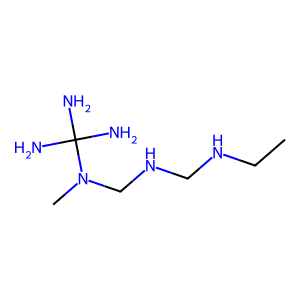

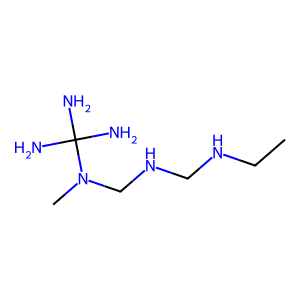

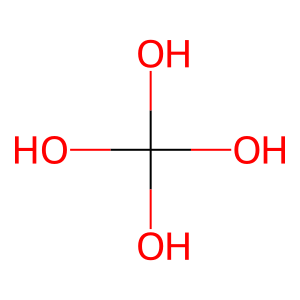

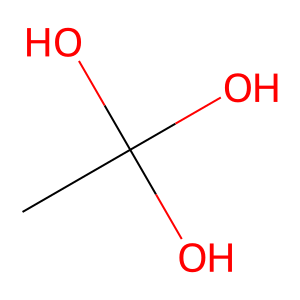

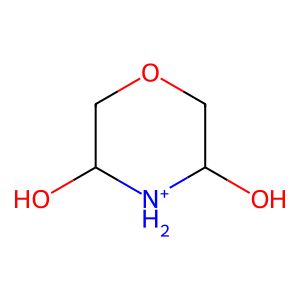

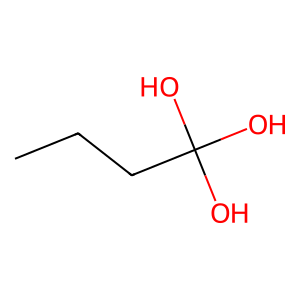

In [ ]:
# Generated_Smiles = ['CCNCNCN(C)C(N)(N)N', 'CCNCNCN(C)C(N)(N)N', 'OC(O)(O)O', 'CC(O)(O)O', 'OC1COCC(O)[NH2+]1', 'CCCC(O)(O)O']

# for smiles in Generated_Smiles:
#   img = get_2d_structure(smiles)
#   if img:
#     # Display the image in Colab
#     display(img)
#     # Or save the image to a file
#     # img.save(f"{smiles}.png")
#   else:
#     print(f"Could not generate 2D structure for SMILES: {smiles}")

In [ ]:
# model=JTNNVAE(vocab, int(450), int(56), int(20), int(3))
# model.load_state_dict(torch.load(path))
# torch.manual_seed(2)
# print("Molecules generated")
# for i in range(20):
#     print(model.sample_prior())

Molecules generated
CC(C)(C)C
CNC
CC(C)C
c1c[nH]nn1
c1ccc2ccccc2c1


[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is g

CC(C)(C)C
CN(C)CN(C)O


[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is g

CCc1cccc2ccccc12


[16:44:11] Explicit valence for atom # 7 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 7 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:44:11] Explicit valence for atom # 7 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 7 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 6, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:11] Explicit valence for atom # 3 C, 5, is g

c1ccc2cc3ccccc3cc2c1


[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 6 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 4 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 4 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 6 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is g

Nc1cc2c(c(N)c1N)[NH2+]CCN2
CNCNC(O)OC
CC(C)C
CNCNCNCN


[16:44:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 3 N, 4, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is g

CN(C)C12CNCC1=CCN2
CC(C)(C)C
CCC
CNCNCNC
CCC(C)(C)C
C=N
CCC(C)(C)C


[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:44:12] Explicit valence for atom # 1 C, 5, is greater than permitted


In [83]:
Generated_Smiles = []
torch.manual_seed(0)
for i in range(50):
    genrated_smi = model.sample_prior()
    if genrated_smi is not None:
      Generated_Smiles.append(genrated_smi)
      print(genrated_smi)

CO


[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is g

c1ccc2cc3ccccc3cc2c1
CNc1ccccc1N
CO
c1ccccc1
C1=NCCN=C1


[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 7 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 7 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 6, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 6, is greater than permitted
[22:26:40] Explicit valence for atom # 7 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 7 C, 5, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 6, is greater than permitted
[22:26:40] Explicit valence for atom # 3 C, 6, is g

c1ccc2c(c1)ccc1c3ccccc3ccc21


[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is g

Cc1cc(C)c2ccccc2c1N
CCCCC
CN
C1=CCCC=C1
CNc1ccccc1N
c1ccc2ccccc2c1


[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:41] Explicit valence for atom # 3 C, 5, is g

c1ccc2ccccc2c1
CNc1cccc(N)c1
CCC
CNCN
OC(O)O
Nc1ccccc1C(N)(N)N


[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is g

Nc1ccccc1
CC(N)N
CNc1ccc2ccccc2c1


[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is g

CNCNC
CNCNCN
CNCN
NCN
OCO
Cc1ccc(NC(=O)C(=O)NCc2ccco2)c(C)c1


[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is g

c1ccc2cc3ccccc3cc2c1
c1ccc2ccccc2c1
CNc1ccc(N)cc1
CN
OCO
Oc1ccccc1
NCN
CNCN
CCc1c(C)cccc1N
CCCC
CCNCNC


[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 4 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 4 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[22:26:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 1 C, 5, is g

NC(N)(N)N
CNCNC
CNCNC
CCCC


[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is g

Nc1ccc(N)c2ccccc12
Oc1ccc(O)cc1


[22:26:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is g

Nc1cc2ccccc2cc1N
NC(N)(N)N
CN(C)CN
c1ccc2ccccc2c1
c1ccccc1


[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:26:43] Explicit valence for atom # 2 C, 5, is g

In [84]:
Generated_Smiles

['CO',
 'c1ccc2cc3ccccc3cc2c1',
 'CNc1ccccc1N',
 'CO',
 'c1ccccc1',
 'C1=NCCN=C1',
 'c1ccc2c(c1)ccc1c3ccccc3ccc21',
 'Cc1cc(C)c2ccccc2c1N',
 'CCCCC',
 'CN',
 'C1=CCCC=C1',
 'CNc1ccccc1N',
 'c1ccc2ccccc2c1',
 'c1ccc2ccccc2c1',
 'CNc1cccc(N)c1',
 'CCC',
 'CNCN',
 'OC(O)O',
 'Nc1ccccc1C(N)(N)N',
 'Nc1ccccc1',
 'CC(N)N',
 'CNc1ccc2ccccc2c1',
 'CNCNC',
 'CNCNCN',
 'CNCN',
 'NCN',
 'OCO',
 'Cc1ccc(NC(=O)C(=O)NCc2ccco2)c(C)c1',
 'c1ccc2cc3ccccc3cc2c1',
 'c1ccc2ccccc2c1',
 'CNc1ccc(N)cc1',
 'CN',
 'OCO',
 'Oc1ccccc1',
 'NCN',
 'CNCN',
 'CCc1c(C)cccc1N',
 'CCCC',
 'CCNCNC',
 'NC(N)(N)N',
 'CNCNC',
 'CNCNC',
 'CCCC',
 'Nc1ccc(N)c2ccccc12',
 'Oc1ccc(O)cc1',
 'Nc1cc2ccccc2cc1N',
 'NC(N)(N)N',
 'CN(C)CN',
 'c1ccc2ccccc2c1',
 'c1ccccc1']

In [ ]:
import pandas as pd

In [ ]:
# Generated_Smiles_VHL = ['OCOCO',
# 'CCCCCCC',
# 'CC(C)(C)C',
# 'O=C=O',
# 'C',
# 'CCC(C)(C)C(C)(N)N=C=N',
# 'CC(C)C',
# 'CC(C)(C)C1(C)C[NH2+]CC2(C[NH2+]CC3(C[NH2+]CCN3)N2)N1'
# 'OC(O)O'
# 'c1ccccc1'
# 'CC(C)(C)C(C)(C)C'
# 'CCCc1ccccc1'
# 'CC(C)(C)C(C)(C)C',
# 'CC(C)C(C)(C)C',
# 'c1ccc2c(c1)ccc1c3ccccc3ccc21',
# 'COc1cc(OC)cc(C(=O)Nc2ccccc2F)c1',
# 'O=C=O',
# 'CCCOCOC(Br)(Br)Br'
# 'CCCCC',
# 'CC',
# 'CCCC(C)C',
# 'CC(C)C(C)(C)c1ccc(OCc2ccc(C(=O)Nc3ccccc3)cc2)cc1',
# 'N=C=N',
# 'CC(=N)C(C)C',
# 'OCOCOC1COC2(CN1)CNC1(COCCN1)CO2',
# 'CC(C)(C)C',
# 'CCCC(C)(C)C',
# 'C=O',
# 'CCC1(C)[NH+]=CNC12[NH+]=CNC21[NH+]=CNC12[NH+]=CNC21C[NH+]=CN1',
# 'CCCC',
# 'CCCC',
# 'CC(C)(C)C(C)(C)C',
# 'CCCCCCc1ccc2cc3c(cc2c1)=CC12NC=[NH+]C1(C=3)OCC1C[N+]3=C(NCC3)N12']

In [85]:
output_path_txt = 'gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Generated_AI_compounds/MDM2/generated_smiles_MDM2_500epochs.txt'

In [86]:
with open(output_path_txt, 'w') as f:
    for smiles in Generated_Smiles:
        f.write(smiles + '\n')

print(f"Saved to: {output_path_txt}")

Saved to: gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Generated_AI_compounds/MDM2/generated_smiles_MDM2_500epochs.txt


In [88]:
output_path_csv = 'gdrive/MyDrive/Colab Notebooks/Amyloid_beta_Glues_design/Graph_JT_VAE_Model/Generated_AI_compounds/MDM2/generated_smiles_MDM2_500epochs.csv'

In [89]:
df_smiles = pd.DataFrame({
    "Molecule_ID": [f"SMILES_{i+1}" for i in range(len(Generated_Smiles))],
    "SMILES": Generated_Smiles
})

# 4. Save as CSV to Google Drive

df_smiles.to_csv(output_path_csv, index=False)


In [ ]:
model=JTNNVAE(vocab, int(450), int(56), int(20), int(3))
# model.load_state_dict(torch.load(path))
Generated_Smiles = []
torch.manual_seed(0)
print("Molecules generated")
for i in range(10):
    genrated_smi = model.sample_prior()
    if genrated_smi is not None:
        Generated_Smiles.append(genrated_smi)

/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permitted
[02:37:41] Explicit valence for atom # 1 C, 5, is greater than permi

Molecules generated


Streaming output truncated to the last 5000 lines.
[02:42:32] Explicit valence for atom # 6 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 6 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 4 C, 7, is greater than permitted
[02:42:32] Explicit valence for atom # 4 C, 7, is greater than permitted
[02:42:32] Explicit valence for atom # 8 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 8 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 9 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 9 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 10 C, 5, is greater than permitted
[02:42:32] Explicit valence for atom # 10 C, 5, is greater than permitted
[02:42:32] Explicit valence for atom # 11 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 11 C, 6, is greater than permitted
[02:42:32] Explicit valence for atom # 12 C, 5, is greater than permi

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-17feec2e6335>", line 7, in <cell line: 0>
    genrated_smi = model.sample_prior()
                   ^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-29-620d30f33392>", line 51, in sample_prior
    return self.decode(z_tree, z_mol, prob_decode)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-29-620d30f33392>", line 108, in decode
    pred_root,pred_nodes = self.decoder.decode(x_tree_vecs, prob_decode)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-26-10be303b8c8f>", line 241, in decode
    if have_slots(fa_slot, slots) and can_assemble(node_x, node_y):
                                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-25-f208947ffd11>", line 47, in can_assemble
    cands,aroma_

TypeError: object of type 'NoneType' has no len()

In [ ]:
def get_2d_structure(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    img = Draw.MolToImage(mol)
    return img
  else:
    return None

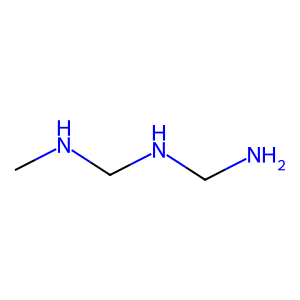

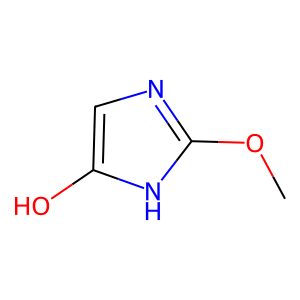

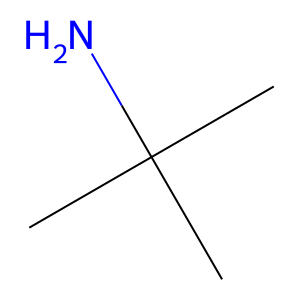

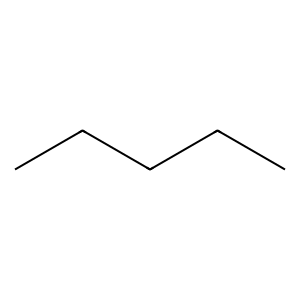

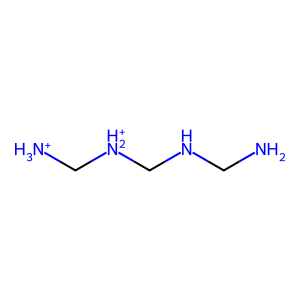

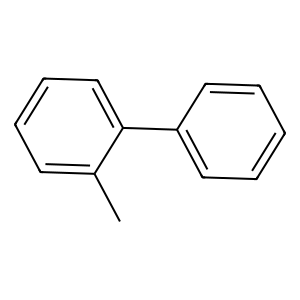

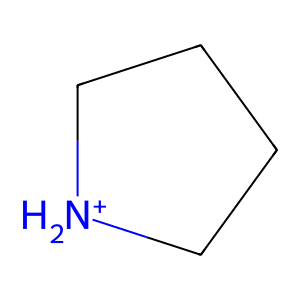

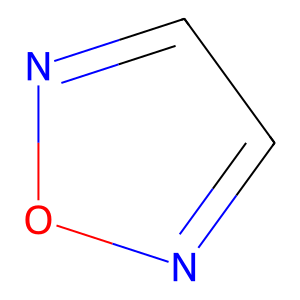

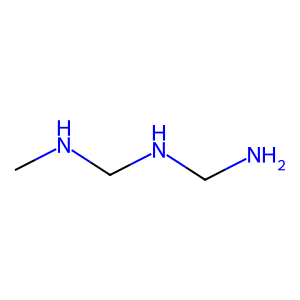

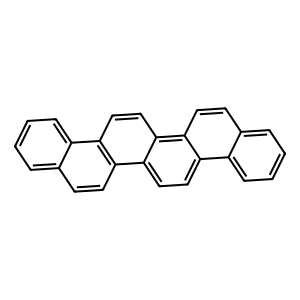

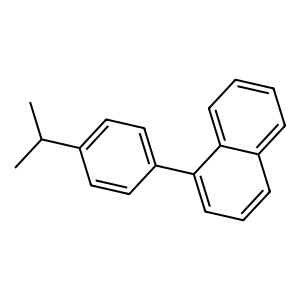

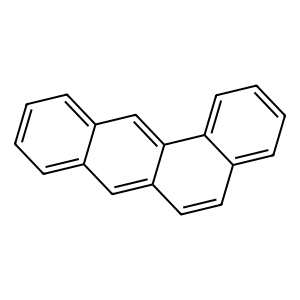

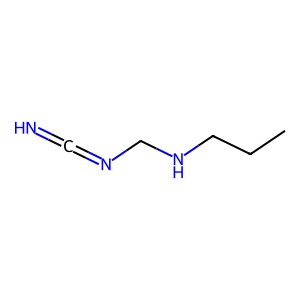

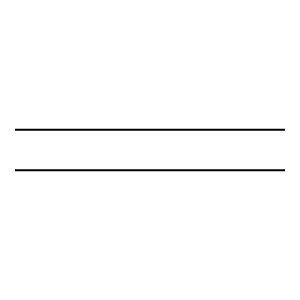

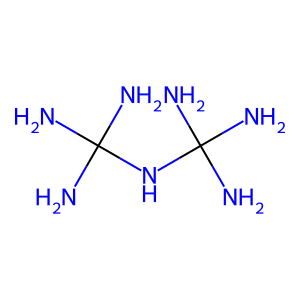

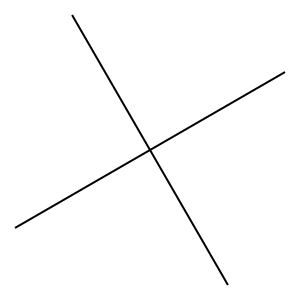

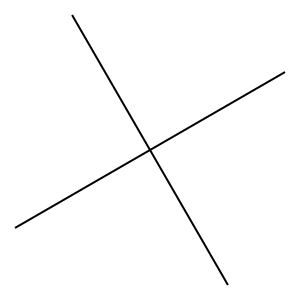

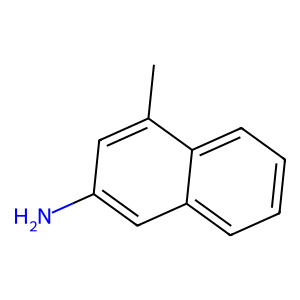

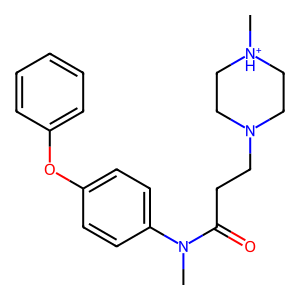

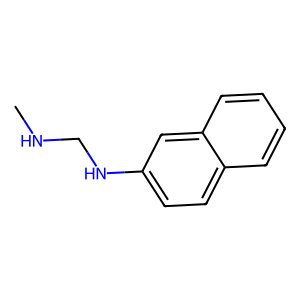

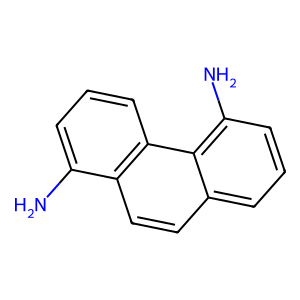

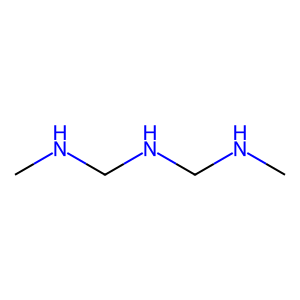

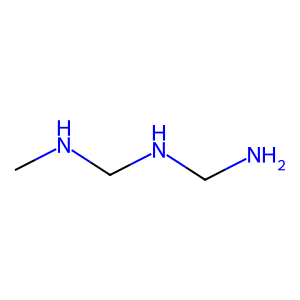

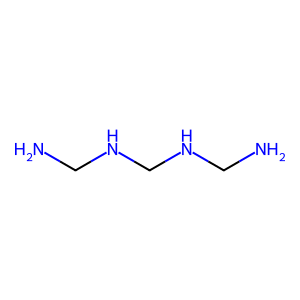

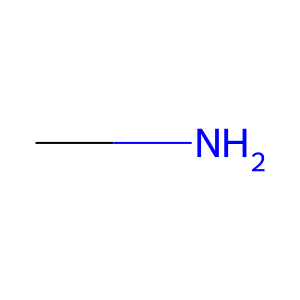

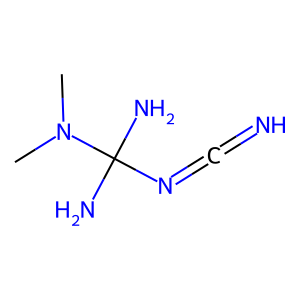

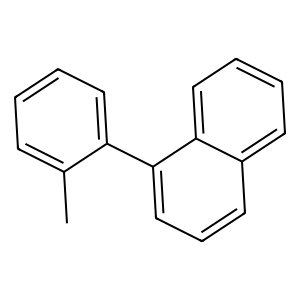

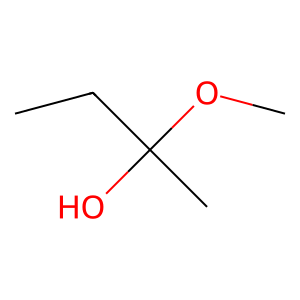

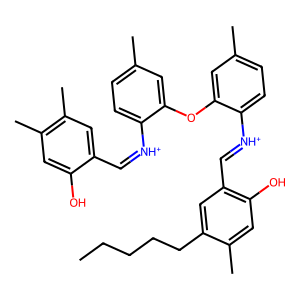

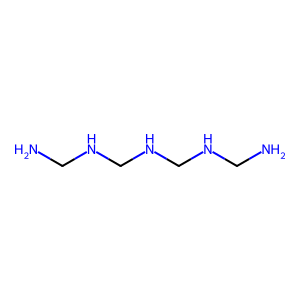

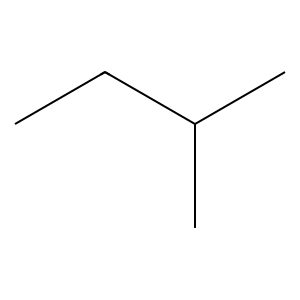

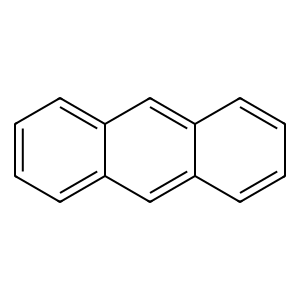

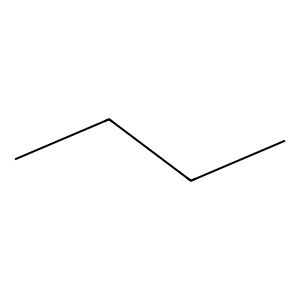

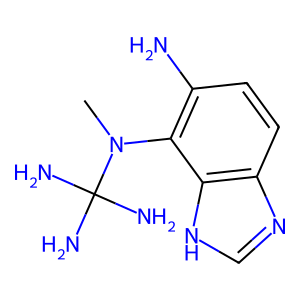

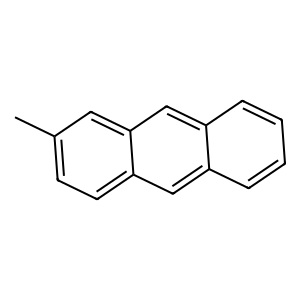

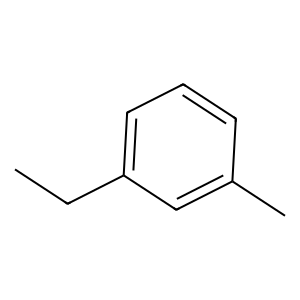

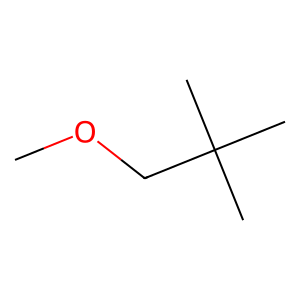

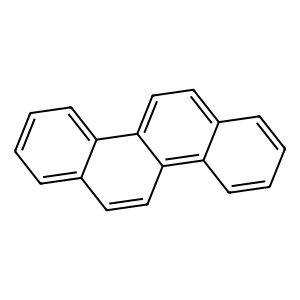

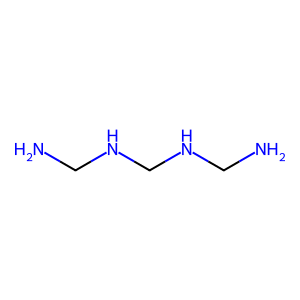

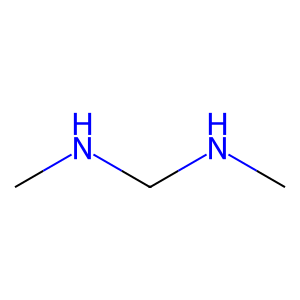

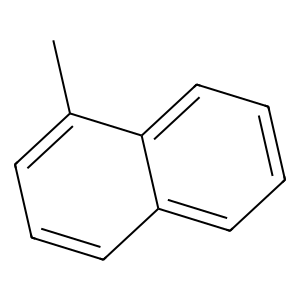

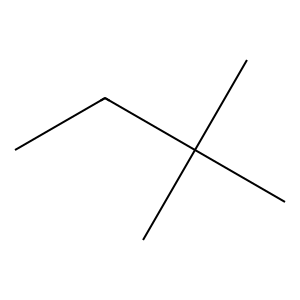

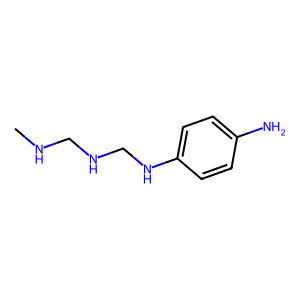

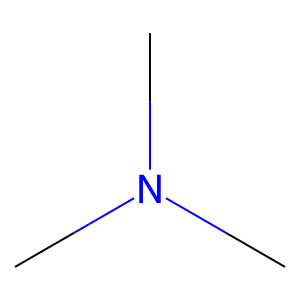

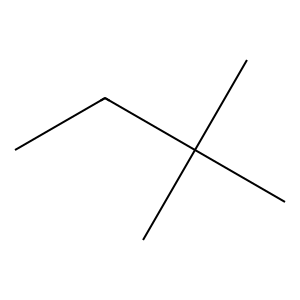

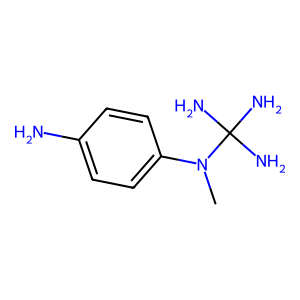

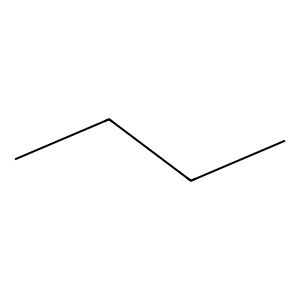

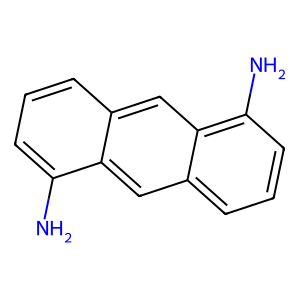

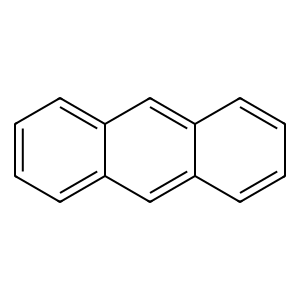

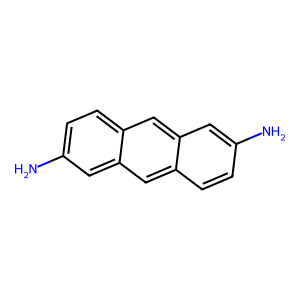

In [ ]:
for smiles in Generated_Smiles:
  img = get_2d_structure(smiles)
  if img:
    # Display the image in Colab
    display(img)
    # Or save the image to a file
    # img.save(f"{smiles}.png")
  else:
    print(f"Could not generate 2D structure for SMILES: {smiles}")


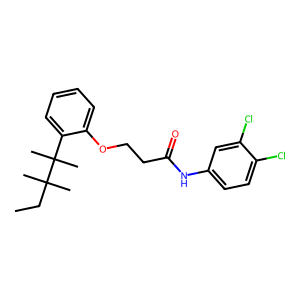

In [ ]:
mol = Chem.MolFromSmiles('CCC(C)(C)C(C)(C)c1ccccc1OCCC(=O)Nc1ccc(Cl)c(Cl)c1')
if mol is not None:
  img = Chem.Draw.MolToImage(mol)
  display(img)

